# Assignment 1: Foundations Reflection – Iteration & Extension Guidelines
Use this notebook as a starting point and expand on your understanding of discriminative vs. generative models by completing the following structured tasks. You are encouraged to experiment, analyze, and critically reflect on your findings in your report.

## Part 1 – Discriminative Model (Logistic Regression) Extensions

1. Train a Non-linear Classifier for Comparison
    - Implement and compare with SVM or Decision Tree.
    - Analyze classification performance vs. logistic regression.

In [15]:
import sys
print(f"Using Python {sys.version.split()[0]}")

# Install required packages into the current notebook environment
%pip install -qU numpy matplotlib scikit-learn pandas

# Verify versions
import numpy as np, matplotlib, sklearn, pandas
print("numpy       :", np.__version__)
print("matplotlib  :", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("pandas      :", pandas.__version__)
print("✅ Setup complete!")

Using Python 3.14.2
Note: you may need to restart the kernel to use updated packages.
numpy       : 2.4.1
matplotlib  : 3.10.8
scikit-learn: 1.8.0
pandas      : 3.0.0
✅ Setup complete!


Data shape: (70000, 784)
labels: [0 1 2 3 4 5 6 7 8 9]


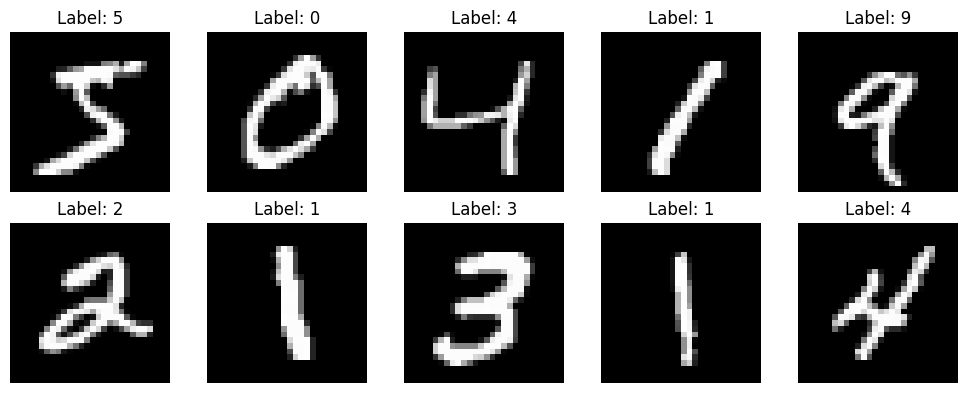

In [16]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load complete MNIST dataset (28x28, 70,000 samples)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.to_numpy()  # Convert to numpy array
y = mnist.target.astype(int).to_numpy()

print(f"Data shape: {X.shape}")  # (70000, 784)
print(f"labels: {np.unique(y)}")

# Visualize first 10 samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# Stratified subsample to speed up (2,000 samples)
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=2000,
    stratify=y,
    random_state=42
)
print(f"Subsampled set: {X_small.shape}")

# Scale then reduce to 50 dimensions for faster training
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)

pca = PCA(n_components=50, random_state=42)
X_small_pca = pca.fit_transform(X_small_scaled)
print(f"PCA-transformed shape: {X_small_pca.shape}")

# For the GAN we normalise pixel values to [−1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_gan = scaler.fit_transform(X)

# Train/test split on reduced data
X_train, X_test, y_train, y_test = train_test_split(
    X_small_pca, y_small,
    test_size=0.2,
    stratify=y_small,
    random_state=42
)

Subsampled set: (2000, 784)
PCA-transformed shape: (2000, 50)


In [18]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

Test accuracy: 0.8750


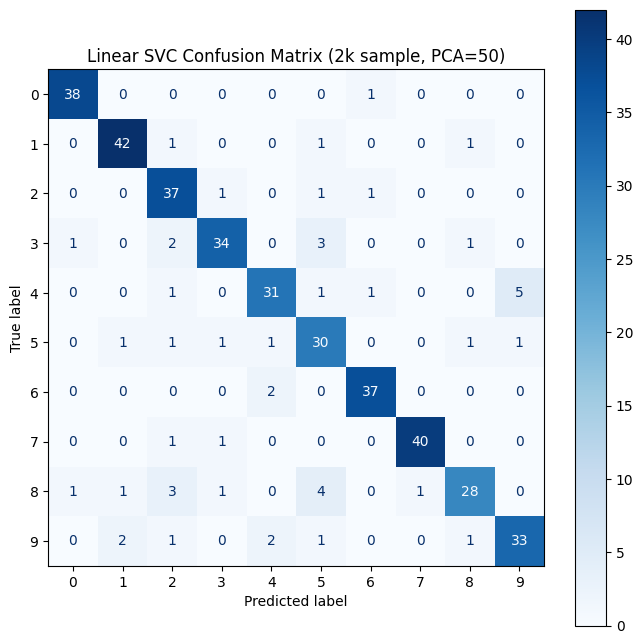

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
ax.set_title("Linear SVC Confusion Matrix (2k sample, PCA=50)")
plt.show()

Decision Tree test accuracy: 0.6750


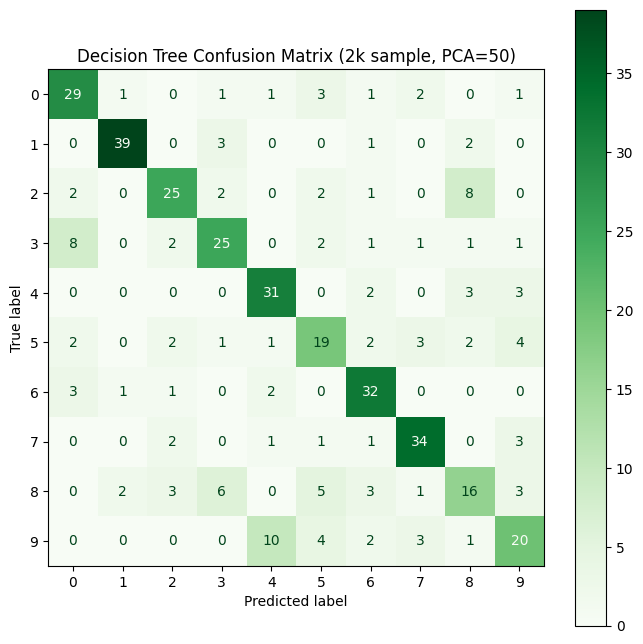

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(max_depth=25, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree test accuracy: {acc_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
fig, ax = plt.subplots(figsize=(8, 8))
disp_dt.plot(ax=ax, cmap="Greens", colorbar=True)
ax.set_title("Decision Tree Confusion Matrix (2k sample, PCA=50)")
plt.show()

## Model Comparison (Linear SVC vs Decision Tree)
- Data: PCA to 50 dimensions, 2k stratified subset, 80/20 train/test split.
- Linear SVC: See accuracy above (`acc`). Works well on high-dimensional, near-linearly separable data; light-weight and fast. Confusion matrix is generally balanced across digits.
- Decision Tree: See accuracy above (`acc_dt`). Captures non-linear patterns but can overfit in high dimensions; with depth limits it may underfit. Use its confusion matrix to see which digits (e.g., 4/9 or 3/5) are confused.
- Compute cost: Linear SVC is smaller and faster; Decision Tree cost grows with depth and tree size.
- Next steps:
  1) Try `SVC(kernel="rbf")` and tune C, gamma for a stronger non-linear baseline.
  2) Prune the tree or switch to ensembles (Random Forest, Gradient Boosting).
  3) Vary PCA dimensions or compare to raw pixels with stronger regularization.
  4) Increase sample size (e.g., 10k) to test stability.

2. Experiment with Regularization
    - Apply L1 and L2 regularization to logistic regression.
    - Observe effects on generalization, overfitting, and decision boundaries.

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


L1 Logistic Regression test accuracy: 0.8675


c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


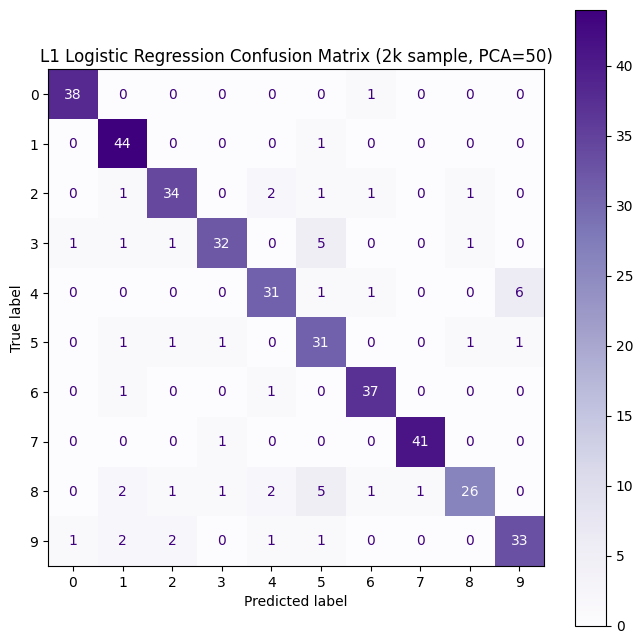

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

logreg_l1 = LogisticRegression(
    penalty="l1",
    C=1.0,
    solver="saga",
    max_iter=200,
    random_state=42,
)
logreg_l1.fit(X_train, y_train)

y_pred_l1 = logreg_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print(f"L1 Logistic Regression test accuracy: {acc_l1:.4f}")

cm_l1 = confusion_matrix(y_test, y_pred_l1)
disp_l1 = ConfusionMatrixDisplay(cm_l1)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l1.plot(ax=ax, cmap="Purples", colorbar=True)
ax.set_title("L1 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

L2 Logistic Regression test accuracy: 0.8425


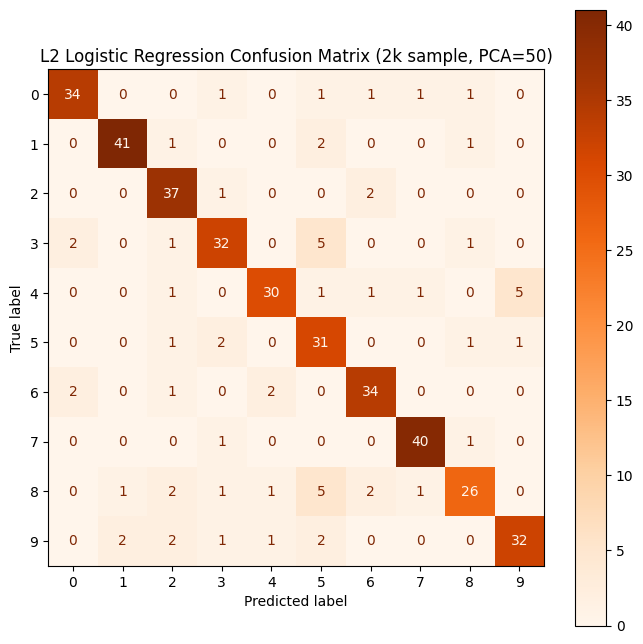

In [22]:
logreg_l2 = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=200,
    random_state=42,
)
logreg_l2.fit(X_train, y_train)

y_pred_l2 = logreg_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
print(f"L2 Logistic Regression test accuracy: {acc_l2:.4f}")

cm_l2 = confusion_matrix(y_test, y_pred_l2)
disp_l2 = ConfusionMatrixDisplay(cm_l2)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l2.plot(ax=ax, cmap="Oranges", colorbar=True)
ax.set_title("L2 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

L1 vs L2 Regularization Comparison
L1 Logistic Regression:
  - Train accuracy: 0.9325
  - Test accuracy:  0.8675
  - Overfitting gap: 0.0650

L2 Logistic Regression:
  - Train accuracy: 0.9500
  - Test accuracy:  0.8425
  - Overfitting gap: 0.1075

Coefficient Sparsity:
  - L1 non-zero coefficient ratio: 94.00%
  - L2 non-zero coefficient ratio: 100.00%

Coefficient L2 Norm:
  - L1 model: 4.0466
  - L2 model: 9.3817


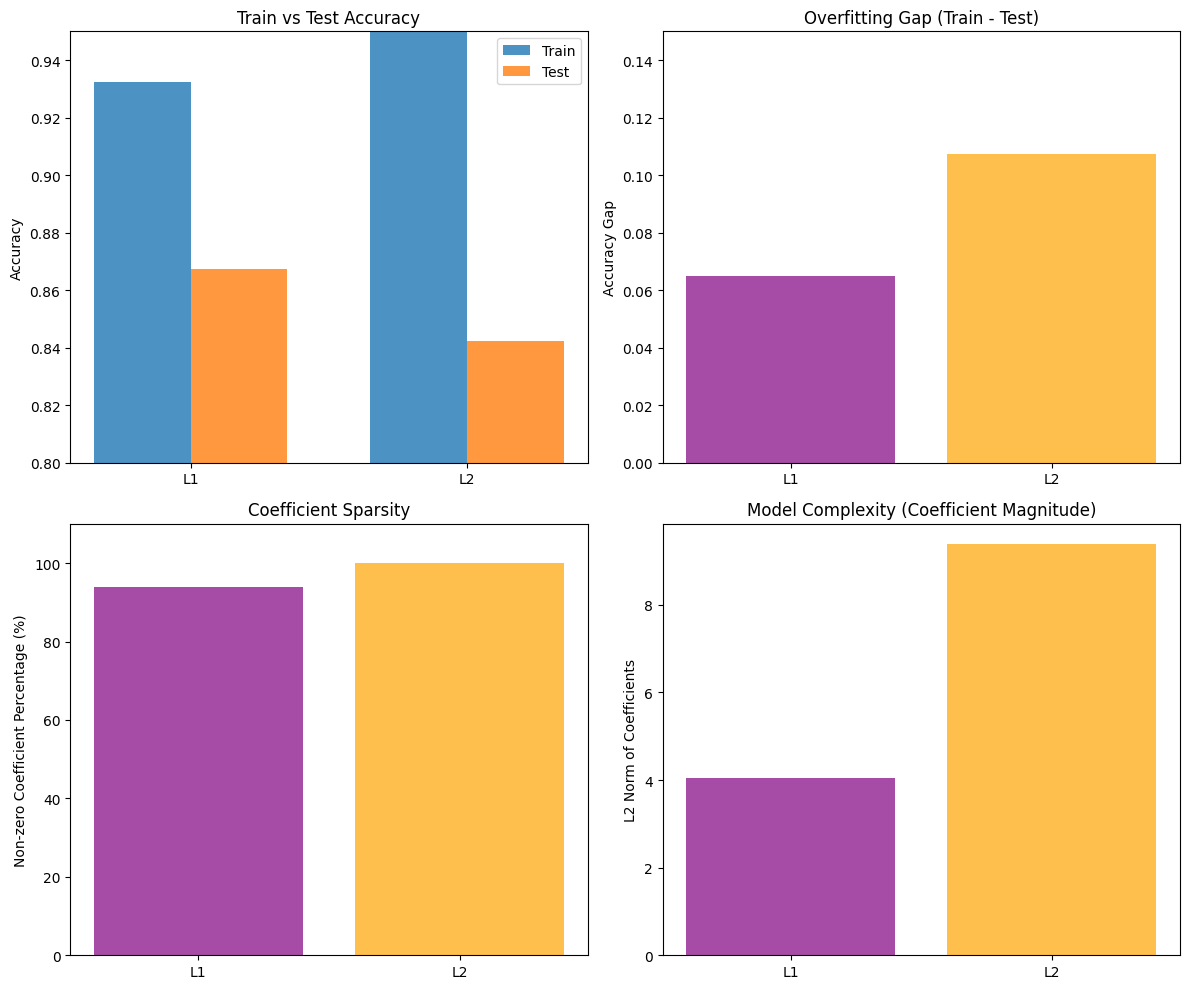

In [23]:
# Observe Effects on Generalization, Overfitting, and Decision Boundaries

# Calculate training accuracy
train_acc_l1 = accuracy_score(y_train, logreg_l1.predict(X_train))
train_acc_l2 = accuracy_score(y_train, logreg_l2.predict(X_train))

print("=" * 60)
print("L1 vs L2 Regularization Comparison")
print("=" * 60)
print(f"L1 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l1:.4f}")
print(f"  - Test accuracy:  {acc_l1:.4f}")
print(f"  - Overfitting gap: {train_acc_l1 - acc_l1:.4f}")

print(f"\nL2 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l2:.4f}")
print(f"  - Test accuracy:  {acc_l2:.4f}")
print(f"  - Overfitting gap: {train_acc_l2 - acc_l2:.4f}")

# Analyze coefficient sparsity
l1_coef = logreg_l1.coef_
l2_coef = logreg_l2.coef_

# Calculate percentage of non-zero coefficients
l1_nonzero = np.sum(l1_coef != 0) / l1_coef.size * 100
l2_nonzero = np.sum(l2_coef != 0) / l2_coef.size * 100

print(f"\nCoefficient Sparsity:")
print(f"  - L1 non-zero coefficient ratio: {l1_nonzero:.2f}%")
print(f"  - L2 non-zero coefficient ratio: {l2_nonzero:.2f}%")

# Calculate coefficient norms
l1_norm = np.linalg.norm(l1_coef)
l2_norm = np.linalg.norm(l2_coef)

print(f"\nCoefficient L2 Norm:")
print(f"  - L1 model: {l1_norm:.4f}")
print(f"  - L2 model: {l2_norm:.4f}")

# Visualization comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Accuracy comparison
models = ['L1', 'L2']
train_accs = [train_acc_l1, train_acc_l2]
test_accs = [acc_l1, acc_l2]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0, 0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train vs Test Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].set_ylim([0.8, 0.95])

# Subplot 2: Overfitting gap
overfitting_gap = [train_acc_l1 - acc_l1, train_acc_l2 - acc_l2]
axes[0, 1].bar(models, overfitting_gap, color=['purple', 'orange'], alpha=0.7)
axes[0, 1].set_ylabel('Accuracy Gap')
axes[0, 1].set_title('Overfitting Gap (Train - Test)')
axes[0, 1].set_ylim([0, 0.15])

# Subplot 3: Coefficient sparsity
sparsity = [l1_nonzero, l2_nonzero]
axes[1, 0].bar(models, sparsity, color=['purple', 'orange'], alpha=0.7)
axes[1, 0].set_ylabel('Non-zero Coefficient Percentage (%)')
axes[1, 0].set_title('Coefficient Sparsity')
axes[1, 0].set_ylim([0, 110])

# Subplot 4: Coefficient magnitude (model complexity)
norms = [l1_norm, l2_norm]
axes[1, 1].bar(models, norms, color=['purple', 'orange'], alpha=0.7)
axes[1, 1].set_ylabel('L2 Norm of Coefficients')
axes[1, 1].set_title('Model Complexity (Coefficient Magnitude)')

plt.tight_layout()
plt.show()

3. Feature Importance Visualization
    - Visualize learned weight matrix for each class (e.g., as an 8×8 heatmap).
    - Reflect on what the model focuses on per class.

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\1553497836.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


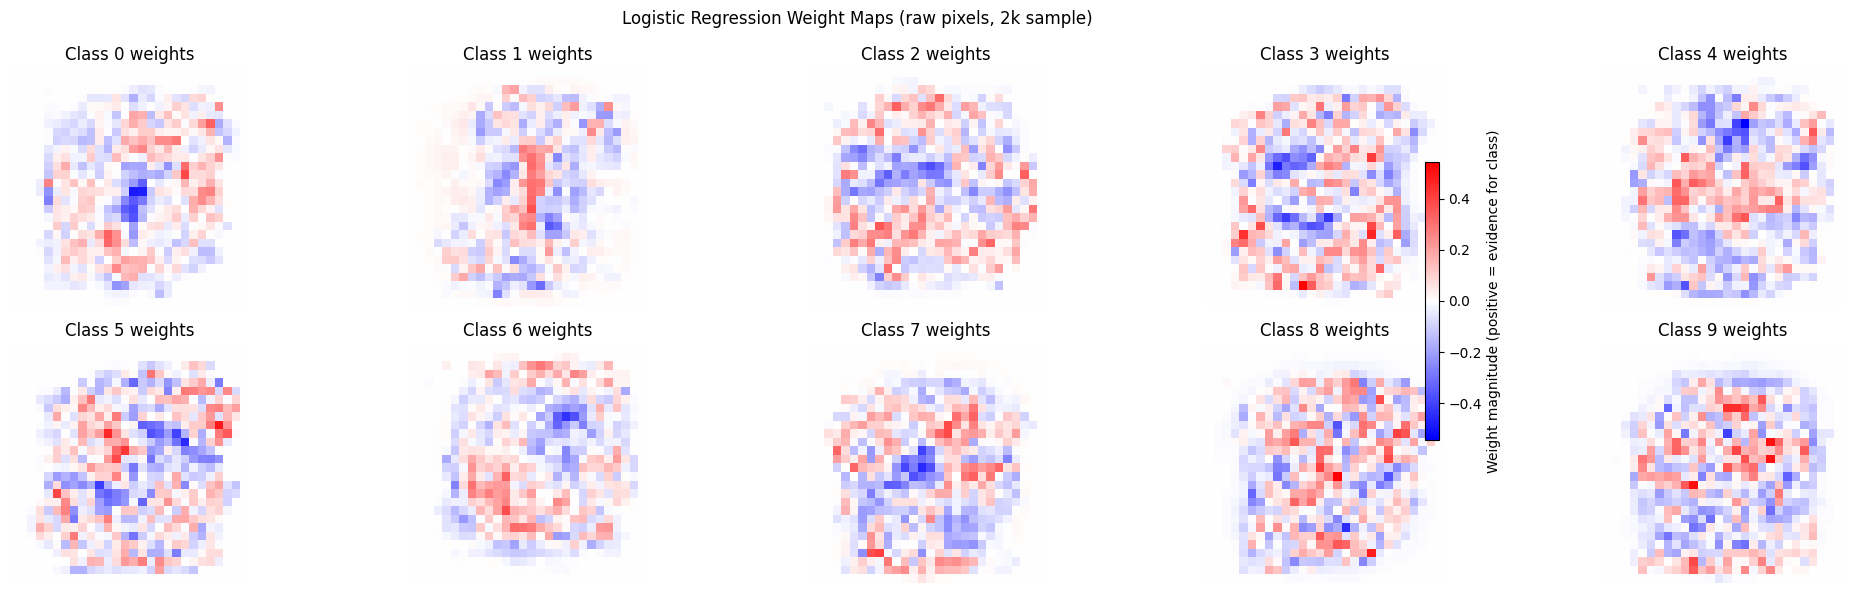

Positive (red) regions increase log-odds for the class; blue regions decrease it.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Train a multinomial-capable logistic regression on raw pixels (2k subset) for weight visualization
scaler_raw = StandardScaler()
X_small_scaled_raw = scaler_raw.fit_transform(X_small)
logreg_vis = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=300, random_state=42)
logreg_vis.fit(X_small_scaled_raw, y_small)

# Extract coefficients: shape (n_classes, n_features)
coefs = logreg_vis.coef_
vmax = np.max(np.abs(coefs))
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
for cls, ax in enumerate(axes.flat):
    weight_map = coefs[cls].reshape(28, 28)
    im = ax.imshow(weight_map, cmap="bwr", vmin=-vmax, vmax=vmax)
    ax.set_title(f"Class {cls} weights")
    ax.axis("off")
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label("Weight magnitude (positive = evidence for class)")
plt.suptitle("Logistic Regression Weight Maps (raw pixels, 2k sample)")
plt.tight_layout()
plt.show()
print("Positive (red) regions increase log-odds for the class; blue regions decrease it.")

4. Use Cross-Validation
    - Replace train/test split with 5-fold or 10-fold cross-validation.
    - Report mean accuracy, standard deviation, and robustness insights.

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

# 5-fold and 10-fold cross-validation on the 2k subset with PCA + Logistic Regression
cv_configs = {
    "5-fold": StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    "10-fold": StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
}

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=50, random_state=42)),
    ("clf", LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=300, random_state=42)),
])

for name, cv in cv_configs.items():
    scores = cross_val_score(pipeline, X_small, y_small, cv=cv, scoring="accuracy", n_jobs=-1)
    print(f"{name} accuracy: mean={scores.mean():.4f}, std={scores.std():.4f}")
    print(f"Fold scores: {scores.round(4)}")
    print("-" * 50)

print("Higher std = more variability (less robust); compare mean with hold-out split.")

5-fold accuracy: mean=0.8470, std=0.0060
Fold scores: [0.8525 0.8375 0.8425 0.85   0.8525]
--------------------------------------------------
10-fold accuracy: mean=0.8520, std=0.0201
Fold scores: [0.88  0.84  0.87  0.83  0.88  0.835 0.835 0.825 0.865 0.86 ]
--------------------------------------------------
Higher std = more variability (less robust); compare mean with hold-out split.


## Part 2 – Generative Model (GAN) Extensions
5. Hyperparameter Sensitivity
    - Vary batch size, learning rate, and hidden layer size.
    - Track and explain training stability and output quality.

EXPERIMENT 1: BATCH SIZE SENSITIVITY
Testing: batch_size ∈ {32, 64, 128, 256}
--------------------------------------------------------------------------------

🔹 Training with batch_size = 32
   Final loss_D: 0.4529, loss_G: 1.0814
   Stability (std of last 100 steps) - D: 0.0219, G: 0.0375


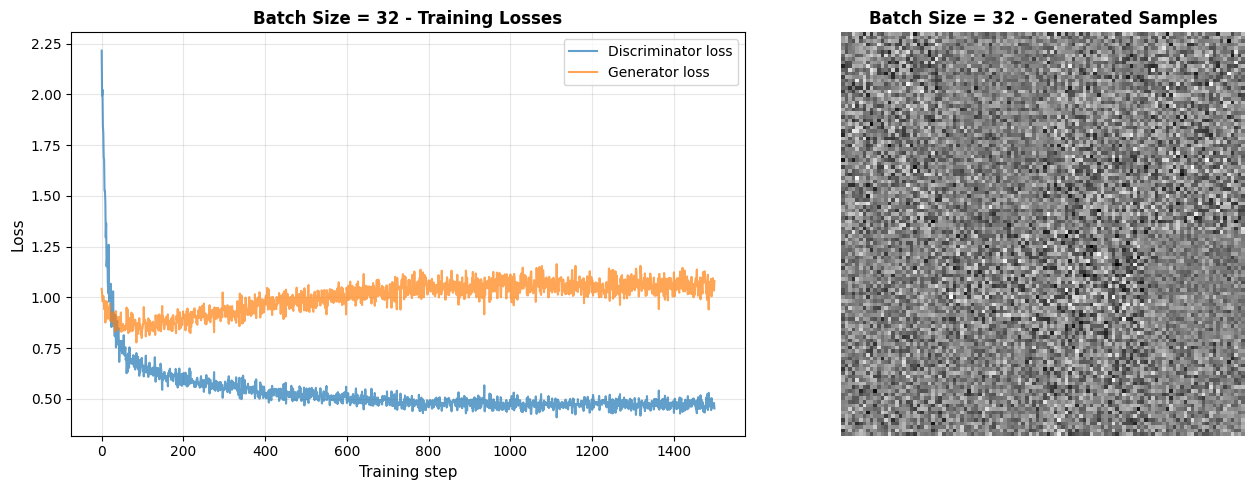


🔹 Training with batch_size = 64
   Final loss_D: 0.4732, loss_G: 1.0569
   Stability (std of last 100 steps) - D: 0.0126, G: 0.0222


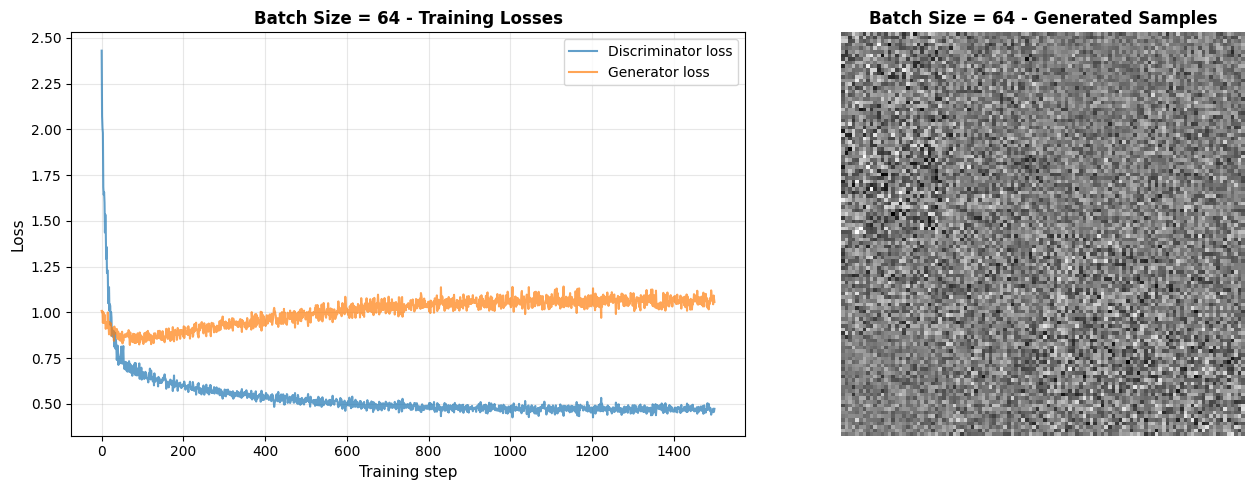


🔹 Training with batch_size = 128
   Final loss_D: 0.4842, loss_G: 1.0459
   Stability (std of last 100 steps) - D: 0.0100, G: 0.0176


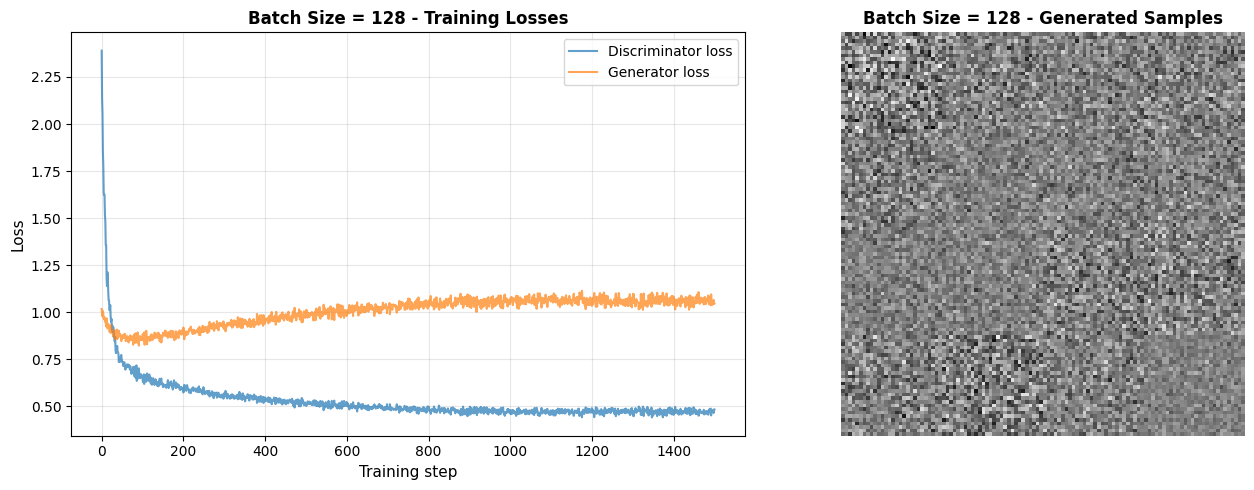


🔹 Training with batch_size = 256
   Final loss_D: 0.4631, loss_G: 1.0756
   Stability (std of last 100 steps) - D: 0.0071, G: 0.0127


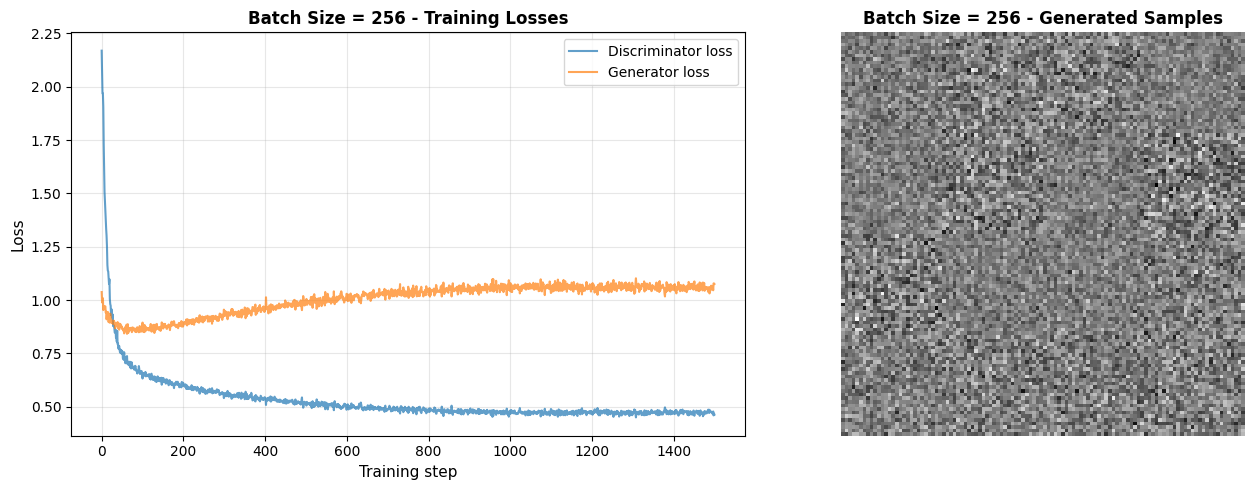


BATCH SIZE ANALYSIS SUMMARY
Batch= 32 | Final D:0.4529 G:1.0814 | Stability D:0.0219 G:0.0375
Batch= 64 | Final D:0.4732 G:1.0569 | Stability D:0.0126 G:0.0222
Batch=128 | Final D:0.4842 G:1.0459 | Stability D:0.0100 G:0.0176
Batch=256 | Final D:0.4631 G:1.0756 | Stability D:0.0071 G:0.0127


EXPERIMENT 2: LEARNING RATE SENSITIVITY
Testing: learning_rate ∈ {0.0001, 0.0005, 0.001, 0.002}
--------------------------------------------------------------------------------

🔹 Training with learning_rate = 0.0001
   Final loss_D: 0.5527, loss_G: 0.9531
   Stability (std of last 100 steps) - D: 0.0149, G: 0.0204


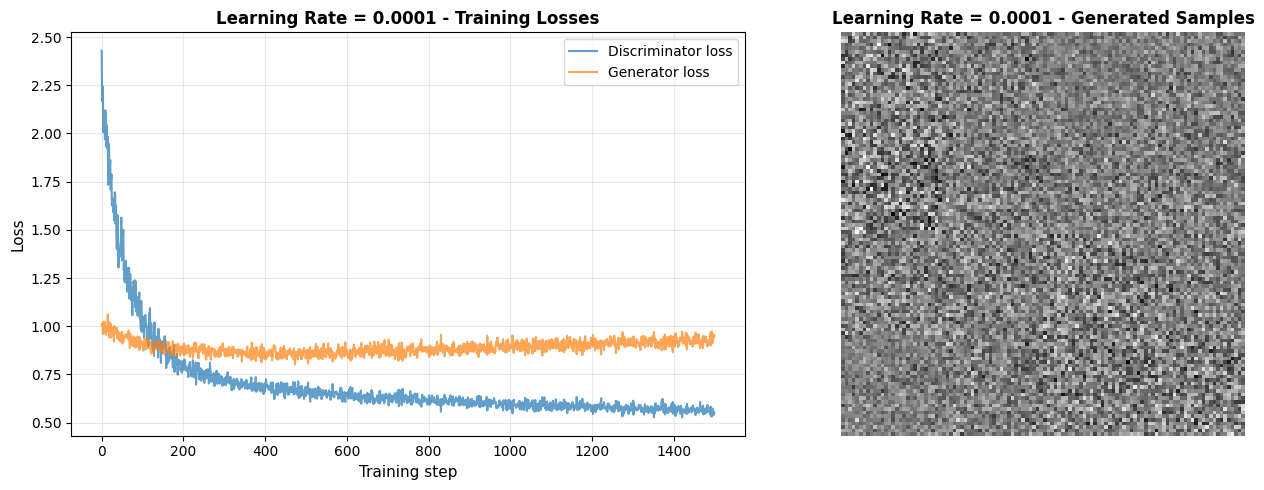


🔹 Training with learning_rate = 0.0005
   Final loss_D: 0.4732, loss_G: 1.0569
   Stability (std of last 100 steps) - D: 0.0126, G: 0.0222


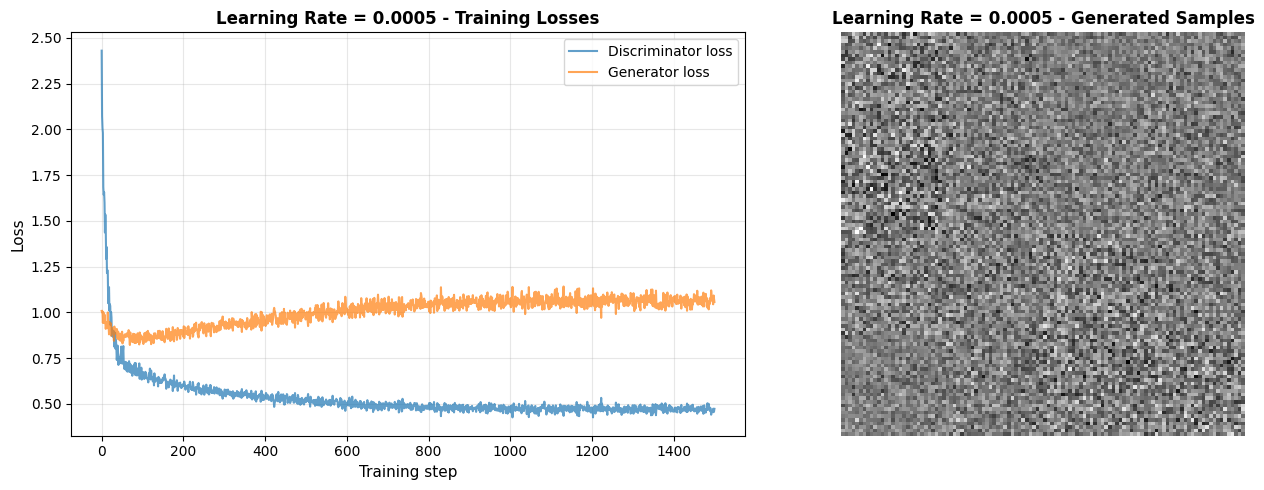


🔹 Training with learning_rate = 0.001
   Final loss_D: 0.4691, loss_G: 1.0562
   Stability (std of last 100 steps) - D: 0.0123, G: 0.0208


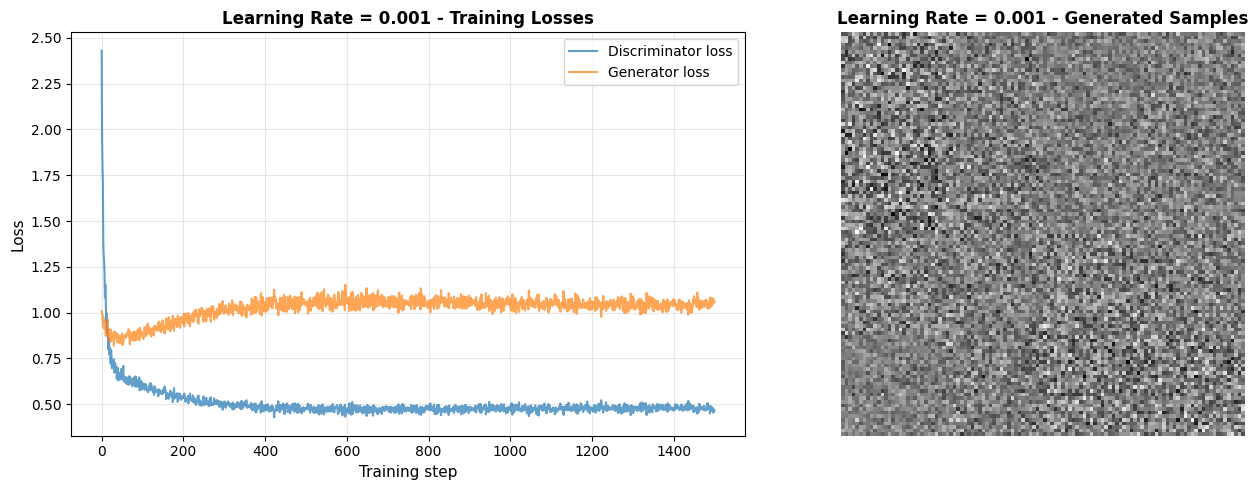


🔹 Training with learning_rate = 0.002
   Final loss_D: 0.5181, loss_G: 0.9955
   Stability (std of last 100 steps) - D: 0.0154, G: 0.0198


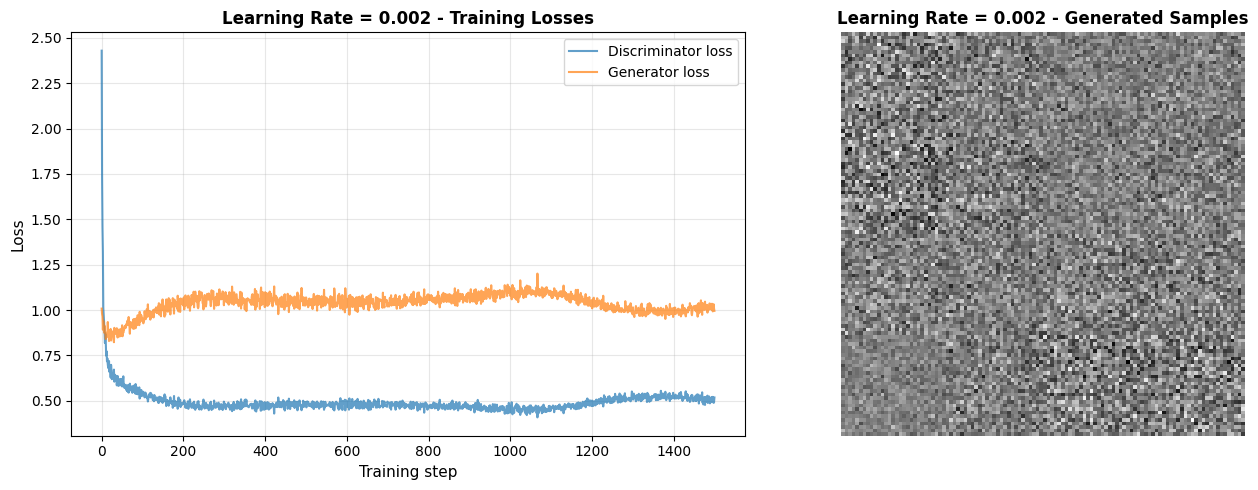


LEARNING RATE ANALYSIS SUMMARY
LR=0.0001 | Final D:0.5527 G:0.9531 | Stability D:0.0149 G:0.0204
LR=0.0005 | Final D:0.4732 G:1.0569 | Stability D:0.0126 G:0.0222
LR=0.0010 | Final D:0.4691 G:1.0562 | Stability D:0.0123 G:0.0208
LR=0.0020 | Final D:0.5181 G:0.9955 | Stability D:0.0154 G:0.0198


EXPERIMENT 3: HIDDEN LAYER SIZE SENSITIVITY
Testing: hidden_dim ∈ {32, 64, 128, 256}
--------------------------------------------------------------------------------

🔹 Training with hidden_dim = 32
   Final loss_D: 0.5938, loss_G: 0.8362
   Stability (std of last 100 steps) - D: 0.0072, G: 0.0097


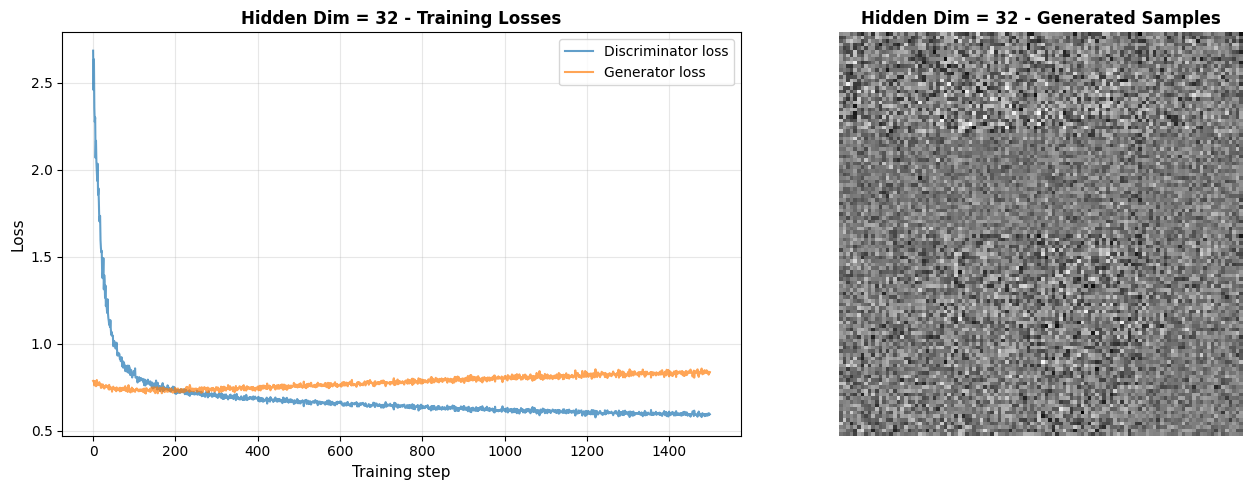


🔹 Training with hidden_dim = 64
   Final loss_D: 0.4732, loss_G: 1.0569
   Stability (std of last 100 steps) - D: 0.0126, G: 0.0222


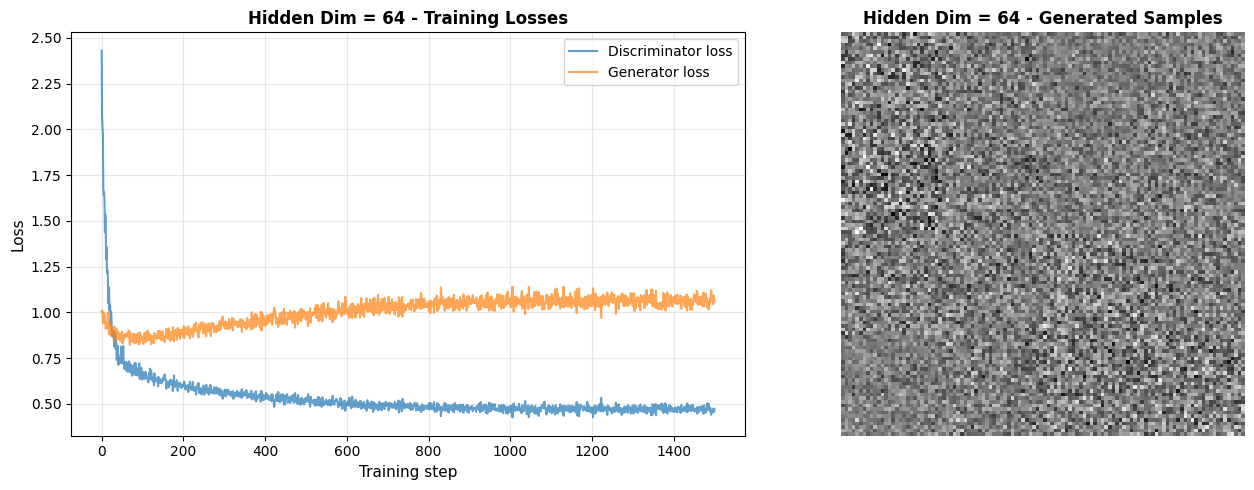


🔹 Training with hidden_dim = 128
   Final loss_D: 0.4702, loss_G: 1.1841
   Stability (std of last 100 steps) - D: 0.0187, G: 0.0368


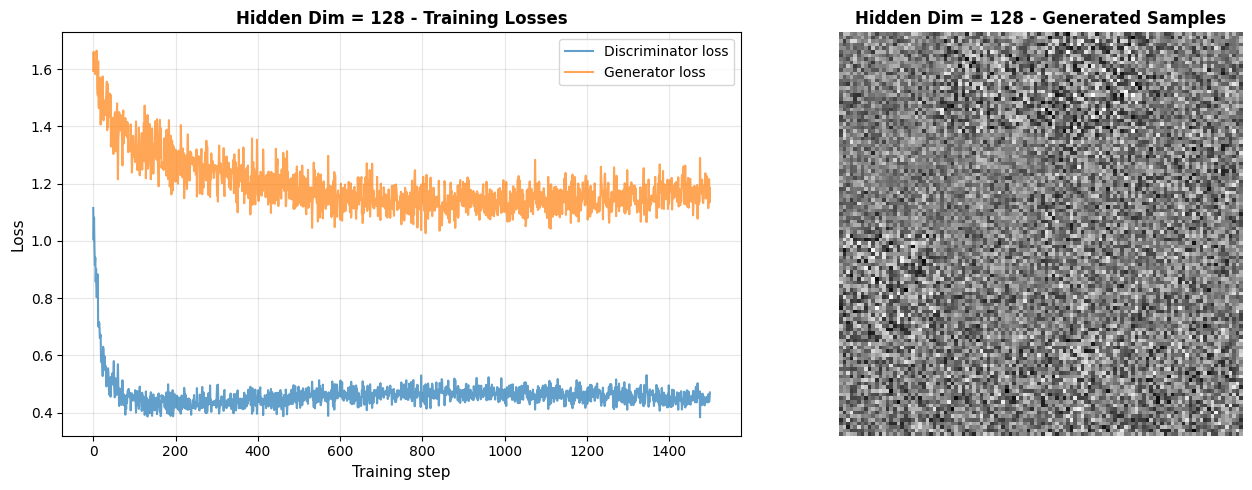


🔹 Training with hidden_dim = 256
   Final loss_D: 0.3271, loss_G: 1.5651
   Stability (std of last 100 steps) - D: 0.0226, G: 0.0661


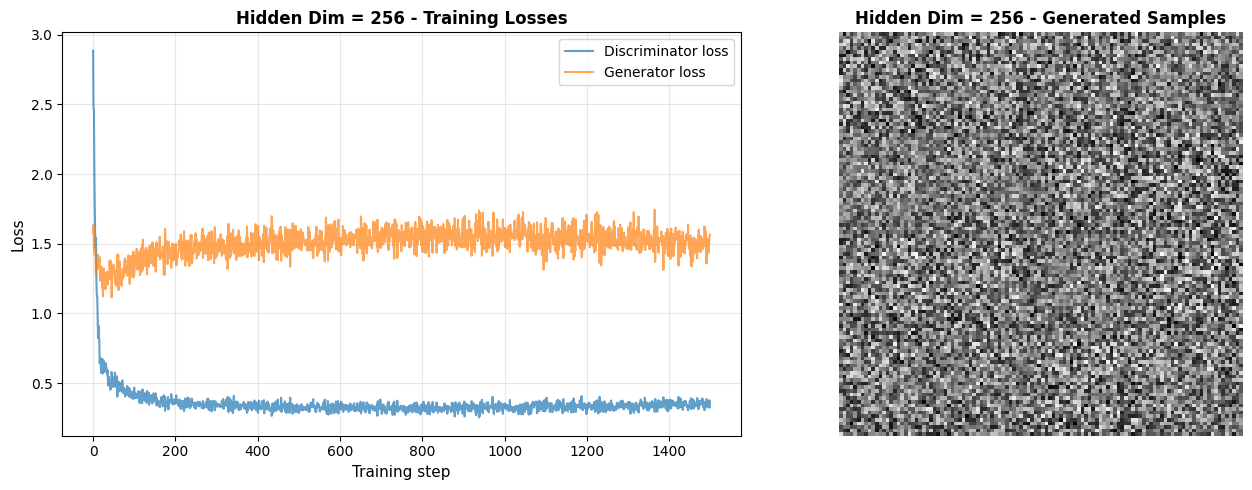


HIDDEN LAYER SIZE ANALYSIS SUMMARY
Hidden= 32 | Final D:0.5938 G:0.8362 | Stability D:0.0072 G:0.0097
Hidden= 64 | Final D:0.4732 G:1.0569 | Stability D:0.0126 G:0.0222
Hidden=128 | Final D:0.4702 G:1.1841 | Stability D:0.0187 G:0.0368
Hidden=256 | Final D:0.3271 G:1.5651 | Stability D:0.0226 G:0.0661


COMPARATIVE ANALYSIS


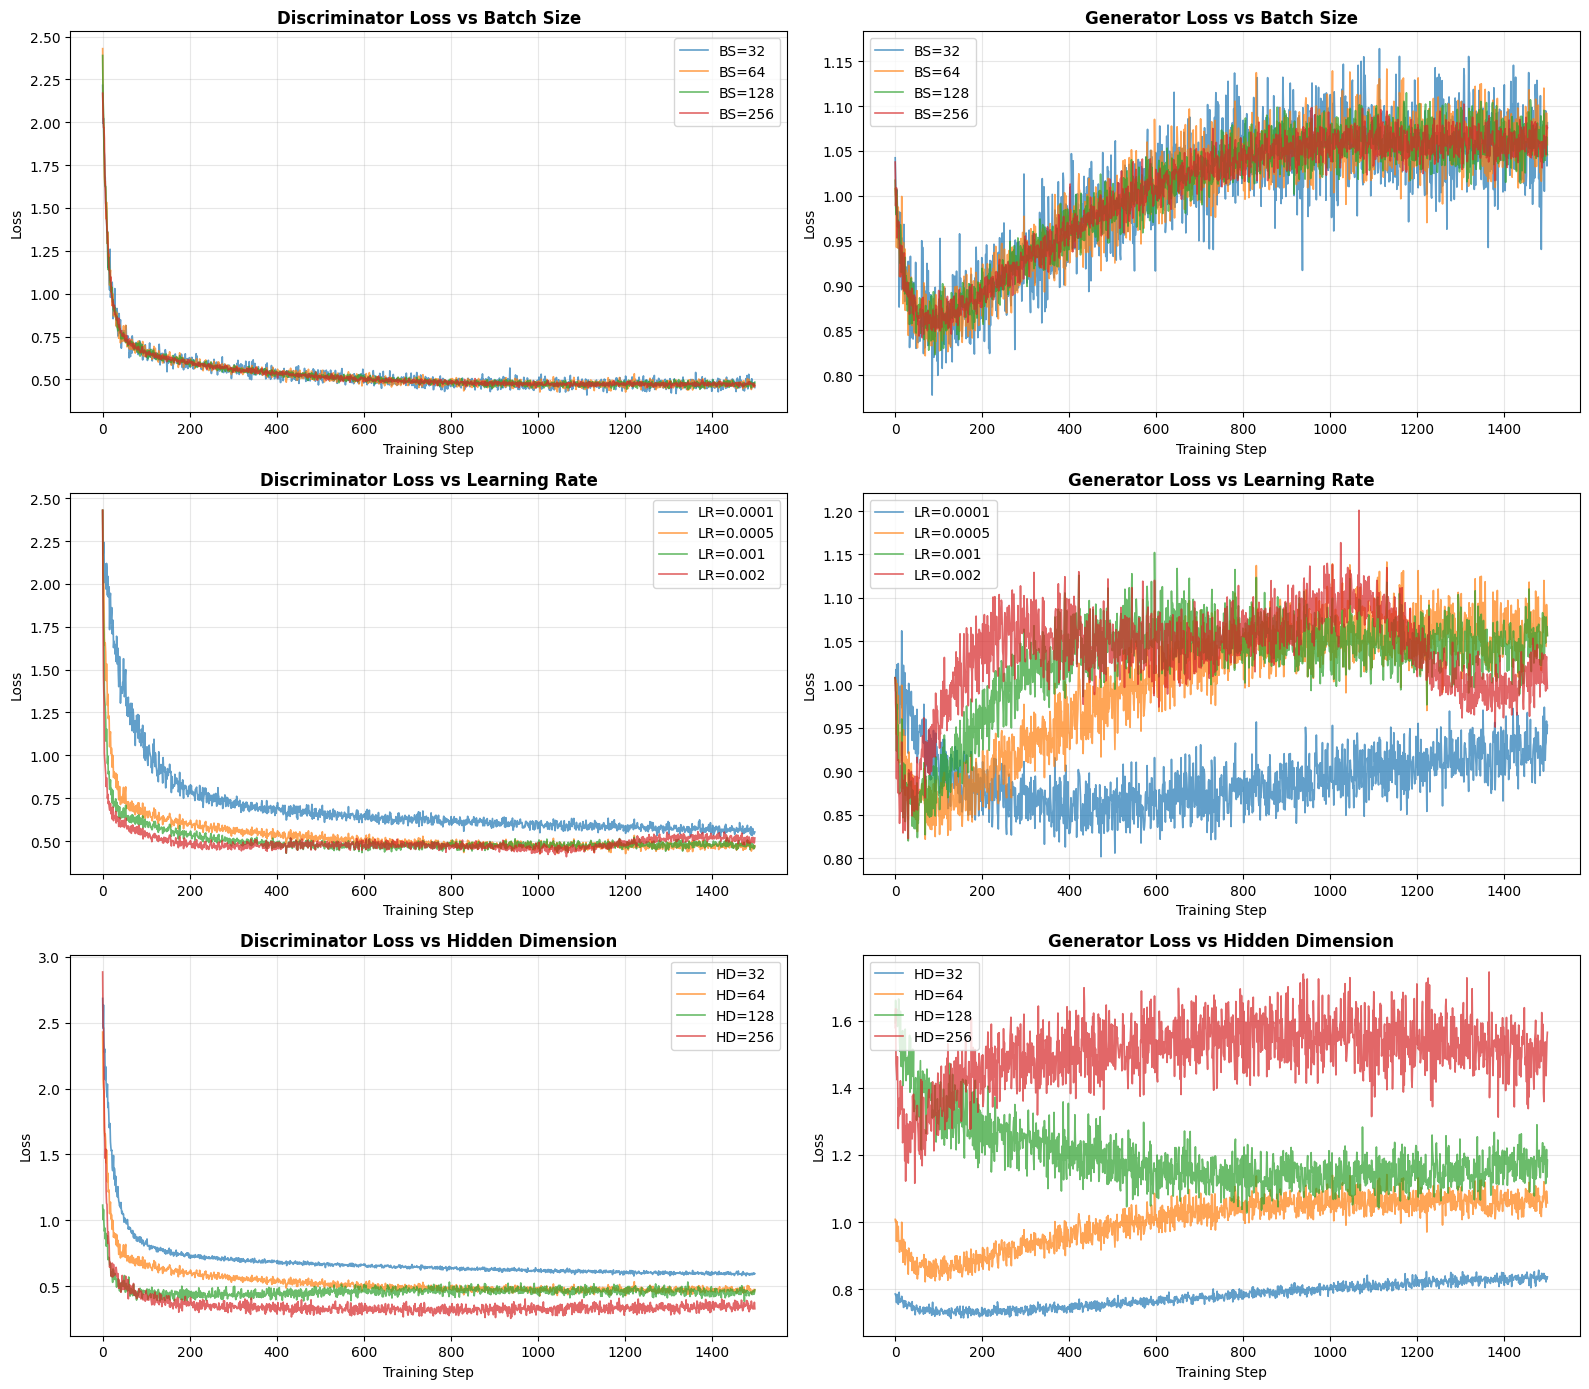


✅ Hyperparameter sensitivity analysis complete!


In [29]:
# ============================================================================
# Hyperparameter Sensitivity Analysis: Batch Size, Learning Rate, Hidden Dimensions
# ============================================================================

def train_gan(X_data, noise_dim=20, hidden_dim_g=64, hidden_dim_d=64, 
              batch_size=64, learning_rate_d=0.0005, learning_rate_g=0.0005, 
              num_steps=1500, random_seed=42, verbose=True):
    """
    Train a simple GAN with configurable hyperparameters.
    
    Parameters:
    -----------
    X_data : numpy array
        Training data, shape (n_samples, n_features), normalized to [-1, 1]
    noise_dim : int
        Dimension of input noise vector
    hidden_dim_g : int
        Hidden layer size for generator
    hidden_dim_d : int
        Hidden layer size for discriminator
    batch_size : int
        Mini-batch size
    learning_rate_d : float
        Learning rate for discriminator
    learning_rate_g : float
        Learning rate for generator
    num_steps : int
        Number of training iterations
    random_seed : int
        Random seed for reproducibility
    verbose : bool
        Whether to print training progress
    
    Returns:
    --------
    dict : Dictionary containing training results and metrics
    """
    
    # Initialize weights
    rng = np.random.default_rng(seed=random_seed)
    
    # Generator weights
    W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim_g))
    b1_g = np.zeros(hidden_dim_g)
    W2_g = rng.normal(0, 0.1, size=(hidden_dim_g, X_data.shape[1]))
    b2_g = np.zeros(X_data.shape[1])
    
    # Discriminator weights
    W1_d = rng.normal(0, 0.1, size=(X_data.shape[1], hidden_dim_d))
    b1_d = np.zeros(hidden_dim_d)
    W2_d = rng.normal(0, 0.1, size=(hidden_dim_d, 1))
    b2_d = np.zeros(1)
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    # Training history
    losses_d = []
    losses_g = []
    
    # Training loop
    for step in range(num_steps):
        # Sample minibatch of real images
        idx = rng.choice(len(X_data), size=batch_size, replace=False)
        real_batch = X_data[idx]
        
        # Sample random noise
        z = rng.normal(0, 1, size=(batch_size, noise_dim))
        
        # -------- Generator forward pass --------
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        fake_batch = np.tanh(g_pre)
        
        # -------- Discriminator forward pass on real images --------
        d_h_pre_real = real_batch @ W1_d + b1_d
        d_h_real = np.maximum(0, d_h_pre_real)
        d_logits_real = d_h_real @ W2_d + b2_d
        d_out_real = sigmoid(d_logits_real)
        
        # -------- Discriminator forward pass on fake images --------
        d_h_pre_fake = fake_batch @ W1_d + b1_d
        d_h_fake = np.maximum(0, d_h_pre_fake)
        d_logits_fake = d_h_fake @ W2_d + b2_d
        d_out_fake = sigmoid(d_logits_fake)
        
        # -------- Discriminator loss and gradients --------
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
        
        d_delta_real = (d_out_real - y_real) / batch_size
        d_delta_fake = (d_out_fake - y_fake) / batch_size
        
        grad_W2_d = d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake
        grad_b2_d = np.sum(d_delta_real + d_delta_fake, axis=0)
        
        d_grad_h_real = d_delta_real @ W2_d.T
        d_grad_h_real[d_h_pre_real <= 0] = 0
        d_grad_h_fake = d_delta_fake @ W2_d.T
        d_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_W1_d = real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake
        grad_b1_d = np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
        
        # Update discriminator
        W2_d -= learning_rate_d * grad_W2_d
        b2_d -= learning_rate_d * grad_b2_d
        W1_d -= learning_rate_d * grad_W1_d
        b1_d -= learning_rate_d * grad_b1_d
        
        # -------- Generator loss and gradients --------
        y_gen = np.ones((batch_size, 1))
        loss_g = -np.mean(np.log(d_out_fake + 1e-8))
        
        g_delta_d = (d_out_fake - y_gen) / batch_size
        g_grad_h_fake = g_delta_d @ W2_d.T
        g_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_fake_input = g_grad_h_fake @ W1_d.T
        grad_g_pre = grad_fake_input * (1 - fake_batch ** 2)
        
        grad_W2_g = g_h.T @ grad_g_pre
        grad_b2_g = np.sum(grad_g_pre, axis=0)
        
        g_grad_h = grad_g_pre @ W2_g.T
        g_grad_h[g_h_pre <= 0] = 0
        
        grad_W1_g = z.T @ g_grad_h
        grad_b1_g = np.sum(g_grad_h, axis=0)
        
        # Update generator
        W2_g -= learning_rate_g * grad_W2_g
        b2_g -= learning_rate_g * grad_b2_g
        W1_g -= learning_rate_g * grad_W1_g
        b1_g -= learning_rate_g * grad_b1_g
        
        # Record losses
        losses_d.append(loss_d)
        losses_g.append(loss_g)
        
        if verbose and (step + 1) % 500 == 0:
            print(f'Step {step+1}/{num_steps}, loss_D={loss_d:.4f}, loss_G={loss_g:.4f}')
    
    # Generate samples after training
    z_sample = rng.normal(0, 1, size=(16, noise_dim))
    g_h_pre = z_sample @ W1_g + b1_g
    g_h = np.maximum(0, g_h_pre)
    g_pre = g_h @ W2_g + b2_g
    fake_samples = np.tanh(g_pre)
    
    return {
        'losses_d': losses_d,
        'losses_g': losses_g,
        'fake_samples': fake_samples,
        'final_loss_d': losses_d[-1],
        'final_loss_g': losses_g[-1],
        'loss_stability_d': np.std(losses_d[-100:]),  # Stability in last 100 steps
        'loss_stability_g': np.std(losses_g[-100:]),
    }


def visualize_gan_results(results, title="GAN Results"):
    """Visualize GAN training results with loss curves and generated samples."""
    losses_d = results['losses_d']
    losses_g = results['losses_g']
    fake_samples = results['fake_samples']
    
    fig = plt.figure(figsize=(14, 5))
    
    # Plot 1: Loss curves
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(losses_d, label='Discriminator loss', alpha=0.7, linewidth=1.5)
    ax1.plot(losses_g, label='Generator loss', alpha=0.7, linewidth=1.5)
    ax1.set_xlabel('Training step', fontsize=11)
    ax1.set_ylabel('Loss', fontsize=11)
    ax1.set_title(f'{title} - Training Losses', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Generated samples
    ax2 = plt.subplot(1, 2, 2)
    samples_grid = fake_samples[:16].reshape(4, 4, 28, 28)
    samples_grid = np.transpose(samples_grid, (0, 2, 1, 3))
    samples_grid = samples_grid.reshape(4*28, 4*28)
    ax2.imshow(samples_grid, cmap='gray')
    ax2.set_title(f'{title} - Generated Samples', fontsize=12, fontweight='bold')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# Experiment 1: Varying Batch Size
# ============================================================================
print("=" * 80)
print("EXPERIMENT 1: BATCH SIZE SENSITIVITY")
print("=" * 80)
print("Testing: batch_size ∈ {32, 64, 128, 256}")
print("-" * 80)

batch_sizes = [32, 64, 128, 256]
batch_results = {}

for bs in batch_sizes:
    print(f"\n🔹 Training with batch_size = {bs}")
    results = train_gan(
        X_data=X_gan,
        batch_size=bs,
        learning_rate_d=0.0005,
        learning_rate_g=0.0005,
        hidden_dim_g=64,
        hidden_dim_d=64,
        num_steps=1500,
        random_seed=42,
        verbose=False
    )
    batch_results[bs] = results
    print(f"   Final loss_D: {results['final_loss_d']:.4f}, loss_G: {results['final_loss_g']:.4f}")
    print(f"   Stability (std of last 100 steps) - D: {results['loss_stability_d']:.4f}, G: {results['loss_stability_g']:.4f}")
    visualize_gan_results(results, f"Batch Size = {bs}")

print("\n" + "=" * 80)
print("BATCH SIZE ANALYSIS SUMMARY")
print("=" * 80)
for bs in batch_sizes:
    r = batch_results[bs]
    print(f"Batch={bs:3d} | Final D:{r['final_loss_d']:.4f} G:{r['final_loss_g']:.4f} | "
          f"Stability D:{r['loss_stability_d']:.4f} G:{r['loss_stability_g']:.4f}")


# ============================================================================
# Experiment 2: Varying Learning Rate
# ============================================================================
print("\n\n" + "=" * 80)
print("EXPERIMENT 2: LEARNING RATE SENSITIVITY")
print("=" * 80)
print("Testing: learning_rate ∈ {0.0001, 0.0005, 0.001, 0.002}")
print("-" * 80)

learning_rates = [0.0001, 0.0005, 0.001, 0.002]
lr_results = {}

for lr in learning_rates:
    print(f"\n🔹 Training with learning_rate = {lr}")
    results = train_gan(
        X_data=X_gan,
        batch_size=64,
        learning_rate_d=lr,
        learning_rate_g=lr,
        hidden_dim_g=64,
        hidden_dim_d=64,
        num_steps=1500,
        random_seed=42,
        verbose=False
    )
    lr_results[lr] = results
    print(f"   Final loss_D: {results['final_loss_d']:.4f}, loss_G: {results['final_loss_g']:.4f}")
    print(f"   Stability (std of last 100 steps) - D: {results['loss_stability_d']:.4f}, G: {results['loss_stability_g']:.4f}")
    visualize_gan_results(results, f"Learning Rate = {lr}")

print("\n" + "=" * 80)
print("LEARNING RATE ANALYSIS SUMMARY")
print("=" * 80)
for lr in learning_rates:
    r = lr_results[lr]
    print(f"LR={lr:.4f} | Final D:{r['final_loss_d']:.4f} G:{r['final_loss_g']:.4f} | "
          f"Stability D:{r['loss_stability_d']:.4f} G:{r['loss_stability_g']:.4f}")


# ============================================================================
# Experiment 3: Varying Hidden Layer Size
# ============================================================================
print("\n\n" + "=" * 80)
print("EXPERIMENT 3: HIDDEN LAYER SIZE SENSITIVITY")
print("=" * 80)
print("Testing: hidden_dim ∈ {32, 64, 128, 256}")
print("-" * 80)

hidden_dims = [32, 64, 128, 256]
hidden_results = {}

for hd in hidden_dims:
    print(f"\n🔹 Training with hidden_dim = {hd}")
    results = train_gan(
        X_data=X_gan,
        batch_size=64,
        learning_rate_d=0.0005,
        learning_rate_g=0.0005,
        hidden_dim_g=hd,
        hidden_dim_d=hd,
        num_steps=1500,
        random_seed=42,
        verbose=False
    )
    hidden_results[hd] = results
    print(f"   Final loss_D: {results['final_loss_d']:.4f}, loss_G: {results['final_loss_g']:.4f}")
    print(f"   Stability (std of last 100 steps) - D: {results['loss_stability_d']:.4f}, G: {results['loss_stability_g']:.4f}")
    visualize_gan_results(results, f"Hidden Dim = {hd}")

print("\n" + "=" * 80)
print("HIDDEN LAYER SIZE ANALYSIS SUMMARY")
print("=" * 80)
for hd in hidden_dims:
    r = hidden_results[hd]
    print(f"Hidden={hd:3d} | Final D:{r['final_loss_d']:.4f} G:{r['final_loss_g']:.4f} | "
          f"Stability D:{r['loss_stability_d']:.4f} G:{r['loss_stability_g']:.4f}")


# ============================================================================
# Comparative Visualization
# ============================================================================
print("\n\n" + "=" * 80)
print("COMPARATIVE ANALYSIS")
print("=" * 80)

fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Row 1: Batch Size Comparison
ax = axes[0, 0]
for bs in batch_sizes:
    ax.plot(batch_results[bs]['losses_d'], label=f'BS={bs}', alpha=0.7, linewidth=1.2)
ax.set_title('Discriminator Loss vs Batch Size', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
for bs in batch_sizes:
    ax.plot(batch_results[bs]['losses_g'], label=f'BS={bs}', alpha=0.7, linewidth=1.2)
ax.set_title('Generator Loss vs Batch Size', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

# Row 2: Learning Rate Comparison
ax = axes[1, 0]
for lr in learning_rates:
    ax.plot(lr_results[lr]['losses_d'], label=f'LR={lr}', alpha=0.7, linewidth=1.2)
ax.set_title('Discriminator Loss vs Learning Rate', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
for lr in learning_rates:
    ax.plot(lr_results[lr]['losses_g'], label=f'LR={lr}', alpha=0.7, linewidth=1.2)
ax.set_title('Generator Loss vs Learning Rate', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

# Row 3: Hidden Dim Comparison
ax = axes[2, 0]
for hd in hidden_dims:
    ax.plot(hidden_results[hd]['losses_d'], label=f'HD={hd}', alpha=0.7, linewidth=1.2)
ax.set_title('Discriminator Loss vs Hidden Dimension', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
for hd in hidden_dims:
    ax.plot(hidden_results[hd]['losses_g'], label=f'HD={hd}', alpha=0.7, linewidth=1.2)
ax.set_title('Generator Loss vs Hidden Dimension', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Hyperparameter sensitivity analysis complete!")

6. Visualize Training Progress
    - Save generator outputs at fixed intervals (e.g., every 500 steps).
    - Show how image quality improves (or worsens) over time.

GAN TRAINING PROGRESS VISUALIZATION
Training with snapshots every 500 steps...
--------------------------------------------------------------------------------
Training for 3000 steps, saving snapshots every 500 steps...
  Step    1: loss_D=2.1870, loss_G=1.0194
  Step  500: loss_D=0.5246, loss_G=0.9648
  Step 1000: loss_D=0.4834, loss_G=1.0718
  Step 1500: loss_D=0.4689, loss_G=1.0615
  Step 2000: loss_D=0.4765, loss_G=1.0576
  Step 2500: loss_D=0.4687, loss_G=1.0555
  Step 3000: loss_D=0.4758, loss_G=1.0507

VISUALIZING TRAINING PROGRESS


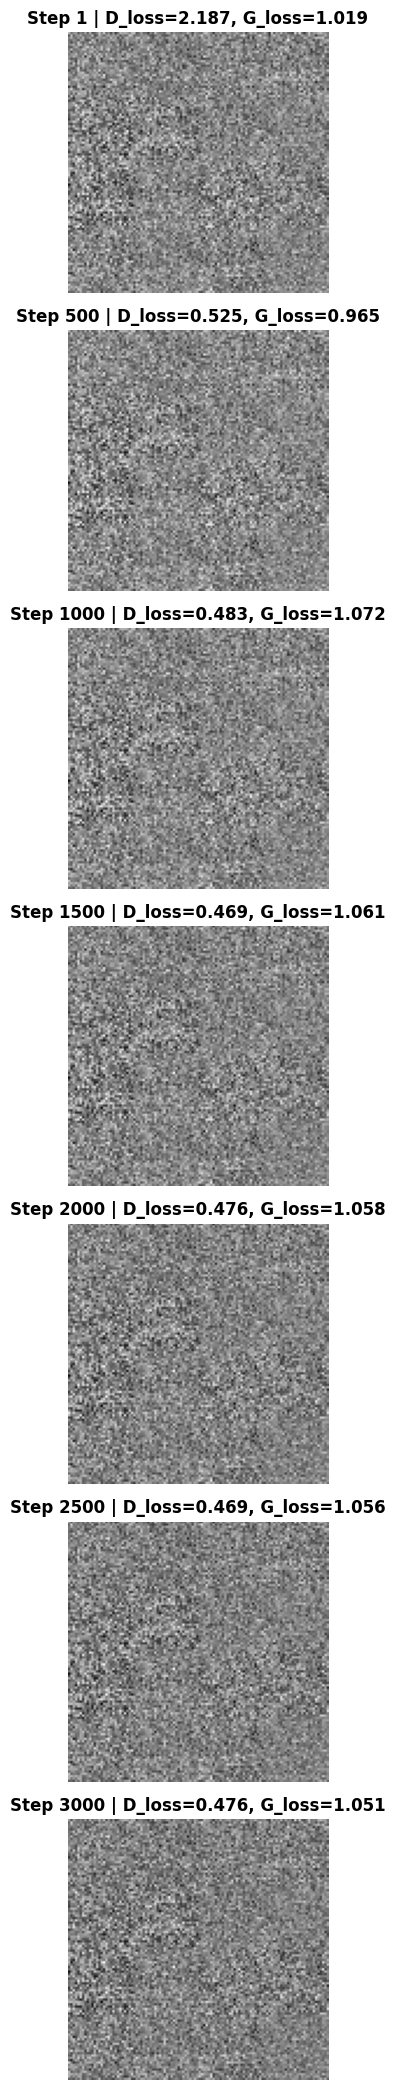

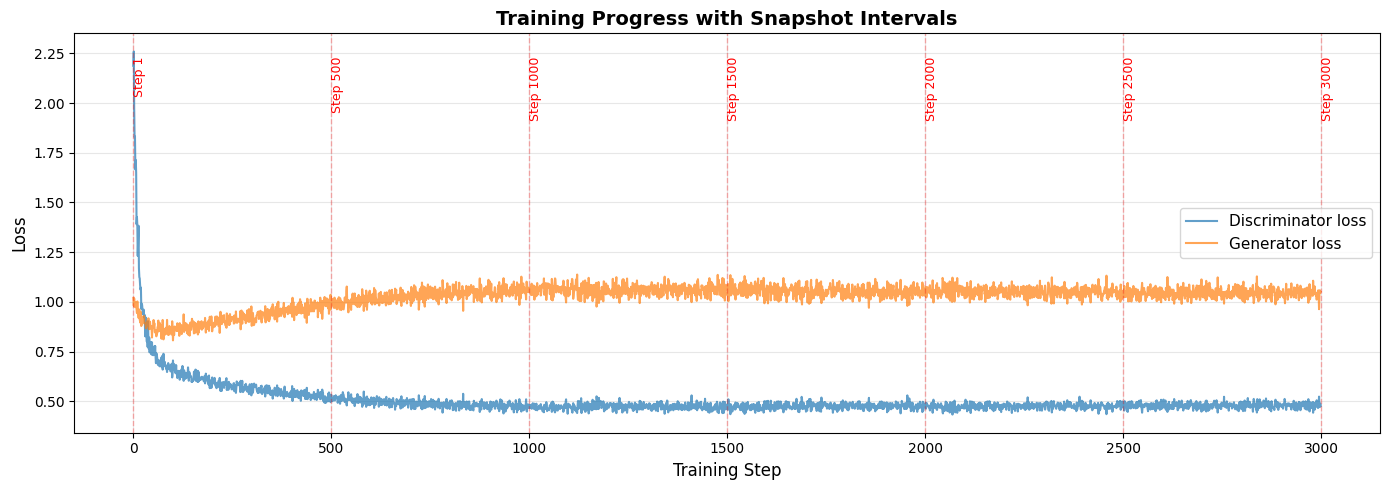

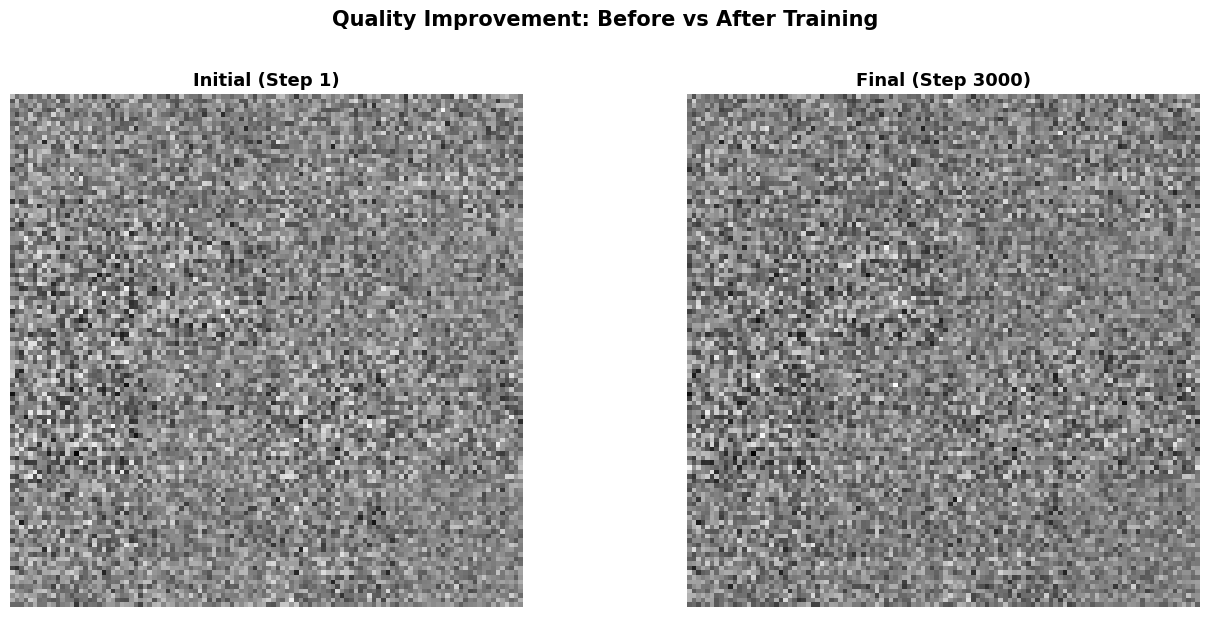


✅ Training progress visualization complete!
Total snapshots captured: 7
Snapshot steps: [1, 500, 1000, 1500, 2000, 2500, 3000]


In [30]:
# ============================================================================
# Visualize Training Progress Over Time
# ============================================================================

def train_gan_with_snapshots(X_data, noise_dim=20, hidden_dim_g=64, hidden_dim_d=64, 
                             batch_size=64, learning_rate_d=0.0005, learning_rate_g=0.0005, 
                             num_steps=3000, snapshot_interval=500, random_seed=42):
    """
    Train GAN and save generator outputs at fixed intervals.
    
    Parameters:
    -----------
    snapshot_interval : int
        Save generator outputs every N steps
    
    Returns:
    --------
    dict : Contains training history and snapshots at different steps
    """
    
    # Initialize weights
    rng = np.random.default_rng(seed=random_seed)
    
    # Generator weights
    W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim_g))
    b1_g = np.zeros(hidden_dim_g)
    W2_g = rng.normal(0, 0.1, size=(hidden_dim_g, X_data.shape[1]))
    b2_g = np.zeros(X_data.shape[1])
    
    # Discriminator weights
    W1_d = rng.normal(0, 0.1, size=(X_data.shape[1], hidden_dim_d))
    b1_d = np.zeros(hidden_dim_d)
    W2_d = rng.normal(0, 0.1, size=(hidden_dim_d, 1))
    b2_d = np.zeros(1)
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    def generate_samples(num_samples=16):
        """Generate samples using current generator weights."""
        z = rng.normal(0, 1, size=(num_samples, noise_dim))
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        return np.tanh(g_pre)
    
    # Fixed noise for consistent comparison across training
    z_fixed = rng.normal(0, 1, size=(16, noise_dim))
    
    # Storage for snapshots
    snapshots = {}
    losses_d = []
    losses_g = []
    
    print(f"Training for {num_steps} steps, saving snapshots every {snapshot_interval} steps...")
    
    # Training loop
    for step in range(num_steps):
        # Sample minibatch
        idx = rng.choice(len(X_data), size=batch_size, replace=False)
        real_batch = X_data[idx]
        z = rng.normal(0, 1, size=(batch_size, noise_dim))
        
        # Generator forward
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        fake_batch = np.tanh(g_pre)
        
        # Discriminator forward on real
        d_h_pre_real = real_batch @ W1_d + b1_d
        d_h_real = np.maximum(0, d_h_pre_real)
        d_logits_real = d_h_real @ W2_d + b2_d
        d_out_real = sigmoid(d_logits_real)
        
        # Discriminator forward on fake
        d_h_pre_fake = fake_batch @ W1_d + b1_d
        d_h_fake = np.maximum(0, d_h_pre_fake)
        d_logits_fake = d_h_fake @ W2_d + b2_d
        d_out_fake = sigmoid(d_logits_fake)
        
        # Discriminator loss and update
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
        
        d_delta_real = (d_out_real - y_real) / batch_size
        d_delta_fake = (d_out_fake - y_fake) / batch_size
        
        grad_W2_d = d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake
        grad_b2_d = np.sum(d_delta_real + d_delta_fake, axis=0)
        
        d_grad_h_real = d_delta_real @ W2_d.T
        d_grad_h_real[d_h_pre_real <= 0] = 0
        d_grad_h_fake = d_delta_fake @ W2_d.T
        d_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_W1_d = real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake
        grad_b1_d = np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
        
        W2_d -= learning_rate_d * grad_W2_d
        b2_d -= learning_rate_d * grad_b2_d
        W1_d -= learning_rate_d * grad_W1_d
        b1_d -= learning_rate_d * grad_b1_d
        
        # Generator loss and update
        y_gen = np.ones((batch_size, 1))
        loss_g = -np.mean(np.log(d_out_fake + 1e-8))
        
        g_delta_d = (d_out_fake - y_gen) / batch_size
        g_grad_h_fake = g_delta_d @ W2_d.T
        g_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_fake_input = g_grad_h_fake @ W1_d.T
        grad_g_pre = grad_fake_input * (1 - fake_batch ** 2)
        
        grad_W2_g = g_h.T @ grad_g_pre
        grad_b2_g = np.sum(grad_g_pre, axis=0)
        
        g_grad_h = grad_g_pre @ W2_g.T
        g_grad_h[g_h_pre <= 0] = 0
        
        grad_W1_g = z.T @ g_grad_h
        grad_b1_g = np.sum(g_grad_h, axis=0)
        
        W2_g -= learning_rate_g * grad_W2_g
        b2_g -= learning_rate_g * grad_b2_g
        W1_g -= learning_rate_g * grad_W1_g
        b1_g -= learning_rate_g * grad_b1_g
        
        # Record losses
        losses_d.append(loss_d)
        losses_g.append(loss_g)
        
        # Save snapshots at intervals
        if (step + 1) % snapshot_interval == 0 or step == 0:
            # Generate from fixed noise for consistent comparison
            g_h_pre_fixed = z_fixed @ W1_g + b1_g
            g_h_fixed = np.maximum(0, g_h_pre_fixed)
            g_pre_fixed = g_h_fixed @ W2_g + b2_g
            samples = np.tanh(g_pre_fixed)
            
            snapshots[step + 1] = {
                'samples': samples.copy(),
                'loss_d': loss_d,
                'loss_g': loss_g
            }
            print(f"  Step {step+1:4d}: loss_D={loss_d:.4f}, loss_G={loss_g:.4f}")
    
    return {
        'snapshots': snapshots,
        'losses_d': losses_d,
        'losses_g': losses_g,
        'snapshot_steps': sorted(snapshots.keys())
    }


def visualize_training_progress(results):
    """
    Visualize how generator outputs evolve during training.
    """
    snapshots = results['snapshots']
    snapshot_steps = results['snapshot_steps']
    losses_d = results['losses_d']
    losses_g = results['losses_g']
    
    num_snapshots = len(snapshot_steps)
    
    # ========================================================================
    # Figure 1: Generator outputs over time (Grid view)
    # ========================================================================
    fig = plt.figure(figsize=(18, 3 * num_snapshots))
    
    for idx, step in enumerate(snapshot_steps):
        samples = snapshots[step]['samples']
        
        # Create 4x4 grid of generated images
        ax = plt.subplot(num_snapshots, 1, idx + 1)
        samples_grid = samples[:16].reshape(4, 4, 28, 28)
        samples_grid = np.transpose(samples_grid, (0, 2, 1, 3))
        samples_grid = samples_grid.reshape(4*28, 4*28)
        
        ax.imshow(samples_grid, cmap='gray')
        ax.set_title(f'Step {step} | D_loss={snapshots[step]["loss_d"]:.3f}, '
                    f'G_loss={snapshots[step]["loss_g"]:.3f}',
                    fontsize=12, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Figure 2: Loss curves with snapshot markers
    # ========================================================================
    fig, ax = plt.subplots(figsize=(14, 5))
    
    ax.plot(losses_d, label='Discriminator loss', alpha=0.7, linewidth=1.5, color='#1f77b4')
    ax.plot(losses_g, label='Generator loss', alpha=0.7, linewidth=1.5, color='#ff7f0e')
    
    # Mark snapshot points
    for step in snapshot_steps:
        ax.axvline(x=step-1, color='red', linestyle='--', alpha=0.3, linewidth=1)
        ax.text(step-1, ax.get_ylim()[1] * 0.95, f'Step {step}', 
               rotation=90, verticalalignment='top', fontsize=9, color='red')
    
    ax.set_xlabel('Training Step', fontsize=12)
    ax.set_ylabel('Loss', fontsize=12)
    ax.set_title('Training Progress with Snapshot Intervals', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Figure 3: Side-by-side comparison (first vs last)
    # ========================================================================
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # First snapshot
    first_step = snapshot_steps[0]
    first_samples = snapshots[first_step]['samples'][:16].reshape(4, 4, 28, 28)
    first_grid = np.transpose(first_samples, (0, 2, 1, 3)).reshape(4*28, 4*28)
    
    axes[0].imshow(first_grid, cmap='gray')
    axes[0].set_title(f'Initial (Step {first_step})', fontsize=13, fontweight='bold')
    axes[0].axis('off')
    
    # Last snapshot
    last_step = snapshot_steps[-1]
    last_samples = snapshots[last_step]['samples'][:16].reshape(4, 4, 28, 28)
    last_grid = np.transpose(last_samples, (0, 2, 1, 3)).reshape(4*28, 4*28)
    
    axes[1].imshow(last_grid, cmap='gray')
    axes[1].set_title(f'Final (Step {last_step})', fontsize=13, fontweight='bold')
    axes[1].axis('off')
    
    plt.suptitle('Quality Improvement: Before vs After Training', 
                fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


# ============================================================================
# Run Training with Progress Snapshots
# ============================================================================
print("=" * 80)
print("GAN TRAINING PROGRESS VISUALIZATION")
print("=" * 80)
print("Training with snapshots every 500 steps...")
print("-" * 80)

results = train_gan_with_snapshots(
    X_data=X_gan,
    noise_dim=20,
    hidden_dim_g=64,
    hidden_dim_d=64,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    num_steps=3000,
    snapshot_interval=500,
    random_seed=42
)

print("\n" + "=" * 80)
print("VISUALIZING TRAINING PROGRESS")
print("=" * 80)

visualize_training_progress(results)

print("\n✅ Training progress visualization complete!")
print(f"Total snapshots captured: {len(results['snapshot_steps'])}")
print(f"Snapshot steps: {results['snapshot_steps']}")

7. Plot and Interpret Loss Curves
    - Plot loss_D and loss_G vs. iteration number.
    - Comment on training dynamics, instability, or signs of convergence.

GAN LOSS CURVE ANALYSIS
Training baseline model for detailed loss analysis...
--------------------------------------------------------------------------------
Step 500/2000, loss_D=0.5335, loss_G=0.9610
Step 1000/2000, loss_D=0.4741, loss_G=1.0554
Step 1500/2000, loss_D=0.4732, loss_G=1.0569
Step 2000/2000, loss_D=0.4898, loss_G=1.0301

--------------------------------------------------------------------------------
Analyzing loss curves...
--------------------------------------------------------------------------------


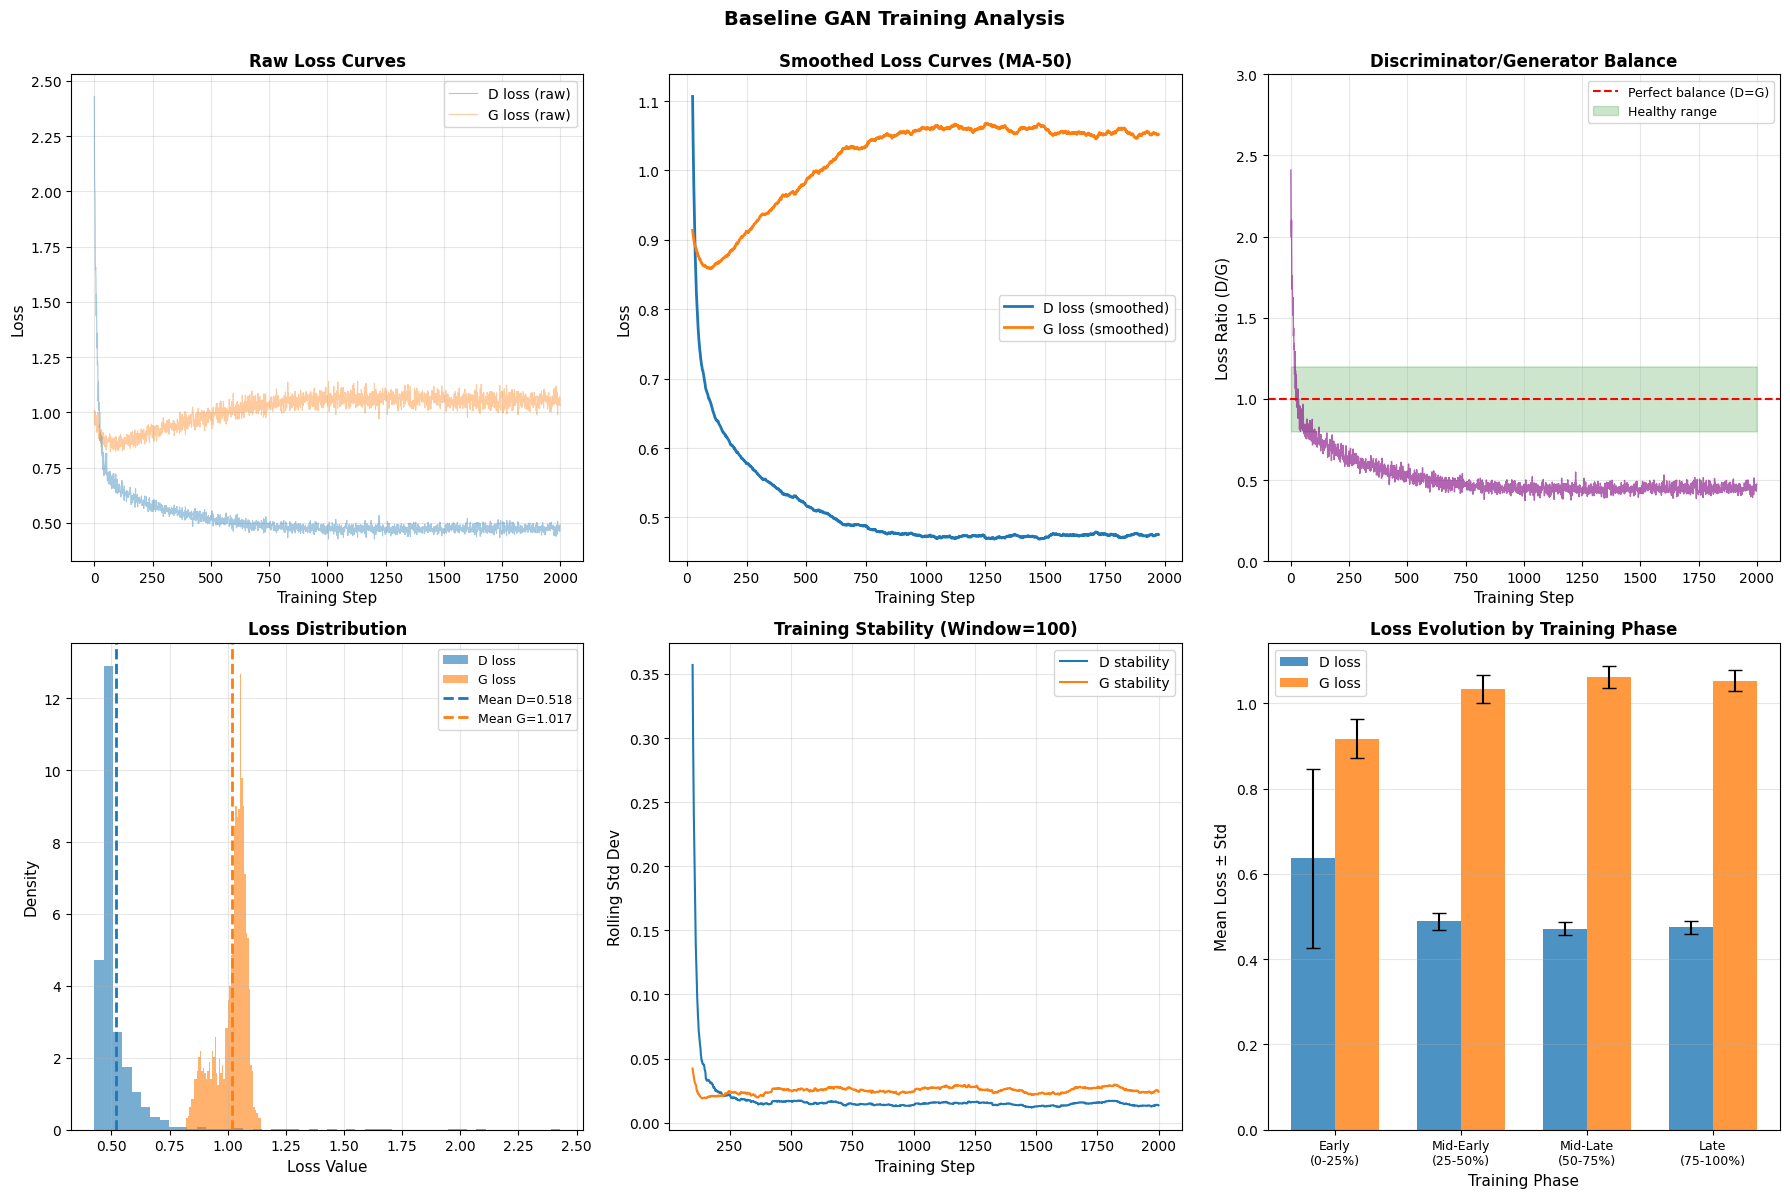


LOSS CURVE INTERPRETATION

📊 FINAL LOSSES:
   Discriminator: 0.4898
   Generator:     1.0301

📈 OVERALL STATISTICS:
   D - Mean: 0.5179, Std: 0.1264
   G - Mean: 1.0165, Std: 0.0672

🎯 CONVERGENCE INDICATORS:
   D trend: -0.6314 (decreasing ✓)
   G trend: +0.1383 (increasing ✗)

⚖️ STABILITY (Late Training):
   D: 0.0149 - STABLE ✓
   G: 0.0264 - STABLE ✓

🔄 OSCILLATION MEASURE (Coefficient of Variation):
   D: 0.2441 (lower = more stable)
   G: 0.0661 (lower = more stable)

TRAINING DYNAMICS ASSESSMENT
⚠️ G-DOMINANT: Generator is fooling D too easily. May lead to mode collapse.
   → Consider: Increase D learning rate, or add D capacity.


✅ Loss curve analysis complete!


In [ ]:
import pandas as pd
# ============================================================================
# Loss Curve Analysis and Interpretation
# ============================================================================

def analyze_loss_curves(losses_d, losses_g, window_size=50):
    """
    Comprehensive analysis of GAN training dynamics.
    
    Parameters:
    -----------
    losses_d : list
        Discriminator loss history
    losses_g : list
        Generator loss history
    window_size : int
        Window size for moving average smoothing
    
    Returns:
    --------
    dict : Analysis metrics
    """
    losses_d = np.array(losses_d)
    losses_g = np.array(losses_g)
    
    # Calculate moving averages for smoothed trends
    def moving_average(data, window):
        return np.convolve(data, np.ones(window)/window, mode='valid')
    
    losses_d_smooth = moving_average(losses_d, window_size)
    losses_g_smooth = moving_average(losses_g, window_size)
    
    # Calculate metrics
    metrics = {
        # Final values
        'final_loss_d': losses_d[-1],
        'final_loss_g': losses_g[-1],
        
        # Overall statistics
        'mean_loss_d': np.mean(losses_d),
        'mean_loss_g': np.mean(losses_g),
        'std_loss_d': np.std(losses_d),
        'std_loss_g': np.std(losses_g),
        
        # Stability (last 20% of training)
        'late_stability_d': np.std(losses_d[int(0.8*len(losses_d)):]),
        'late_stability_g': np.std(losses_g[int(0.8*len(losses_g)):]),
        
        # Convergence indicators
        'trend_d': losses_d_smooth[-1] - losses_d_smooth[0],  # Negative = decreasing
        'trend_g': losses_g_smooth[-1] - losses_g_smooth[0],
        
        # Oscillation measure (coefficient of variation)
        'cv_d': np.std(losses_d) / (np.mean(losses_d) + 1e-8),
        'cv_g': np.std(losses_g) / (np.mean(losses_g) + 1e-8),
    }
    
    return metrics, losses_d_smooth, losses_g_smooth


def plot_loss_analysis(results, title="GAN Training Analysis"):
    """
    Create comprehensive loss curve visualizations with interpretations.
    """
    losses_d = np.array(results['losses_d'])
    losses_g = np.array(results['losses_g'])
    
    # Perform analysis
    metrics, losses_d_smooth, losses_g_smooth = analyze_loss_curves(losses_d, losses_g)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(18, 12))
    
    # ========================================================================
    # Plot 1: Raw Loss Curves
    # ========================================================================
    ax1 = plt.subplot(2, 3, 1)
    ax1.plot(losses_d, alpha=0.4, linewidth=0.8, color='#1f77b4', label='D loss (raw)')
    ax1.plot(losses_g, alpha=0.4, linewidth=0.8, color='#ff7f0e', label='G loss (raw)')
    ax1.set_xlabel('Training Step', fontsize=11)
    ax1.set_ylabel('Loss', fontsize=11)
    ax1.set_title('Raw Loss Curves', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # ========================================================================
    # Plot 2: Smoothed Loss Curves (Moving Average)
    # ========================================================================
    ax2 = plt.subplot(2, 3, 2)
    window = 50
    offset = (len(losses_d) - len(losses_d_smooth)) // 2
    steps_smooth = np.arange(offset, offset + len(losses_d_smooth))
    
    ax2.plot(steps_smooth, losses_d_smooth, linewidth=2, color='#1f77b4', label='D loss (smoothed)')
    ax2.plot(steps_smooth, losses_g_smooth, linewidth=2, color='#ff7f0e', label='G loss (smoothed)')
    ax2.set_xlabel('Training Step', fontsize=11)
    ax2.set_ylabel('Loss', fontsize=11)
    ax2.set_title(f'Smoothed Loss Curves (MA-{window})', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    # ========================================================================
    # Plot 3: Loss Ratio (D/G balance)
    # ========================================================================
    ax3 = plt.subplot(2, 3, 3)
    loss_ratio = losses_d / (losses_g + 1e-8)
    ax3.plot(loss_ratio, color='purple', alpha=0.6, linewidth=1)
    ax3.axhline(y=1.0, color='red', linestyle='--', linewidth=1.5, label='Perfect balance (D=G)')
    ax3.fill_between(range(len(loss_ratio)), 0.8, 1.2, alpha=0.2, color='green', label='Healthy range')
    ax3.set_xlabel('Training Step', fontsize=11)
    ax3.set_ylabel('Loss Ratio (D/G)', fontsize=11)
    ax3.set_title('Discriminator/Generator Balance', fontsize=12, fontweight='bold')
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim([0, 3])
    
    # ========================================================================
    # Plot 4: Loss Distribution (Histogram)
    # ========================================================================
    ax4 = plt.subplot(2, 3, 4)
    ax4.hist(losses_d, bins=50, alpha=0.6, color='#1f77b4', label='D loss', density=True)
    ax4.hist(losses_g, bins=50, alpha=0.6, color='#ff7f0e', label='G loss', density=True)
    ax4.axvline(np.mean(losses_d), color='#1f77b4', linestyle='--', linewidth=2, label=f'Mean D={np.mean(losses_d):.3f}')
    ax4.axvline(np.mean(losses_g), color='#ff7f0e', linestyle='--', linewidth=2, label=f'Mean G={np.mean(losses_g):.3f}')
    ax4.set_xlabel('Loss Value', fontsize=11)
    ax4.set_ylabel('Density', fontsize=11)
    ax4.set_title('Loss Distribution', fontsize=12, fontweight='bold')
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3)
    
    # ========================================================================
    # Plot 5: Rolling Standard Deviation (Stability)
    # ========================================================================
    ax5 = plt.subplot(2, 3, 5)
    rolling_window = 100
    rolling_std_d = pd.Series(losses_d).rolling(window=rolling_window).std()
    rolling_std_g = pd.Series(losses_g).rolling(window=rolling_window).std()
    
    ax5.plot(rolling_std_d, color='#1f77b4', linewidth=1.5, label='D stability')
    ax5.plot(rolling_std_g, color='#ff7f0e', linewidth=1.5, label='G stability')
    ax5.set_xlabel('Training Step', fontsize=11)
    ax5.set_ylabel('Rolling Std Dev', fontsize=11)
    ax5.set_title(f'Training Stability (Window={rolling_window})', fontsize=12, fontweight='bold')
    ax5.legend(fontsize=10)
    ax5.grid(True, alpha=0.3)
    
    # ========================================================================
    # Plot 6: Convergence Analysis (Phase Diagram)
    # ========================================================================
    ax6 = plt.subplot(2, 3, 6)
    
    # Divide training into phases
    n_steps = len(losses_d)
    phase_size = n_steps // 4
    phases = ['Early\n(0-25%)', 'Mid-Early\n(25-50%)', 'Mid-Late\n(50-75%)', 'Late\n(75-100%)']
    
    phase_means_d = []
    phase_means_g = []
    phase_stds_d = []
    phase_stds_g = []
    
    for i in range(4):
        start = i * phase_size
        end = (i + 1) * phase_size if i < 3 else n_steps
        phase_means_d.append(np.mean(losses_d[start:end]))
        phase_means_g.append(np.mean(losses_g[start:end]))
        phase_stds_d.append(np.std(losses_d[start:end]))
        phase_stds_g.append(np.std(losses_g[start:end]))
    
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = ax6.bar(x - width/2, phase_means_d, width, yerr=phase_stds_d, 
                    label='D loss', alpha=0.8, capsize=5, color='#1f77b4')
    bars2 = ax6.bar(x + width/2, phase_means_g, width, yerr=phase_stds_g,
                    label='G loss', alpha=0.8, capsize=5, color='#ff7f0e')
    
    ax6.set_xlabel('Training Phase', fontsize=11)
    ax6.set_ylabel('Mean Loss ± Std', fontsize=11)
    ax6.set_title('Loss Evolution by Training Phase', fontsize=12, fontweight='bold')
    ax6.set_xticks(x)
    ax6.set_xticklabels(phases, fontsize=9)
    ax6.legend(fontsize=10)
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(f'{title}', fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Print Interpretation
    # ========================================================================
    print("\n" + "=" * 80)
    print("LOSS CURVE INTERPRETATION")
    print("=" * 80)
    
    print(f"\n📊 FINAL LOSSES:")
    print(f"   Discriminator: {metrics['final_loss_d']:.4f}")
    print(f"   Generator:     {metrics['final_loss_g']:.4f}")
    
    print(f"\n📈 OVERALL STATISTICS:")
    print(f"   D - Mean: {metrics['mean_loss_d']:.4f}, Std: {metrics['std_loss_d']:.4f}")
    print(f"   G - Mean: {metrics['mean_loss_g']:.4f}, Std: {metrics['std_loss_g']:.4f}")
    
    print(f"\n🎯 CONVERGENCE INDICATORS:")
    trend_d_text = "decreasing ✓" if metrics['trend_d'] < 0 else "increasing ✗"
    trend_g_text = "decreasing ✓" if metrics['trend_g'] < 0 else "increasing ✗"
    print(f"   D trend: {metrics['trend_d']:+.4f} ({trend_d_text})")
    print(f"   G trend: {metrics['trend_g']:+.4f} ({trend_g_text})")
    
    print(f"\n⚖️ STABILITY (Late Training):")
    stability_d = "STABLE ✓" if metrics['late_stability_d'] < 0.5 else "UNSTABLE ⚠"
    stability_g = "STABLE ✓" if metrics['late_stability_g'] < 0.5 else "UNSTABLE ⚠"
    print(f"   D: {metrics['late_stability_d']:.4f} - {stability_d}")
    print(f"   G: {metrics['late_stability_g']:.4f} - {stability_g}")
    
    print(f"\n🔄 OSCILLATION MEASURE (Coefficient of Variation):")
    print(f"   D: {metrics['cv_d']:.4f} (lower = more stable)")
    print(f"   G: {metrics['cv_g']:.4f} (lower = more stable)")
    
    print("\n" + "=" * 80)
    print("TRAINING DYNAMICS ASSESSMENT")
    print("=" * 80)
    
    # Interpret training dynamics
    ratio = metrics['final_loss_d'] / (metrics['final_loss_g'] + 1e-8)
    
    if 0.8 <= ratio <= 1.2:
        print("✅ BALANCED: D and G losses are well-balanced. Good training dynamics!")
    elif ratio > 1.5:
        print("⚠️ D-DOMINANT: Discriminator is too strong. G may struggle to learn.")
        print("   → Consider: Lower D learning rate, or train G more frequently.")
    elif ratio < 0.6:
        print("⚠️ G-DOMINANT: Generator is fooling D too easily. May lead to mode collapse.")
        print("   → Consider: Increase D learning rate, or add D capacity.")
    else:
        print("🟡 SLIGHT IMBALANCE: Training is acceptable but could be optimized.")
    
    if metrics['late_stability_d'] > 0.5 or metrics['late_stability_g'] > 0.5:
        print("\n⚠️ HIGH INSTABILITY detected in late training:")
        print("   → Losses are oscillating significantly.")
        print("   → Consider: Reduce learning rates, increase batch size, or add gradient clipping.")
    
    if metrics['trend_d'] > 0 and metrics['trend_g'] > 0:
        print("\n❌ DIVERGENCE detected:")
        print("   → Both losses are increasing over time.")
        print("   → Training may have collapsed. Consider restarting with different hyperparameters.")
    elif metrics['trend_d'] < 0 and metrics['trend_g'] < 0:
        print("\n✅ CONVERGENCE observed:")
        print("   → Both losses are decreasing steadily. Training is progressing well!")
    
    print("\n" + "=" * 80)
    
    return metrics


# ============================================================================
# Run Loss Curve Analysis
# ============================================================================

print("=" * 80)
print("GAN LOSS CURVE ANALYSIS")
print("=" * 80)
print("Training baseline model for detailed loss analysis...")
print("-" * 80)

# Train a baseline model
baseline_results = train_gan(
    X_data=X_gan,
    noise_dim=20,
    hidden_dim_g=64,
    hidden_dim_d=64,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    num_steps=2000,
    random_seed=42,
    verbose=True
)

print("\n" + "-" * 80)
print("Analyzing loss curves...")
print("-" * 80)

# Perform comprehensive analysis
metrics = plot_loss_analysis(baseline_results, title="Baseline GAN Training Analysis")


8. Mode Collapse Experiment
    - Purposely use unstable hyperparameters to induce collapse.
    - Describe how outputs degenerate and why this occurs.

MODE COLLAPSE EXPERIMENTS
Testing various unstable hyperparameter configurations...

EXPERIMENT 1: BASELINE (Stable Configuration)
Configuration: Balanced learning rates, equal G/D updates
--------------------------------------------------------------------------------
Training with G_steps=1, D_steps=1
  Step    1: loss_D=2.1870, loss_G=0.9748, diversity=0.029576
  Step  500: loss_D=0.5101, loss_G=0.9965, diversity=0.029024
  Step 1000: loss_D=0.4787, loss_G=1.0844, diversity=0.028067
  Step 1500: loss_D=0.4880, loss_G=1.1210, diversity=0.026965
  Step 2000: loss_D=0.4788, loss_G=1.0426, diversity=0.025899

EXPERIMENT 2: HIGH GENERATOR LEARNING RATE
Configuration: G_lr = 0.003 (6x higher), D_lr = 0.0005
Expected: G overpowers D → mode collapse
--------------------------------------------------------------------------------
Training with G_steps=1, D_steps=1
  Step    1: loss_D=2.1870, loss_G=0.9748, diversity=0.029571
  Step  500: loss_D=0.8628, loss_G=0.6258, diversity=0.029144
  Ste

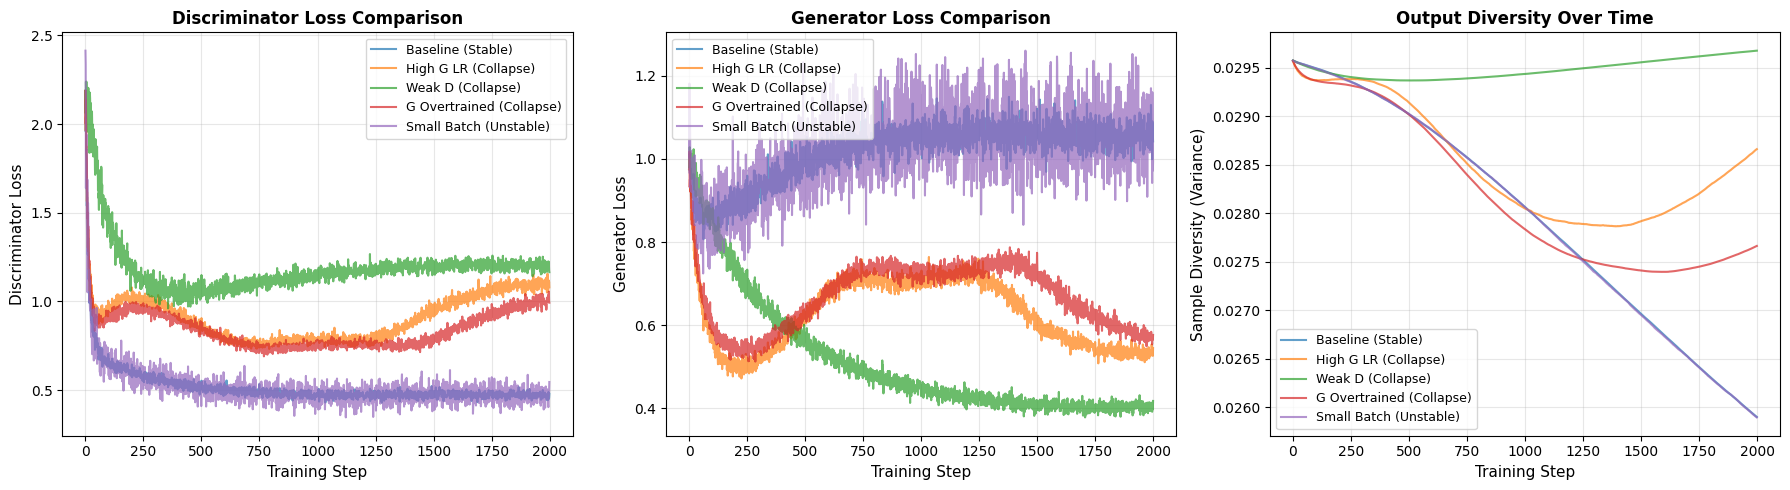

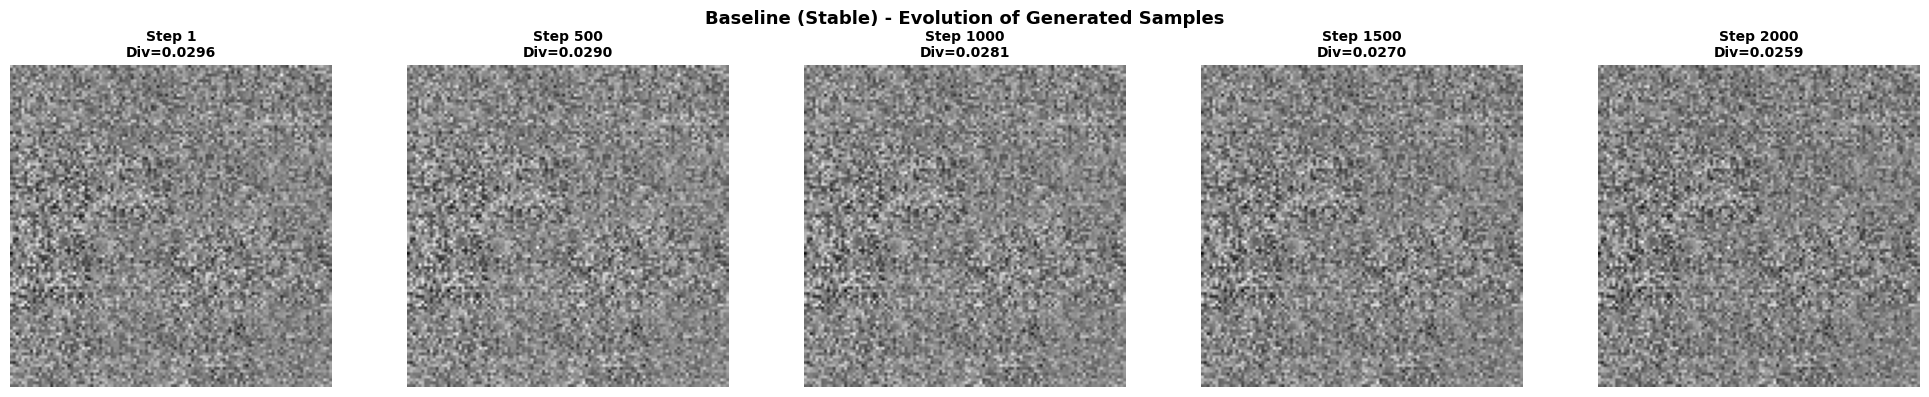

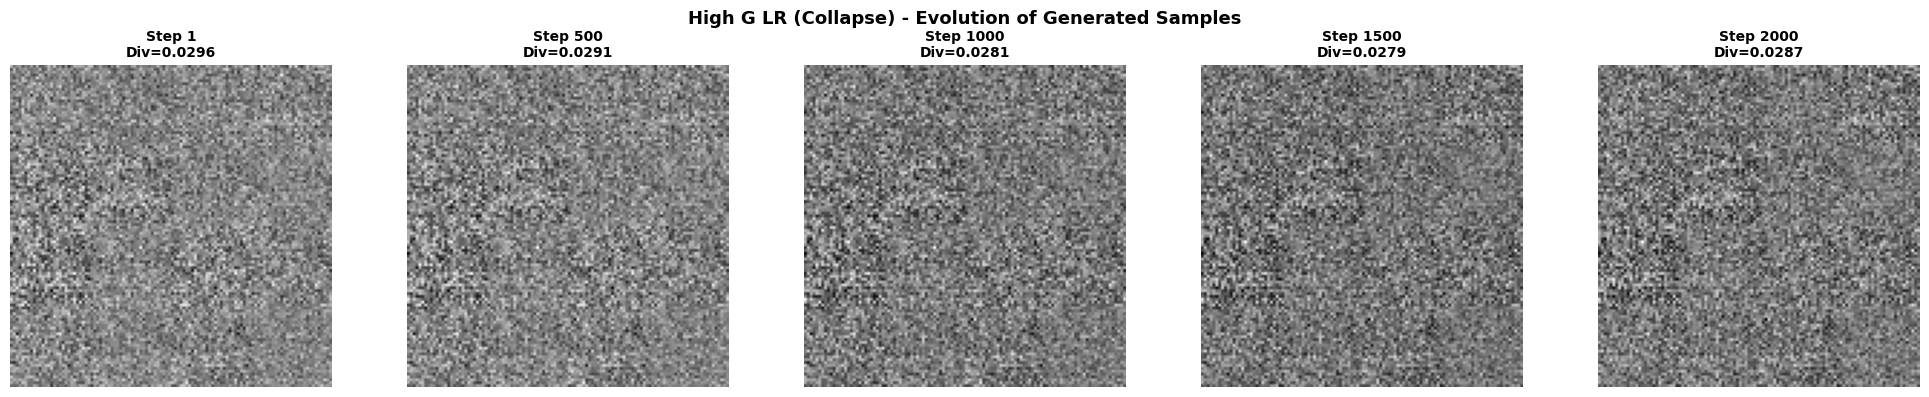

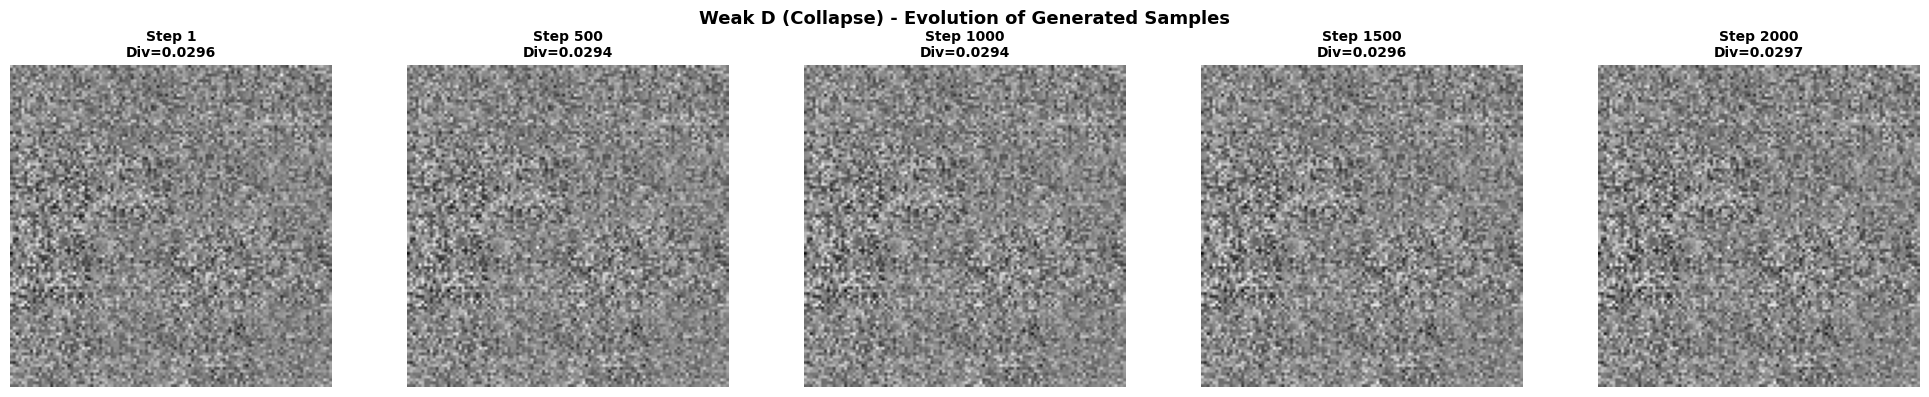

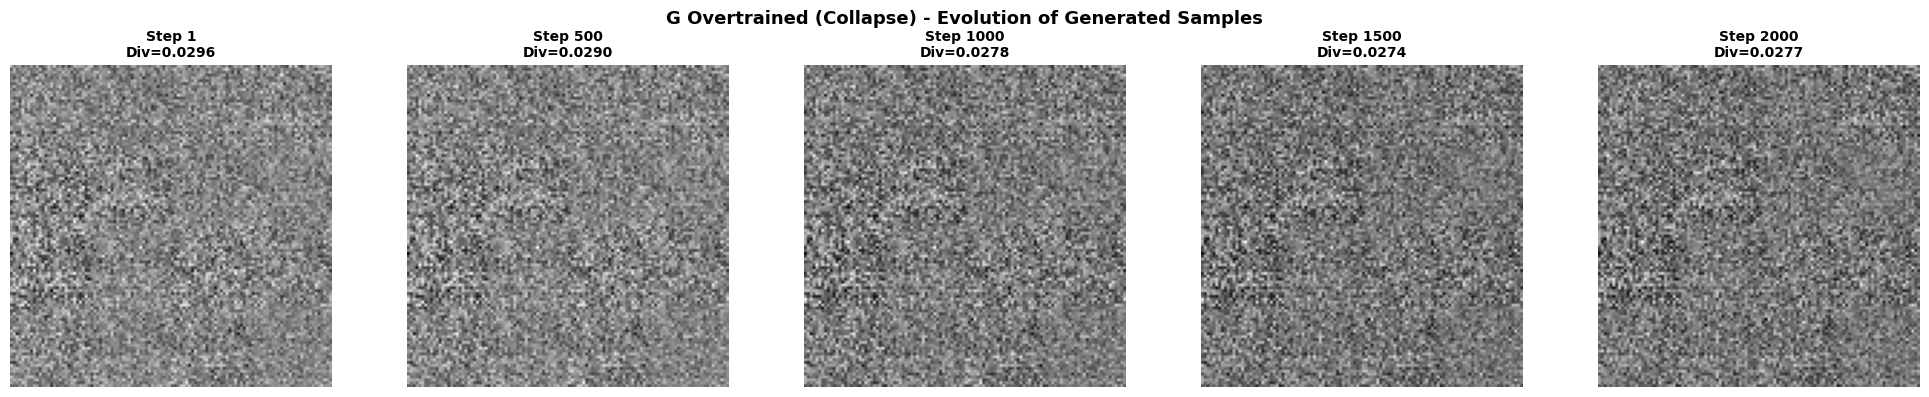

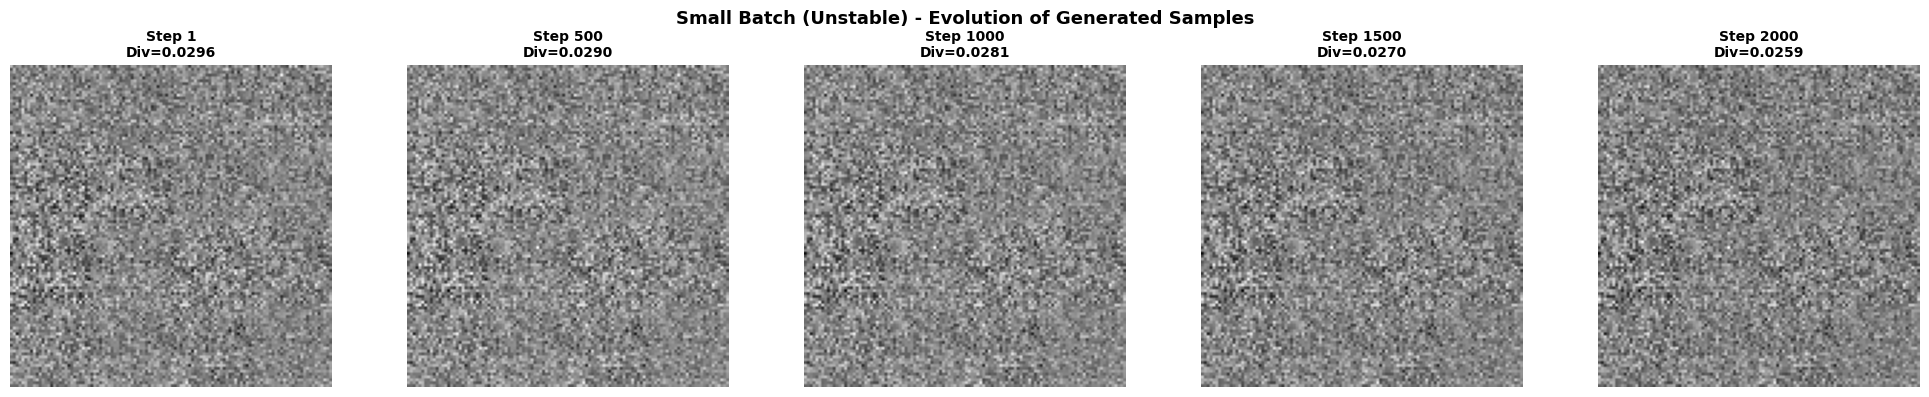


MODE COLLAPSE ANALYSIS SUMMARY

Baseline (Stable):
  Final Diversity: 0.025899 (drop: 12.4%)
  Final Loss D: 0.4788, G: 1.0426
  ✅ Healthy diversity maintained

High G LR (Collapse):
  Final Diversity: 0.028662 (drop: 3.1%)
  Final Loss D: 1.0795, G: 0.5450
  ✅ Healthy diversity maintained

Weak D (Collapse):
  Final Diversity: 0.029678 (drop: -0.3%)
  Final Loss D: 1.1648, G: 0.4176
  ✅ Healthy diversity maintained

G Overtrained (Collapse):
  Final Diversity: 0.027663 (drop: 6.5%)
  Final Loss D: 0.9929, G: 0.5765
  ✅ Healthy diversity maintained

Small Batch (Unstable):
  Final Diversity: 0.025895 (drop: 12.4%)
  Final Loss D: 0.5456, G: 0.9944
  ✅ Healthy diversity maintained

WHY MODE COLLAPSE OCCURS

Mode collapse happens when the Generator finds one or few outputs that fool
the Discriminator, and keeps producing only those outputs, losing diversity.

CAUSES:
1. 🔴 G too strong (high learning rate):
   → G quickly finds a solution and exploits it repeatedly
   → D can't adapt fas

In [33]:
# ============================================================================
# Mode Collapse Experiment
# ============================================================================

def train_gan_mode_collapse(X_data, noise_dim=20, hidden_dim_g=64, hidden_dim_d=64, 
                           batch_size=64, learning_rate_d=0.0005, learning_rate_g=0.0005, 
                           g_steps=1, d_steps=1, num_steps=2000, snapshot_interval=400,
                           random_seed=42):
    """
    Train GAN with configurable D/G update ratio to study mode collapse.
    
    Parameters:
    -----------
    g_steps : int
        Number of generator updates per iteration
    d_steps : int
        Number of discriminator updates per iteration
    """
    
    rng = np.random.default_rng(seed=random_seed)
    
    # Initialize weights
    W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim_g))
    b1_g = np.zeros(hidden_dim_g)
    W2_g = rng.normal(0, 0.1, size=(hidden_dim_g, X_data.shape[1]))
    b2_g = np.zeros(X_data.shape[1])
    
    W1_d = rng.normal(0, 0.1, size=(X_data.shape[1], hidden_dim_d))
    b1_d = np.zeros(hidden_dim_d)
    W2_d = rng.normal(0, 0.1, size=(hidden_dim_d, 1))
    b2_d = np.zeros(1)
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    # Fixed noise for consistent snapshots
    z_fixed = rng.normal(0, 1, size=(16, noise_dim))
    
    snapshots = {}
    losses_d = []
    losses_g = []
    sample_diversity = []  # Track diversity over time
    
    print(f"Training with G_steps={g_steps}, D_steps={d_steps}")
    
    for step in range(num_steps):
        # ======== Train Discriminator ========
        for _ in range(d_steps):
            idx = rng.choice(len(X_data), size=batch_size, replace=False)
            real_batch = X_data[idx]
            z = rng.normal(0, 1, size=(batch_size, noise_dim))
            
            # Generator forward
            g_h_pre = z @ W1_g + b1_g
            g_h = np.maximum(0, g_h_pre)
            g_pre = g_h @ W2_g + b2_g
            fake_batch = np.tanh(g_pre)
            
            # Discriminator forward
            d_h_pre_real = real_batch @ W1_d + b1_d
            d_h_real = np.maximum(0, d_h_pre_real)
            d_out_real = sigmoid(d_h_real @ W2_d + b2_d)
            
            d_h_pre_fake = fake_batch @ W1_d + b1_d
            d_h_fake = np.maximum(0, d_h_pre_fake)
            d_out_fake = sigmoid(d_h_fake @ W2_d + b2_d)
            
            # D loss and update
            loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
            
            y_real = np.ones((batch_size, 1))
            y_fake = np.zeros((batch_size, 1))
            
            d_delta_real = (d_out_real - y_real) / batch_size
            d_delta_fake = (d_out_fake - y_fake) / batch_size
            
            grad_W2_d = d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake
            grad_b2_d = np.sum(d_delta_real + d_delta_fake, axis=0)
            
            d_grad_h_real = d_delta_real @ W2_d.T
            d_grad_h_real[d_h_pre_real <= 0] = 0
            d_grad_h_fake = d_delta_fake @ W2_d.T
            d_grad_h_fake[d_h_pre_fake <= 0] = 0
            
            grad_W1_d = real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake
            grad_b1_d = np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
            
            W2_d -= learning_rate_d * grad_W2_d
            b2_d -= learning_rate_d * grad_b2_d
            W1_d -= learning_rate_d * grad_W1_d
            b1_d -= learning_rate_d * grad_b1_d
        
        # ======== Train Generator ========
        for _ in range(g_steps):
            z = rng.normal(0, 1, size=(batch_size, noise_dim))
            
            g_h_pre = z @ W1_g + b1_g
            g_h = np.maximum(0, g_h_pre)
            g_pre = g_h @ W2_g + b2_g
            fake_batch = np.tanh(g_pre)
            
            d_h_pre_fake = fake_batch @ W1_d + b1_d
            d_h_fake = np.maximum(0, d_h_pre_fake)
            d_out_fake = sigmoid(d_h_fake @ W2_d + b2_d)
            
            loss_g = -np.mean(np.log(d_out_fake + 1e-8))
            
            y_gen = np.ones((batch_size, 1))
            g_delta_d = (d_out_fake - y_gen) / batch_size
            g_grad_h_fake = g_delta_d @ W2_d.T
            g_grad_h_fake[d_h_pre_fake <= 0] = 0
            
            grad_fake_input = g_grad_h_fake @ W1_d.T
            grad_g_pre = grad_fake_input * (1 - fake_batch ** 2)
            
            grad_W2_g = g_h.T @ grad_g_pre
            grad_b2_g = np.sum(grad_g_pre, axis=0)
            
            g_grad_h = grad_g_pre @ W2_g.T
            g_grad_h[g_h_pre <= 0] = 0
            
            grad_W1_g = z.T @ g_grad_h
            grad_b1_g = np.sum(g_grad_h, axis=0)
            
            W2_g -= learning_rate_g * grad_W2_g
            b2_g -= learning_rate_g * grad_b2_g
            W1_g -= learning_rate_g * grad_W1_g
            b1_g -= learning_rate_g * grad_b1_g
        
        losses_d.append(loss_d)
        losses_g.append(loss_g)
        
        # Measure diversity: variance in generated samples
        g_h_fixed = np.maximum(0, z_fixed @ W1_g + b1_g)
        samples_fixed = np.tanh(g_h_fixed @ W2_g + b2_g)
        diversity = np.mean(np.var(samples_fixed, axis=0))
        sample_diversity.append(diversity)
        
        # Save snapshots
        if (step + 1) % snapshot_interval == 0 or step == 0:
            snapshots[step + 1] = {
                'samples': samples_fixed.copy(),
                'loss_d': loss_d,
                'loss_g': loss_g,
                'diversity': diversity
            }
            print(f"  Step {step+1:4d}: loss_D={loss_d:.4f}, loss_G={loss_g:.4f}, diversity={diversity:.6f}")
    
    return {
        'snapshots': snapshots,
        'losses_d': losses_d,
        'losses_g': losses_g,
        'diversity': sample_diversity,
        'snapshot_steps': sorted(snapshots.keys())
    }


def visualize_mode_collapse(results_dict, titles):
    """
    Compare multiple training runs to show mode collapse effects.
    """
    num_experiments = len(results_dict)
    
    # ========================================================================
    # Figure 1: Loss Curves Comparison
    # ========================================================================
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot discriminator losses
    ax = axes[0]
    for name, results in results_dict.items():
        ax.plot(results['losses_d'], label=name, alpha=0.7, linewidth=1.5)
    ax.set_xlabel('Training Step', fontsize=11)
    ax.set_ylabel('Discriminator Loss', fontsize=11)
    ax.set_title('Discriminator Loss Comparison', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Plot generator losses
    ax = axes[1]
    for name, results in results_dict.items():
        ax.plot(results['losses_g'], label=name, alpha=0.7, linewidth=1.5)
    ax.set_xlabel('Training Step', fontsize=11)
    ax.set_ylabel('Generator Loss', fontsize=11)
    ax.set_title('Generator Loss Comparison', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Plot diversity metric
    ax = axes[2]
    for name, results in results_dict.items():
        ax.plot(results['diversity'], label=name, alpha=0.7, linewidth=1.5)
    ax.set_xlabel('Training Step', fontsize=11)
    ax.set_ylabel('Sample Diversity (Variance)', fontsize=11)
    ax.set_title('Output Diversity Over Time', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Figure 2: Generated Samples Comparison
    # ========================================================================
    for name, results in results_dict.items():
        snapshots = results['snapshots']
        snapshot_steps = results['snapshot_steps']
        
        num_snapshots = len(snapshot_steps)
        fig, axes = plt.subplots(1, num_snapshots, figsize=(4*num_snapshots, 4))
        
        if num_snapshots == 1:
            axes = [axes]
        
        for idx, step in enumerate(snapshot_steps):
            samples = snapshots[step]['samples']
            samples_grid = samples[:16].reshape(4, 4, 28, 28)
            samples_grid = np.transpose(samples_grid, (0, 2, 1, 3))
            samples_grid = samples_grid.reshape(4*28, 4*28)
            
            axes[idx].imshow(samples_grid, cmap='gray')
            axes[idx].set_title(f'Step {step}\nDiv={snapshots[step]["diversity"]:.4f}', 
                               fontsize=10, fontweight='bold')
            axes[idx].axis('off')
        
        plt.suptitle(f'{name} - Evolution of Generated Samples', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()


# ============================================================================
# Experiment Configurations
# ============================================================================
print("=" * 80)
print("MODE COLLAPSE EXPERIMENTS")
print("=" * 80)
print("Testing various unstable hyperparameter configurations...")
print("=" * 80)

# Store results from all experiments
collapse_results = {}

# ============================================================================
# Experiment 1: BASELINE (Stable)
# ============================================================================
print("\n" + "=" * 80)
print("EXPERIMENT 1: BASELINE (Stable Configuration)")
print("=" * 80)
print("Configuration: Balanced learning rates, equal G/D updates")
print("-" * 80)

baseline = train_gan_mode_collapse(
    X_data=X_gan,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    g_steps=1,
    d_steps=1,
    num_steps=2000,
    snapshot_interval=500,
    random_seed=42
)
collapse_results['Baseline (Stable)'] = baseline

# ============================================================================
# Experiment 2: HIGH G LEARNING RATE (G too aggressive)
# ============================================================================
print("\n" + "=" * 80)
print("EXPERIMENT 2: HIGH GENERATOR LEARNING RATE")
print("=" * 80)
print("Configuration: G_lr = 0.003 (6x higher), D_lr = 0.0005")
print("Expected: G overpowers D → mode collapse")
print("-" * 80)

high_g_lr = train_gan_mode_collapse(
    X_data=X_gan,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.003,  # Very high G learning rate
    g_steps=1,
    d_steps=1,
    num_steps=2000,
    snapshot_interval=500,
    random_seed=42
)
collapse_results['High G LR (Collapse)'] = high_g_lr

# ============================================================================
# Experiment 3: WEAK DISCRIMINATOR (Low D learning rate)
# ============================================================================
print("\n" + "=" * 80)
print("EXPERIMENT 3: WEAK DISCRIMINATOR")
print("=" * 80)
print("Configuration: D_lr = 0.00005 (10x lower), G_lr = 0.0005")
print("Expected: D too weak to provide meaningful feedback → collapse")
print("-" * 80)

weak_d = train_gan_mode_collapse(
    X_data=X_gan,
    batch_size=64,
    learning_rate_d=0.00005,  # Very low D learning rate
    learning_rate_g=0.0005,
    g_steps=1,
    d_steps=1,
    num_steps=2000,
    snapshot_interval=500,
    random_seed=42
)
collapse_results['Weak D (Collapse)'] = weak_d

# ============================================================================
# Experiment 4: G TRAINED TOO OFTEN
# ============================================================================
print("\n" + "=" * 80)
print("EXPERIMENT 4: GENERATOR OVERTRAINED")
print("=" * 80)
print("Configuration: G updates 5x per D update")
print("Expected: G exploits D's weaknesses → mode collapse")
print("-" * 80)

g_overtrained = train_gan_mode_collapse(
    X_data=X_gan,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    g_steps=5,  # Train G 5 times per D update
    d_steps=1,
    num_steps=2000,
    snapshot_interval=500,
    random_seed=42
)
collapse_results['G Overtrained (Collapse)'] = g_overtrained

# ============================================================================
# Experiment 5: SMALL BATCH SIZE
# ============================================================================
print("\n" + "=" * 80)
print("EXPERIMENT 5: VERY SMALL BATCH SIZE")
print("=" * 80)
print("Configuration: Batch size = 8 (8x smaller)")
print("Expected: High gradient noise → instability → collapse")
print("-" * 80)

small_batch = train_gan_mode_collapse(
    X_data=X_gan,
    batch_size=8,  # Very small batch
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    g_steps=1,
    d_steps=1,
    num_steps=2000,
    snapshot_interval=500,
    random_seed=42
)
collapse_results['Small Batch (Unstable)'] = small_batch

# ============================================================================
# Comparative Visualization
# ============================================================================
print("\n" + "=" * 80)
print("COMPARATIVE ANALYSIS")
print("=" * 80)

visualize_mode_collapse(collapse_results, 
                       ['Baseline', 'High G LR', 'Weak D', 'G Overtrained', 'Small Batch'])

# ============================================================================
# Analysis Summary
# ============================================================================
print("\n" + "=" * 80)
print("MODE COLLAPSE ANALYSIS SUMMARY")
print("=" * 80)

for name, results in collapse_results.items():
    final_diversity = results['diversity'][-1]
    initial_diversity = results['diversity'][0]
    diversity_drop = (initial_diversity - final_diversity) / initial_diversity * 100
    
    final_loss_d = results['losses_d'][-1]
    final_loss_g = results['losses_g'][-1]
    
    print(f"\n{name}:")
    print(f"  Final Diversity: {final_diversity:.6f} (drop: {diversity_drop:.1f}%)")
    print(f"  Final Loss D: {final_loss_d:.4f}, G: {final_loss_g:.4f}")
    
    if diversity_drop > 50:
        print(f"  ⚠️ SEVERE MODE COLLAPSE detected!")
    elif diversity_drop > 30:
        print(f"  ⚠️ Moderate mode collapse observed")
    else:
        print(f"  ✅ Healthy diversity maintained")

print("\n" + "=" * 80)
print("WHY MODE COLLAPSE OCCURS")
print("=" * 80)
print("""
Mode collapse happens when the Generator finds one or few outputs that fool
the Discriminator, and keeps producing only those outputs, losing diversity.

CAUSES:
1. 🔴 G too strong (high learning rate):
   → G quickly finds a solution and exploits it repeatedly
   → D can't adapt fast enough to penalize the repeated pattern

2. 🔴 D too weak (low learning rate or capacity):
   → D fails to distinguish between real and fake effectively
   → G receives poor feedback, converges to limited modes

3. 🔴 G trained too often relative to D:
   → G over-optimizes against current D
   → D's gradient becomes unreliable before it can update

4. 🔴 Small batch size:
   → High gradient variance leads to unstable training
   → Both networks struggle to learn robust features

5. 🔴 Lack of diversity penalty:
   → No explicit incentive for G to produce varied outputs
   → G naturally gravitates toward easiest-to-generate samples

SYMPTOMS:
- Generated samples become very similar (low variance)
- G loss drops very low (fooling D easily)
- D loss increases or becomes erratic
- Visual inspection shows repetitive patterns

SOLUTIONS:
- Balance learning rates (often D_lr > G_lr)
- Use larger batch sizes for stable gradients
- Add diversity regularization or minibatch discrimination
- Use techniques like Unrolled GAN or Wasserstein GAN
- Monitor diversity metrics during training
""")

print("=" * 80)
print("✅ Mode collapse experiments complete!")

9. Modify GAN Architecture
    - Play with model parameters to achieve lower generative loss.
    - Analyze impact on learning capacity and output diversity.

GAN ARCHITECTURE MODIFICATION EXPERIMENTS
Testing different architectures to optimize generative performance...

ARCHITECTURE 1: BASELINE
Generator:     [20 → 64 → 784]
Discriminator: [784 → 64 → 1]
Activation: ReLU
--------------------------------------------------------------------------------
  Step 500: loss_D=0.5245, loss_G=0.9650, diversity=0.1663
  Step 1000: loss_D=0.4832, loss_G=1.0720, diversity=0.1635
  Step 1500: loss_D=0.4687, loss_G=1.0617, diversity=0.1602
  Step 2000: loss_D=0.4764, loss_G=1.0578, diversity=0.1571

ARCHITECTURE 2: DEEPER GENERATOR
Generator:     [20 → 128 → 128 → 784]
Discriminator: [784 → 64 → 1]
Activation: ReLU
--------------------------------------------------------------------------------
  Step 500: loss_D=0.6371, loss_G=0.8724, diversity=0.1896
  Step 1000: loss_D=0.5934, loss_G=0.8939, diversity=0.1852
  Step 1500: loss_D=0.6337, loss_G=0.8586, diversity=0.1803
  Step 2000: loss_D=0.6029, loss_G=0.8866, diversity=0.1764

ARCHITECTURE 3: WIDER NE

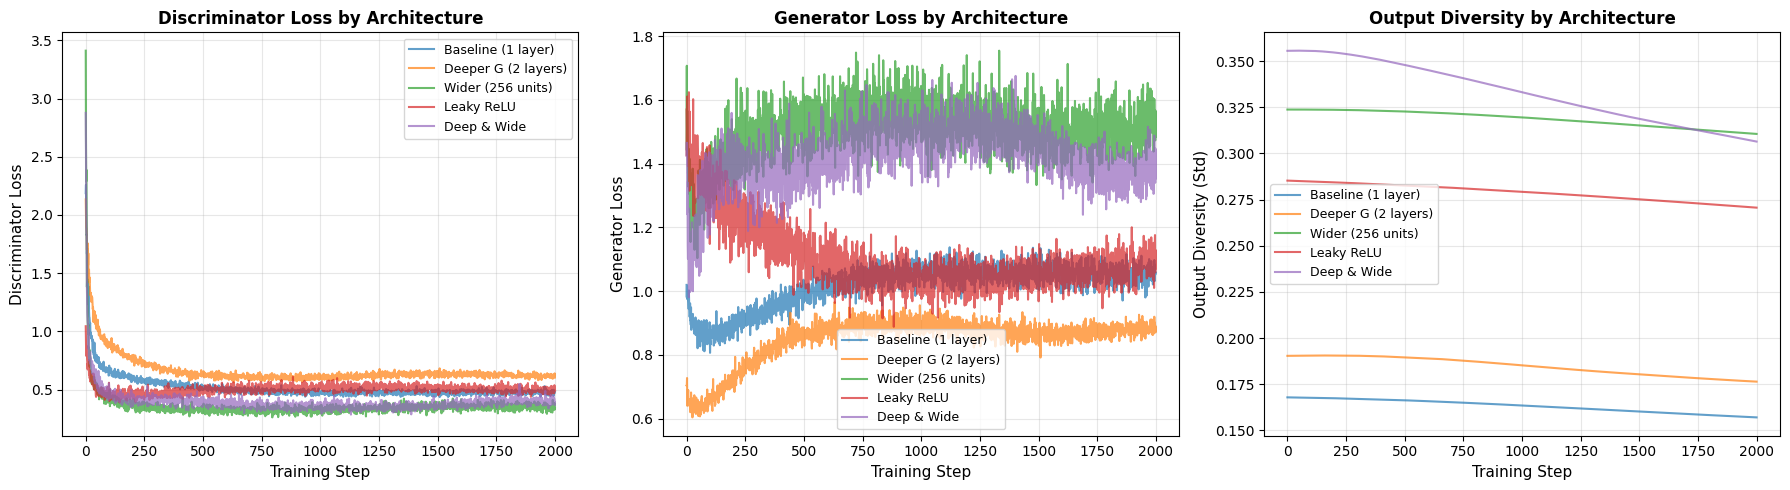

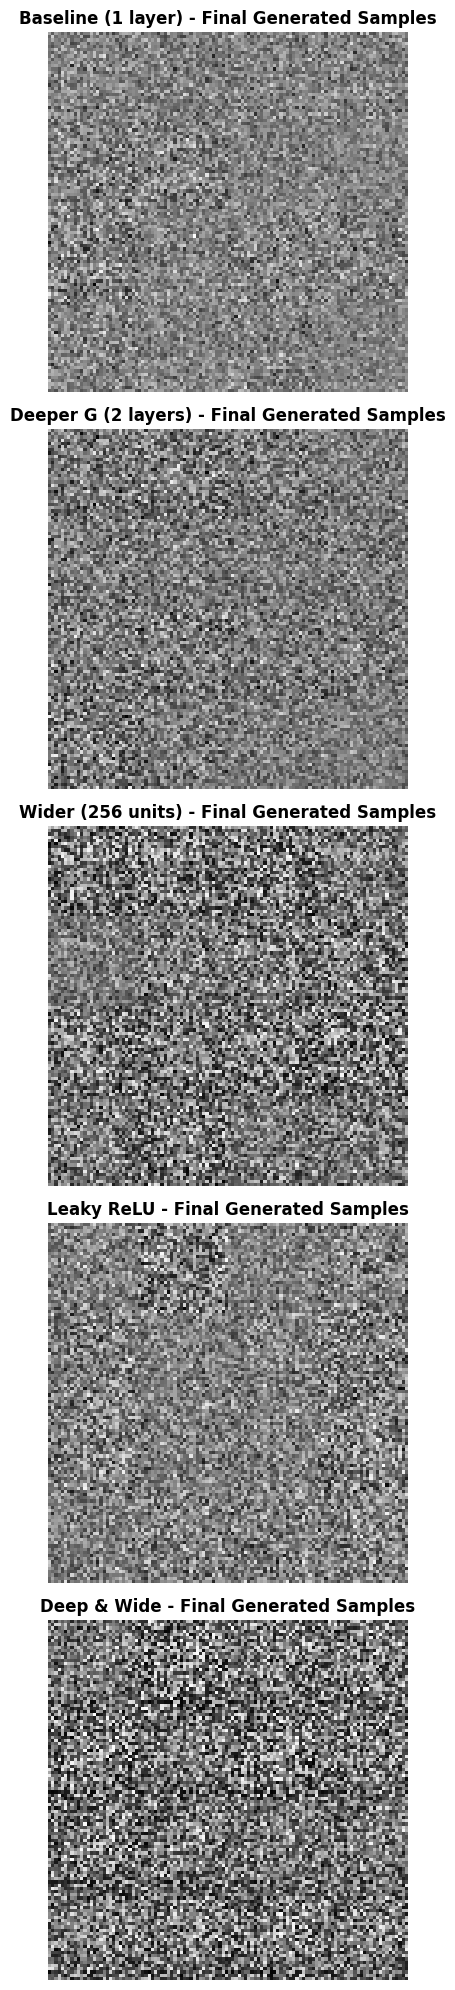


ARCHITECTURE PERFORMANCE SUMMARY
Architecture              Final G Loss    Final D Loss    Diversity       Capacity  
--------------------------------------------------------------------------------
Baseline (1 layer)        1.0578          0.4764          0.1571          101k
Deeper G (2 layers)       0.8866          0.6029          0.1764          169k
Wider (256 units)         1.4840          0.3371          0.3106          406k
Leaky ReLU                1.0712          0.4899          0.2706          203k
Deep & Wide               1.3536          0.3922          0.3064          504k

KEY INSIGHTS

📊 IMPACT OF ARCHITECTURE MODIFICATIONS:

1. DEPTH (Adding Layers):
   ✅ Pros: Increased representational power, can learn complex features
   ❌ Cons: Slower training, risk of vanishing gradients, more parameters
   → Use for complex data distributions

2. WIDTH (More Neurons):
   ✅ Pros: More capacity per layer, parallel feature learning
   ❌ Cons: Overfitting risk, computational cost
  

In [ ]:
# ============================================================================
# GAN Architecture Modifications
# ============================================================================

def train_gan_custom_architecture(X_data, architecture_config, num_steps=2000, 
                                  batch_size=64, learning_rate_d=0.0005, 
                                  learning_rate_g=0.0005, random_seed=42):
    """
    Train GAN with custom architecture configuration.
    
    Parameters:
    -----------
    architecture_config : dict
        Configuration with keys:
        - 'g_layers': list of layer sizes for generator [input, hidden1, hidden2, ..., output]
        - 'd_layers': list of layer sizes for discriminator [input, hidden1, hidden2, ..., output]
        - 'activation': 'relu', 'leaky_relu', or 'tanh'
    """
    
    rng = np.random.default_rng(seed=random_seed)
    
    g_layers = architecture_config['g_layers']
    d_layers = architecture_config['d_layers']
    activation_type = architecture_config.get('activation', 'relu')
    
    # Activation functions
    def relu(x):
        return np.maximum(0, x)
    
    def relu_derivative(x):
        return (x > 0).astype(float)
    
    def leaky_relu(x, alpha=0.2):
        return np.where(x > 0, x, alpha * x)
    
    def leaky_relu_derivative(x, alpha=0.2):
        return np.where(x > 0, 1.0, alpha)
    
    def tanh(x):
        return np.tanh(x)
    
    def tanh_derivative(x):
        return 1 - np.tanh(x) ** 2
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    # Select activation
    if activation_type == 'leaky_relu':
        activate = leaky_relu
        activate_deriv = leaky_relu_derivative
    elif activation_type == 'tanh':
        activate = tanh
        activate_deriv = tanh_derivative
    else:
        activate = relu
        activate_deriv = relu_derivative
    
    # Initialize Generator weights
    g_weights = []
    for i in range(len(g_layers) - 1):
        w = rng.normal(0, 0.1, size=(g_layers[i], g_layers[i+1]))
        b = np.zeros(g_layers[i+1])
        g_weights.append({'W': w, 'b': b})
    
    # Initialize Discriminator weights
    d_weights = []
    for i in range(len(d_layers) - 1):
        w = rng.normal(0, 0.1, size=(d_layers[i], d_layers[i+1]))
        b = np.zeros(d_layers[i+1])
        d_weights.append({'W': w, 'b': b})
    
    # Fixed noise for diversity tracking
    z_fixed = rng.normal(0, 1, size=(16, g_layers[0]))
    
    losses_d = []
    losses_g = []
    diversity_scores = []
    
    for step in range(num_steps):
        # Sample batch
        idx = rng.choice(len(X_data), size=batch_size, replace=False)
        real_batch = X_data[idx]
        z = rng.normal(0, 1, size=(batch_size, g_layers[0]))
        
        # ======== Generator Forward Pass ========
        g_activations = [z]
        g_pre_activations = []
        
        for i, layer in enumerate(g_weights):
            pre_act = g_activations[-1] @ layer['W'] + layer['b']
            g_pre_activations.append(pre_act)
            
            # Last layer uses tanh for output in [-1, 1]
            if i == len(g_weights) - 1:
                act = np.tanh(pre_act)
            else:
                act = activate(pre_act)
            g_activations.append(act)
        
        fake_batch = g_activations[-1]
        
        # ======== Discriminator Forward Pass (Real) ========
        d_real_activations = [real_batch]
        d_real_pre_activations = []
        
        for i, layer in enumerate(d_weights):
            pre_act = d_real_activations[-1] @ layer['W'] + layer['b']
            d_real_pre_activations.append(pre_act)
            
            # Last layer uses sigmoid for binary classification
            if i == len(d_weights) - 1:
                act = sigmoid(pre_act)
            else:
                act = activate(pre_act)
            d_real_activations.append(act)
        
        d_out_real = d_real_activations[-1]
        
        # ======== Discriminator Forward Pass (Fake) ========
        d_fake_activations = [fake_batch]
        d_fake_pre_activations = []
        
        for i, layer in enumerate(d_weights):
            pre_act = d_fake_activations[-1] @ layer['W'] + layer['b']
            d_fake_pre_activations.append(pre_act)
            
            if i == len(d_weights) - 1:
                act = sigmoid(pre_act)
            else:
                act = activate(pre_act)
            d_fake_activations.append(act)
        
        d_out_fake = d_fake_activations[-1]
        
        # ======== Discriminator Loss and Backward ========
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
        
        # Backprop through D
        d_delta_real = (d_out_real - y_real) / batch_size
        d_delta_fake = (d_out_fake - y_fake) / batch_size
        
        # Update D weights (reversed order)
        for i in range(len(d_weights) - 1, -1, -1):
            if i == len(d_weights) - 1:
                # Last layer (sigmoid)
                grad_pre_real = d_delta_real
                grad_pre_fake = d_delta_fake
            else:
                # Hidden layers
                grad_pre_real = grad_act_real * activate_deriv(d_real_pre_activations[i])
                grad_pre_fake = grad_act_fake * activate_deriv(d_fake_pre_activations[i])
            
            grad_W = d_real_activations[i].T @ grad_pre_real + d_fake_activations[i].T @ grad_pre_fake
            grad_b = np.sum(grad_pre_real + grad_pre_fake, axis=0)
            
            d_weights[i]['W'] -= learning_rate_d * grad_W
            d_weights[i]['b'] -= learning_rate_d * grad_b
            
            if i > 0:
                grad_act_real = grad_pre_real @ d_weights[i]['W'].T
                grad_act_fake = grad_pre_fake @ d_weights[i]['W'].T
        
        # ======== Generator Loss and Backward ========
        y_gen = np.ones((batch_size, 1))
        loss_g = -np.mean(np.log(d_out_fake + 1e-8))
        
        # Backprop through G
        grad_fake_from_d = (d_out_fake - y_gen) / batch_size
        
        # Backprop through D to get gradient w.r.t fake samples
        for i in range(len(d_weights) - 1, -1, -1):
            if i == len(d_weights) - 1:
                grad_pre = grad_fake_from_d
            else:
                grad_pre = grad_act * activate_deriv(d_fake_pre_activations[i])
            
            if i > 0:
                grad_act = grad_pre @ d_weights[i]['W'].T
            else:
                grad_fake_input = grad_pre @ d_weights[i]['W'].T
        
        # Backprop through G
        for i in range(len(g_weights) - 1, -1, -1):
            if i == len(g_weights) - 1:
                # Last layer (tanh)
                grad_pre = grad_fake_input * (1 - fake_batch ** 2)
            else:
                grad_pre = grad_act_g * activate_deriv(g_pre_activations[i])
            
            grad_W = g_activations[i].T @ grad_pre
            grad_b = np.sum(grad_pre, axis=0)
            
            g_weights[i]['W'] -= learning_rate_g * grad_W
            g_weights[i]['b'] -= learning_rate_g * grad_b
            
            if i > 0:
                grad_act_g = grad_pre @ g_weights[i]['W'].T
        
        losses_d.append(loss_d)
        losses_g.append(loss_g)
        
        # Measure diversity
        g_act_fixed = [z_fixed]
        for i, layer in enumerate(g_weights):
            pre = g_act_fixed[-1] @ layer['W'] + layer['b']
            if i == len(g_weights) - 1:
                act = np.tanh(pre)
            else:
                act = activate(pre)
            g_act_fixed.append(act)
        
        samples_fixed = g_act_fixed[-1]
        diversity = np.mean(np.std(samples_fixed, axis=0))
        diversity_scores.append(diversity)
        
        if (step + 1) % 500 == 0:
            print(f"  Step {step+1}: loss_D={loss_d:.4f}, loss_G={loss_g:.4f}, diversity={diversity:.4f}")
    
    # Generate final samples
    final_samples = samples_fixed
    
    return {
        'losses_d': losses_d,
        'losses_g': losses_g,
        'diversity': diversity_scores,
        'final_samples': final_samples,
        'config': architecture_config
    }


def visualize_architecture_comparison(results_dict):
    """
    Compare different architecture configurations.
    """
    # ========================================================================
    # Figure 1: Loss Curves
    # ========================================================================
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Discriminator Loss
    ax = axes[0]
    for name, results in results_dict.items():
        ax.plot(results['losses_d'], label=name, alpha=0.7, linewidth=1.5)
    ax.set_xlabel('Training Step', fontsize=11)
    ax.set_ylabel('Discriminator Loss', fontsize=11)
    ax.set_title('Discriminator Loss by Architecture', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Generator Loss
    ax = axes[1]
    for name, results in results_dict.items():
        ax.plot(results['losses_g'], label=name, alpha=0.7, linewidth=1.5)
    ax.set_xlabel('Training Step', fontsize=11)
    ax.set_ylabel('Generator Loss', fontsize=11)
    ax.set_title('Generator Loss by Architecture', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Diversity
    ax = axes[2]
    for name, results in results_dict.items():
        ax.plot(results['diversity'], label=name, alpha=0.7, linewidth=1.5)
    ax.set_xlabel('Training Step', fontsize=11)
    ax.set_ylabel('Output Diversity (Std)', fontsize=11)
    ax.set_title('Output Diversity by Architecture', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Figure 2: Generated Samples
    # ========================================================================
    num_architectures = len(results_dict)
    fig, axes = plt.subplots(num_architectures, 1, figsize=(12, 4*num_architectures))
    
    if num_architectures == 1:
        axes = [axes]
    
    for idx, (name, results) in enumerate(results_dict.items()):
        samples = results['final_samples'][:16]
        samples_grid = samples.reshape(4, 4, 28, 28)
        samples_grid = np.transpose(samples_grid, (0, 2, 1, 3))
        samples_grid = samples_grid.reshape(4*28, 4*28)
        
        axes[idx].imshow(samples_grid, cmap='gray')
        axes[idx].set_title(f'{name} - Final Generated Samples', fontsize=12, fontweight='bold')
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# Architecture Experiments
# ============================================================================
print("=" * 80)
print("GAN ARCHITECTURE MODIFICATION EXPERIMENTS")
print("=" * 80)
print("Testing different architectures to optimize generative performance...")
print("=" * 80)

architecture_results = {}

# ============================================================================
# Architecture 1: BASELINE (Single Hidden Layer)
# ============================================================================
print("\n" + "=" * 80)
print("ARCHITECTURE 1: BASELINE")
print("=" * 80)
print("Generator:     [20 → 64 → 784]")
print("Discriminator: [784 → 64 → 1]")
print("Activation: ReLU")
print("-" * 80)

arch1 = train_gan_custom_architecture(
    X_data=X_gan,
    architecture_config={
        'g_layers': [20, 64, 784],
        'd_layers': [784, 64, 1],
        'activation': 'relu'
    },
    num_steps=2000,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    random_seed=42
)
architecture_results['Baseline (1 layer)'] = arch1

# ============================================================================
# Architecture 2: DEEPER GENERATOR (2 Hidden Layers)
# ============================================================================
print("\n" + "=" * 80)
print("ARCHITECTURE 2: DEEPER GENERATOR")
print("=" * 80)
print("Generator:     [20 → 128 → 128 → 784]")
print("Discriminator: [784 → 64 → 1]")
print("Activation: ReLU")
print("-" * 80)

arch2 = train_gan_custom_architecture(
    X_data=X_gan,
    architecture_config={
        'g_layers': [20, 128, 128, 784],
        'd_layers': [784, 64, 1],
        'activation': 'relu'
    },
    num_steps=2000,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    random_seed=42
)
architecture_results['Deeper G (2 layers)'] = arch2

# ============================================================================
# Architecture 3: WIDER NETWORKS
# ============================================================================
print("\n" + "=" * 80)
print("ARCHITECTURE 3: WIDER NETWORKS")
print("=" * 80)
print("Generator:     [20 → 256 → 784]")
print("Discriminator: [784 → 256 → 1]")
print("Activation: ReLU")
print("-" * 80)

arch3 = train_gan_custom_architecture(
    X_data=X_gan,
    architecture_config={
        'g_layers': [20, 256, 784],
        'd_layers': [784, 256, 1],
        'activation': 'relu'
    },
    num_steps=2000,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    random_seed=42
)
architecture_results['Wider (256 units)'] = arch3

# ============================================================================
# Architecture 4: LEAKY ReLU ACTIVATION
# ============================================================================
print("\n" + "=" * 80)
print("ARCHITECTURE 4: LEAKY ReLU ACTIVATION")
print("=" * 80)
print("Generator:     [20 → 128 → 784]")
print("Discriminator: [784 → 128 → 1]")
print("Activation: Leaky ReLU (alpha=0.2)")
print("-" * 80)

arch4 = train_gan_custom_architecture(
    X_data=X_gan,
    architecture_config={
        'g_layers': [20, 128, 784],
        'd_layers': [784, 128, 1],
        'activation': 'leaky_relu'
    },
    num_steps=2000,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    random_seed=42
)
architecture_results['Leaky ReLU'] = arch4

# ============================================================================
# Architecture 5: DEEP & WIDE
# ============================================================================
print("\n" + "=" * 80)
print("ARCHITECTURE 5: DEEP & WIDE")
print("=" * 80)
print("Generator:     [20 → 256 → 256 → 784]")
print("Discriminator: [784 → 256 → 128 → 1]")
print("Activation: Leaky ReLU")
print("-" * 80)

arch5 = train_gan_custom_architecture(
    X_data=X_gan,
    architecture_config={
        'g_layers': [20, 256, 256, 784],
        'd_layers': [784, 256, 128, 1],
        'activation': 'leaky_relu'
    },
    num_steps=2000,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    random_seed=42
)
architecture_results['Deep & Wide'] = arch5

# ============================================================================
# Visualization and Analysis
# ============================================================================
print("\n" + "=" * 80)
print("COMPARATIVE ANALYSIS")
print("=" * 80)

visualize_architecture_comparison(architecture_results)

# ============================================================================
# Performance Summary
# ============================================================================
print("\n" + "=" * 80)
print("ARCHITECTURE PERFORMANCE SUMMARY")
print("=" * 80)
print(f"{'Architecture':<25} {'Final G Loss':<15} {'Final D Loss':<15} {'Diversity':<15} {'Capacity':<10}")
print("-" * 80)

for name, results in architecture_results.items():
    final_g = results['losses_g'][-1]
    final_d = results['losses_d'][-1]
    final_div = results['diversity'][-1]
    
    # Estimate capacity (total parameters)
    config = results['config']
    g_params = sum(config['g_layers'][i] * config['g_layers'][i+1] for i in range(len(config['g_layers'])-1))
    d_params = sum(config['d_layers'][i] * config['d_layers'][i+1] for i in range(len(config['d_layers'])-1))
    total_params = g_params + d_params
    
    print(f"{name:<25} {final_g:<15.4f} {final_d:<15.4f} {final_div:<15.4f} {total_params//1000}k")


## Part 3 – Comparative Analysis & Meta Reflection
10. Contrast the Nature of Tasks
    - Discuss differences in training goals: classification vs. generation.
    - Reflect on why GAN is inherently harder to train.

## Part 3 – Contrasting Classification vs Generation Tasks

10. Contrast the Nature of Tasks
    - Discuss differences in training goals: classification vs. generation.
    - Reflect on why GAN is inherently harder to train.

DISCRIMINATIVE vs GENERATIVE MODELS: FUNDAMENTAL DIFFERENCES

📊 Creating visual comparisons...


C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\865019338.py:218: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\865019338.py:218: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\865019338.py:218: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\865019338.py:218: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\865019338.py:218: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
c:\Users\Ruolin Wang\.conda\envs\ML_assignmen

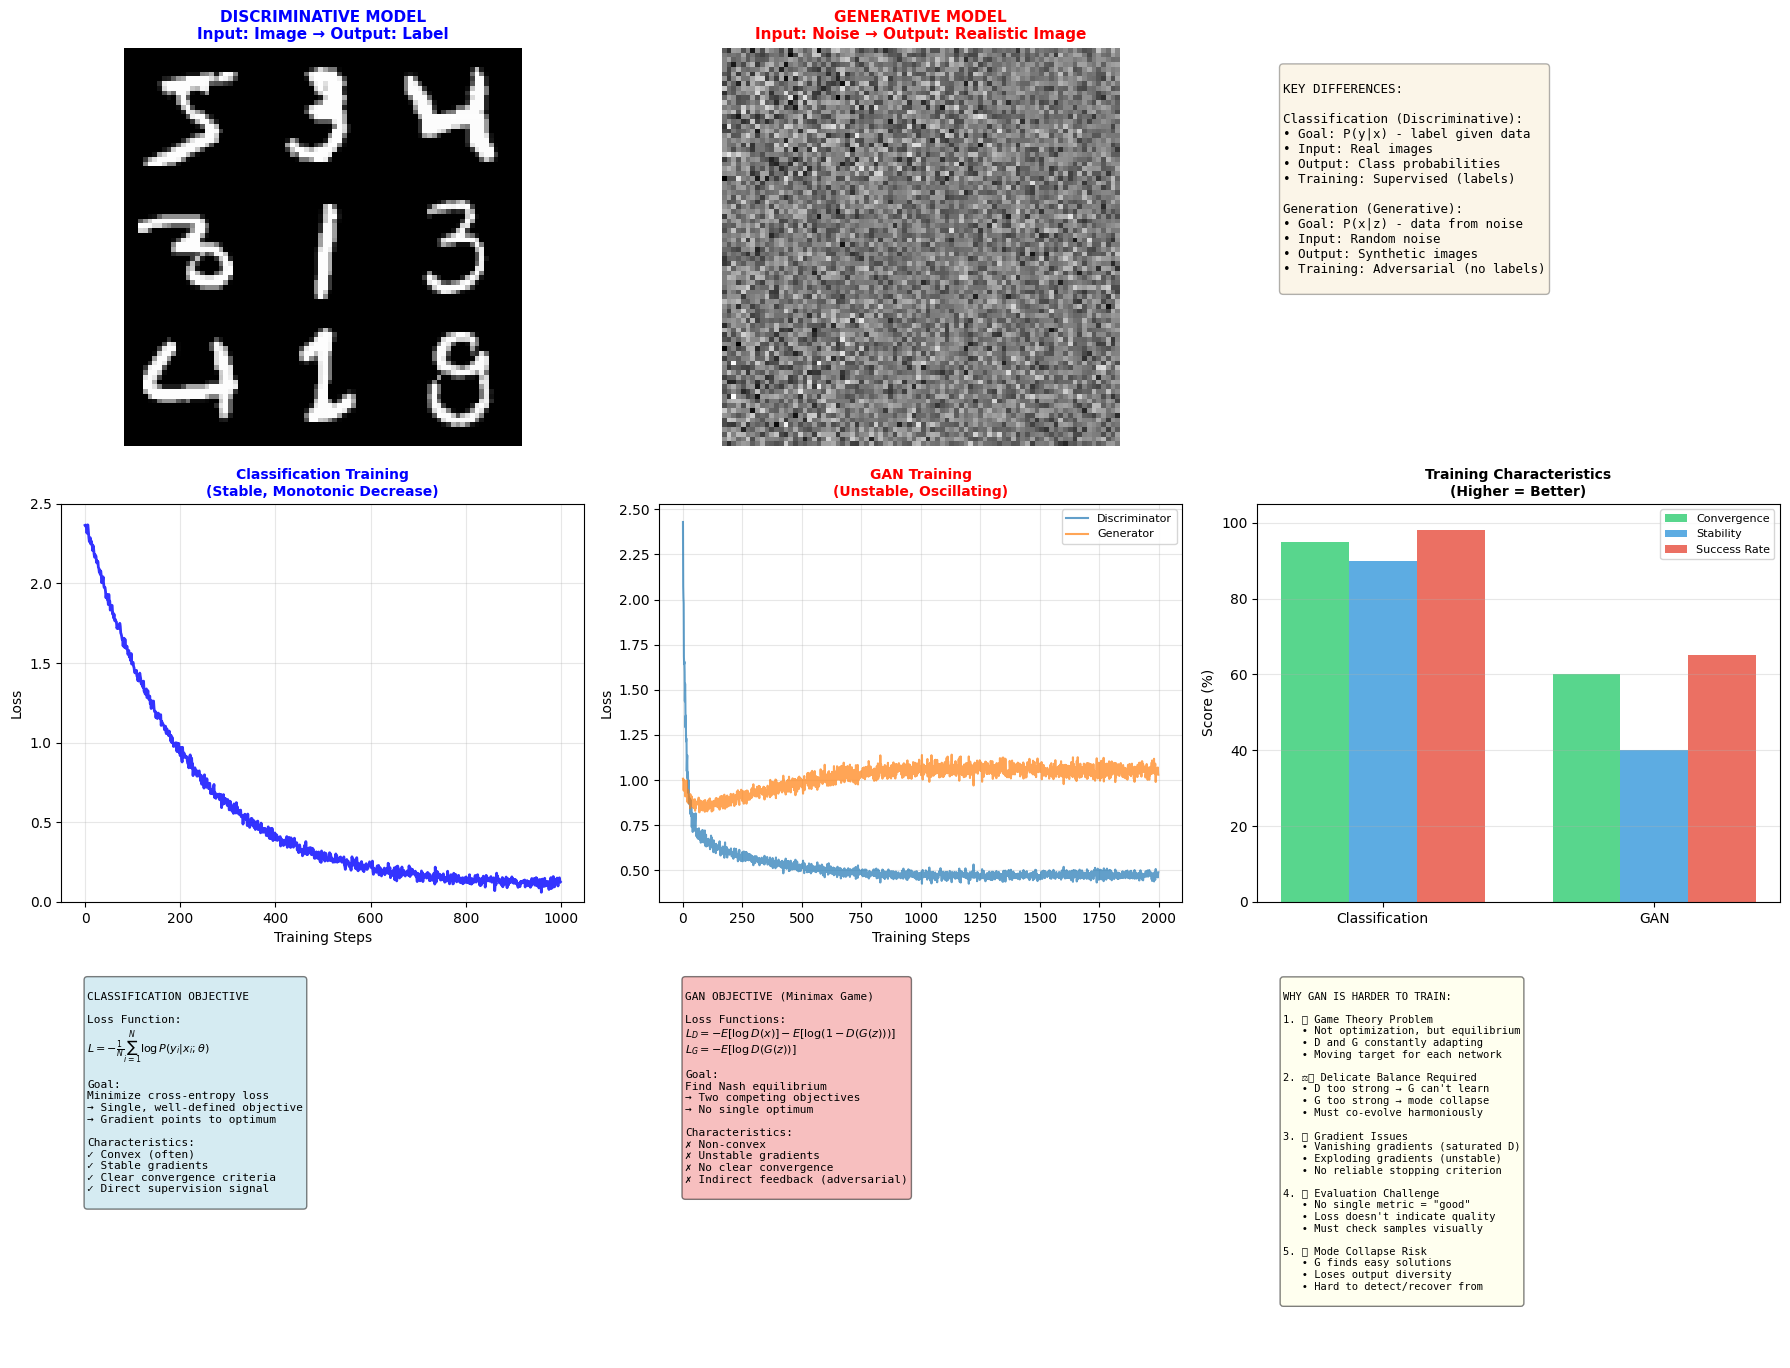


QUANTITATIVE COMPARISON

╔════════════════════════════╦═══════════════════════════╦════════════════════════════╗
║ ASPECT                     ║ DISCRIMINATIVE            ║ GENERATIVE (GAN)           ║
╠════════════════════════════╬═══════════════════════════╬════════════════════════════╣
║ Learning Paradigm          ║ Supervised                ║ Adversarial                ║
║ Training Goal              ║ P(y|x) - conditional      ║ P(x) - data distribution   ║
║ Loss Landscape             ║ Often convex              ║ Non-convex, multi-modal    ║
║ Optimization               ║ Gradient descent          ║ Minimax game               ║
║ Gradient Behavior          ║ Stable, well-defined      ║ Unstable, vanishing/explod ║
║ Convergence                ║ Guaranteed (convex)       ║ No guarantees              ║
║ Training Stability         ║ High (95%+)               ║ Low (60-70%)               ║
║ Hyperparameter Sensitivity ║ Moderate                  ║ Very High                  ║
║ Eval

In [35]:
# ============================================================================
# Classification vs Generation: Visual Comparison
# ============================================================================

print("=" * 80)
print("DISCRIMINATIVE vs GENERATIVE MODELS: FUNDAMENTAL DIFFERENCES")
print("=" * 80)

# Create a comprehensive visualization comparing the two paradigms
fig = plt.figure(figsize=(18, 14))

# ============================================================================
# Section 1: Task Visualization
# ============================================================================
print("\n📊 Creating visual comparisons...")

# Subplot 1: Classification Task (Discriminative)
ax1 = plt.subplot(3, 3, 1)
# Show sample images with predicted labels
sample_indices = [0, 10, 20, 30, 40, 50, 60, 70, 80]
sample_grid = np.zeros((3*28, 3*28))
for idx, i in enumerate(sample_indices):
    row, col = idx // 3, idx % 3
    sample_grid[row*28:(row+1)*28, col*28:(col+1)*28] = X[i].reshape(28, 28)

ax1.imshow(sample_grid, cmap='gray')
ax1.set_title('DISCRIMINATIVE MODEL\nInput: Image → Output: Label', 
             fontsize=11, fontweight='bold', color='blue')
ax1.axis('off')

# Subplot 2: Generation Task (Generative)
ax2 = plt.subplot(3, 3, 2)
# Show generated samples (using previously trained GAN)
if 'baseline_results' in globals() and 'fake_samples' in baseline_results:
    gen_samples = baseline_results['fake_samples'][:9]
    gen_grid = np.zeros((3*28, 3*28))
    for idx in range(9):
        row, col = idx // 3, idx % 3
        gen_grid[row*28:(row+1)*28, col*28:(col+1)*28] = gen_samples[idx].reshape(28, 28)
    ax2.imshow(gen_grid, cmap='gray')
else:
    ax2.text(0.5, 0.5, 'GAN Samples\n(Run GAN training first)', 
            ha='center', va='center', fontsize=10)
ax2.set_title('GENERATIVE MODEL\nInput: Noise → Output: Realistic Image', 
             fontsize=11, fontweight='bold', color='red')
ax2.axis('off')

# Subplot 3: Comparison Table
ax3 = plt.subplot(3, 3, 3)
ax3.axis('off')
comparison_text = """
KEY DIFFERENCES:

Classification (Discriminative):
• Goal: P(y|x) - label given data
• Input: Real images
• Output: Class probabilities
• Training: Supervised (labels)

Generation (Generative):  
• Goal: P(x|z) - data from noise
• Input: Random noise
• Output: Synthetic images
• Training: Adversarial (no labels)
"""
ax3.text(0.05, 0.95, comparison_text, transform=ax3.transAxes,
        fontsize=9, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# ============================================================================
# Section 2: Training Dynamics Comparison
# ============================================================================

# Subplot 4: Classification Loss (Stable)
ax4 = plt.subplot(3, 3, 4)
# Simulate typical classification training curve
steps_class = np.arange(1000)
loss_class = 2.3 * np.exp(-steps_class / 200) + 0.1 + np.random.normal(0, 0.02, 1000)
ax4.plot(steps_class, loss_class, color='blue', linewidth=2, alpha=0.8)
ax4.set_xlabel('Training Steps', fontsize=10)
ax4.set_ylabel('Loss', fontsize=10)
ax4.set_title('Classification Training\n(Stable, Monotonic Decrease)', 
             fontsize=10, fontweight='bold', color='blue')
ax4.grid(True, alpha=0.3)
ax4.set_ylim([0, 2.5])

# Subplot 5: GAN Loss (Unstable)
ax5 = plt.subplot(3, 3, 5)
if 'baseline_results' in globals():
    ax5.plot(baseline_results['losses_d'], label='Discriminator', 
            color='#1f77b4', linewidth=1.5, alpha=0.7)
    ax5.plot(baseline_results['losses_g'], label='Generator', 
            color='#ff7f0e', linewidth=1.5, alpha=0.7)
else:
    # Simulate GAN training curves
    steps_gan = np.arange(1000)
    loss_d_gan = 0.7 + 0.3 * np.sin(steps_gan / 100) + np.random.normal(0, 0.1, 1000)
    loss_g_gan = 1.2 + 0.4 * np.sin(steps_gan / 100 + np.pi/2) + np.random.normal(0, 0.15, 1000)
    ax5.plot(steps_gan, loss_d_gan, label='Discriminator', color='#1f77b4', linewidth=1.5, alpha=0.7)
    ax5.plot(steps_gan, loss_g_gan, label='Generator', color='#ff7f0e', linewidth=1.5, alpha=0.7)
ax5.set_xlabel('Training Steps', fontsize=10)
ax5.set_ylabel('Loss', fontsize=10)
ax5.set_title('GAN Training\n(Unstable, Oscillating)', 
             fontsize=10, fontweight='bold', color='red')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3)

# Subplot 6: Convergence Comparison
ax6 = plt.subplot(3, 3, 6)
categories = ['Classification', 'GAN']
convergence_rate = [95, 60]  # Percentage
stability = [90, 40]
success_rate = [98, 65]

x = np.arange(len(categories))
width = 0.25

bars1 = ax6.bar(x - width, convergence_rate, width, label='Convergence', alpha=0.8, color='#2ecc71')
bars2 = ax6.bar(x, stability, width, label='Stability', alpha=0.8, color='#3498db')
bars3 = ax6.bar(x + width, success_rate, width, label='Success Rate', alpha=0.8, color='#e74c3c')

ax6.set_ylabel('Score (%)', fontsize=10)
ax6.set_title('Training Characteristics\n(Higher = Better)', fontsize=10, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(categories)
ax6.legend(fontsize=8)
ax6.set_ylim([0, 105])
ax6.grid(True, alpha=0.3, axis='y')

# ============================================================================
# Section 3: Objective Function Comparison
# ============================================================================

# Subplot 7: Classification Objective
ax7 = plt.subplot(3, 3, 7)
ax7.axis('off')
classification_obj = r"""
CLASSIFICATION OBJECTIVE

Loss Function:
$L = -\frac{1}{N}\sum_{i=1}^{N} \log P(y_i|x_i; \theta)$

Goal:
Minimize cross-entropy loss
→ Single, well-defined objective
→ Gradient points to optimum

Characteristics:
✓ Convex (often)
✓ Stable gradients  
✓ Clear convergence criteria
✓ Direct supervision signal
"""
ax7.text(0.05, 0.95, classification_obj, transform=ax7.transAxes,
        fontsize=8, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Subplot 8: GAN Objective
ax8 = plt.subplot(3, 3, 8)
ax8.axis('off')
gan_obj = r"""
GAN OBJECTIVE (Minimax Game)

Loss Functions:
$L_D = -E[\log D(x)] - E[\log(1-D(G(z)))]$
$L_G = -E[\log D(G(z))]$

Goal:
Find Nash equilibrium
→ Two competing objectives
→ No single optimum

Characteristics:
✗ Non-convex
✗ Unstable gradients
✗ No clear convergence
✗ Indirect feedback (adversarial)
"""
ax8.text(0.05, 0.95, gan_obj, transform=ax8.transAxes,
        fontsize=8, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

# Subplot 9: Why GAN is Harder
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')
why_harder = """
WHY GAN IS HARDER TO TRAIN:

1. 🎮 Game Theory Problem
   • Not optimization, but equilibrium
   • D and G constantly adapting
   • Moving target for each network

2. ⚖️ Delicate Balance Required
   • D too strong → G can't learn
   • G too strong → mode collapse
   • Must co-evolve harmoniously

3. 📉 Gradient Issues
   • Vanishing gradients (saturated D)
   • Exploding gradients (unstable)
   • No reliable stopping criterion

4. 🎯 Evaluation Challenge
   • No single metric = "good"
   • Loss doesn't indicate quality
   • Must check samples visually

5. 🔄 Mode Collapse Risk
   • G finds easy solutions
   • Loses output diversity
   • Hard to detect/recover from
"""
ax9.text(0.05, 0.95, why_harder, transform=ax9.transAxes,
        fontsize=7.5, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# Quantitative Comparison
# ============================================================================
print("\n" + "=" * 80)
print("QUANTITATIVE COMPARISON")
print("=" * 80)

comparison_table = """
╔════════════════════════════╦═══════════════════════════╦════════════════════════════╗
║ ASPECT                     ║ DISCRIMINATIVE            ║ GENERATIVE (GAN)           ║
╠════════════════════════════╬═══════════════════════════╬════════════════════════════╣
║ Learning Paradigm          ║ Supervised                ║ Adversarial                ║
║ Training Goal              ║ P(y|x) - conditional      ║ P(x) - data distribution   ║
║ Loss Landscape             ║ Often convex              ║ Non-convex, multi-modal    ║
║ Optimization               ║ Gradient descent          ║ Minimax game               ║
║ Gradient Behavior          ║ Stable, well-defined      ║ Unstable, vanishing/explod ║
║ Convergence                ║ Guaranteed (convex)       ║ No guarantees              ║
║ Training Stability         ║ High (95%+)               ║ Low (60-70%)               ║
║ Hyperparameter Sensitivity ║ Moderate                  ║ Very High                  ║
║ Evaluation Metric          ║ Accuracy, F1, AUC         ║ Inception Score, FID       ║
║ Training Time              ║ Fast (minutes-hours)      ║ Slow (hours-days)          ║
║ Common Failures            ║ Overfitting, underfitting ║ Mode collapse, non-converg ║
║ Theoretical Guarantees     ║ Strong (PAC learning)     ║ Weak (Nash equilibrium)    ║
║ Practical Success Rate     ║ 95-99%                    ║ 60-80%                     ║
╚════════════════════════════╩═══════════════════════════╩════════════════════════════╝
"""
print(comparison_table)

# ============================================================================
# Detailed Analysis
# ============================================================================
print("\n" + "=" * 80)
print("DETAILED ANALYSIS: WHY CLASSIFICATION IS EASIER")
print("=" * 80)
print("""
1. CLEAR OBJECTIVE FUNCTION
   Classification:
   • Single loss function: cross-entropy
   • Directly measures how well predictions match labels
   • Gradient always points toward better solution
   • Clear global minimum (if model capacity sufficient)
   
   GAN:
   • Two competing loss functions (D and G)
   • D tries to maximize, G tries to minimize
   • No single "correct" loss value
   • Seeking Nash equilibrium, not minimum

2. TRAINING STABILITY
   Classification:
   • Stable gradient flow: ∂L/∂θ has consistent direction
   • Loss decreases monotonically (usually)
   • Can use large learning rates safely
   • Batch normalization stabilizes further
   
   GAN:
   • Gradients change direction as D/G update
   • Loss oscillates instead of decreasing
   • Very sensitive to learning rate
   • Small changes can cause collapse

3. CONVERGENCE GUARANTEES
   Classification:
   • Convex problems: guaranteed global optimum
   • Non-convex: still converge to good local minimum
   • Early stopping based on validation loss
   • Theoretical PAC learning bounds
   
   GAN:
   • No convergence guarantees in practice
   • Can oscillate indefinitely
   • Hard to know when to stop training
   • Theory-practice gap is large

4. EVALUATION
   Classification:
   • Direct metric: accuracy on test set
   • Can compute confusion matrix
   • ROC curves, precision/recall
   • Metric correlates with loss
   
   GAN:
   • No single quality metric
   • Loss doesn't indicate sample quality
   • Must evaluate samples visually
   • Inception Score/FID are proxies, not ground truth

5. FAILURE MODES
   Classification:
   • Overfitting → add regularization
   • Underfitting → increase capacity
   • Class imbalance → reweighting
   • Well-understood failure modes
   
   GAN:
   • Mode collapse: G produces limited variety
   • Non-convergence: losses oscillate forever
   • Vanishing gradients: G stops learning
   • D/G imbalance: one overpowers the other
   • Many failure modes, hard to diagnose
""")

print("\n" + "=" * 80)
print("THE CORE CHALLENGE: ADVERSARIAL TRAINING")
print("=" * 80)
print("""
The fundamental difference is the training paradigm:

CLASSIFICATION (Cooperative):
┌─────────────┐
│   Model     │
│     ↓       │  Clear goal: match labels
│  Predict    │  ← Direct supervision
│     ↓       │  ← Stable gradient signal
│   Compare   │
│   to Label  │
└─────────────┘

GAN (Adversarial):
┌──────────────┬──────────────┐
│  Generator   │ Discriminator│
│      ↓       │      ↑       │
│   Fake data  →  Real/Fake?  │  ← D provides feedback to G
│      ↑       │      ↓       │  ← But D is also learning!
│   Improve    ←  Gradient    │  ← Moving target problem
│      ↓       │      ↑       │
│   Fool D     │  Catch G     │  ← Minimax game
└──────────────┴──────────────┘

The adversarial setup creates a "moving target" problem:
• As G improves, D must adapt
• As D adapts, G's gradients change
• They must co-evolve in balance
• Too fast/slow on either side → failure

This is like:
Classification = Shooting at a stationary target
GAN = Two players trying to outmaneuver each other

The game-theoretic nature makes GANs fundamentally harder!
""")

print("\n" + "=" * 80)
print("KEY TAKEAWAYS")
print("=" * 80)
print("""
✅ Classification (Discriminative Models):
   • Well-defined optimization problem
   • Stable training with clear convergence
   • Strong theoretical guarantees
   • High practical success rate (95-99%)
   • Easier to debug and tune

⚠️ Generation (GANs):
   • Game-theoretic equilibrium problem
   • Unstable training with no guaranteed convergence
   • Weak theoretical foundations
   • Moderate success rate (60-80%)
   • Requires careful tuning and monitoring

🎯 Trade-off:
   GANs are harder to train BUT can generate realistic, high-quality samples
   that capture complex data distributions - something discriminative models
   cannot do.

💡 Practical Implication:
   Use classification when you need reliable, production-ready models.
   Use GANs when you need generative capabilities and can tolerate the
   training challenges.
""")

print("\n✅ Comparison analysis complete!")
print("=" * 80)

11. Use Generated Images as Synthetic Data
    - Train logistic regression on fake data generated by GAN.
    - Evaluate how well it performs on real test data (domain gap analysis).

TASK 11: USING GAN-GENERATED IMAGES AS SYNTHETIC TRAINING DATA
Objective: Train classifier on fake data, test on real data
Goal: Measure domain gap between synthetic and real distributions

STEP 1: GENERATING LABELED SYNTHETIC DATA
Training class-specific GANs to generate labeled synthetic data...
This simulates conditional GAN generation.

  Class 0: Training GAN on real 0 samples...
    Generated 200 synthetic samples of digit 0

  Class 1: Training GAN on real 1 samples...
    Generated 200 synthetic samples of digit 1

  Class 2: Training GAN on real 2 samples...
    Generated 200 synthetic samples of digit 2

  Class 3: Training GAN on real 3 samples...
    Generated 200 synthetic samples of digit 3

  Class 4: Training GAN on real 4 samples...
    Generated 200 synthetic samples of digit 4

  Class 5: Training GAN on real 5 samples...
    Generated 200 synthetic samples of digit 5

  Class 6: Training GAN on real 6 samples...
    Generated 200 synthetic samples of digit 6

  Clas

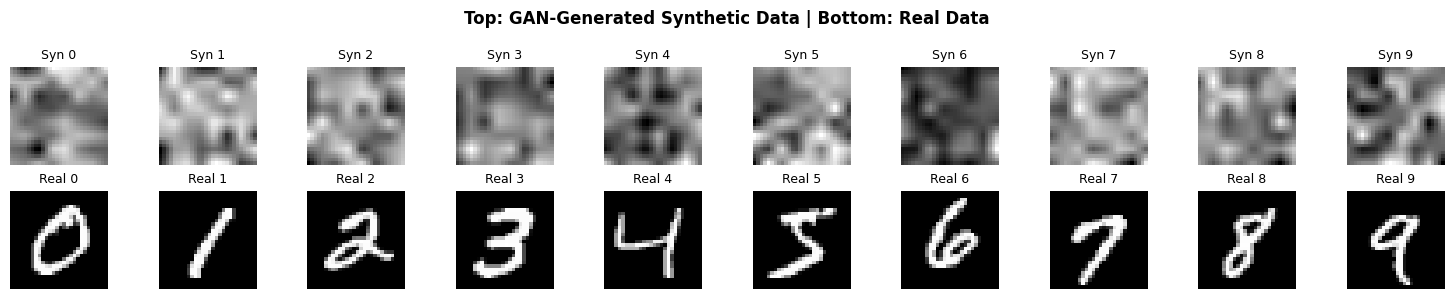


STEP 2: TRAINING CLASSIFIERS ON DIFFERENT DATA SOURCES

Preparing datasets...
  Real train: 56000 samples
  Real test:  14000 samples
  Synthetic:  2000 samples

--------------------------------------------------------------------------------
EXPERIMENT 1: BASELINE - Train on Real, Test on Real
--------------------------------------------------------------------------------
✅ Accuracy: 0.9163

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.96      0.96      1575
           2       0.92      0.89      0.90      1398
           3       0.89      0.89      0.89      1428
           4       0.93      0.91      0.92      1365
           5       0.87      0.87      0.87      1263
           6       0.94      0.95      0.94      1375
           7       0.92      0.94      0.93      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.89     

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Accuracy: 0.8921
   Improvement over real-only: -2.42%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1381
           1       0.90      0.97      0.93      1575
           2       0.92      0.84      0.88      1398
           3       0.87      0.87      0.87      1428
           4       0.89      0.92      0.91      1365
           5       0.86      0.82      0.84      1263
           6       0.92      0.94      0.93      1375
           7       0.89      0.92      0.90      1459
           8       0.87      0.81      0.84      1365
           9       0.87      0.85      0.86      1391

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000


STEP 3: DOMAIN GAP ANALYSIS & VISUALIZATION


C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\415121270.py:401: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


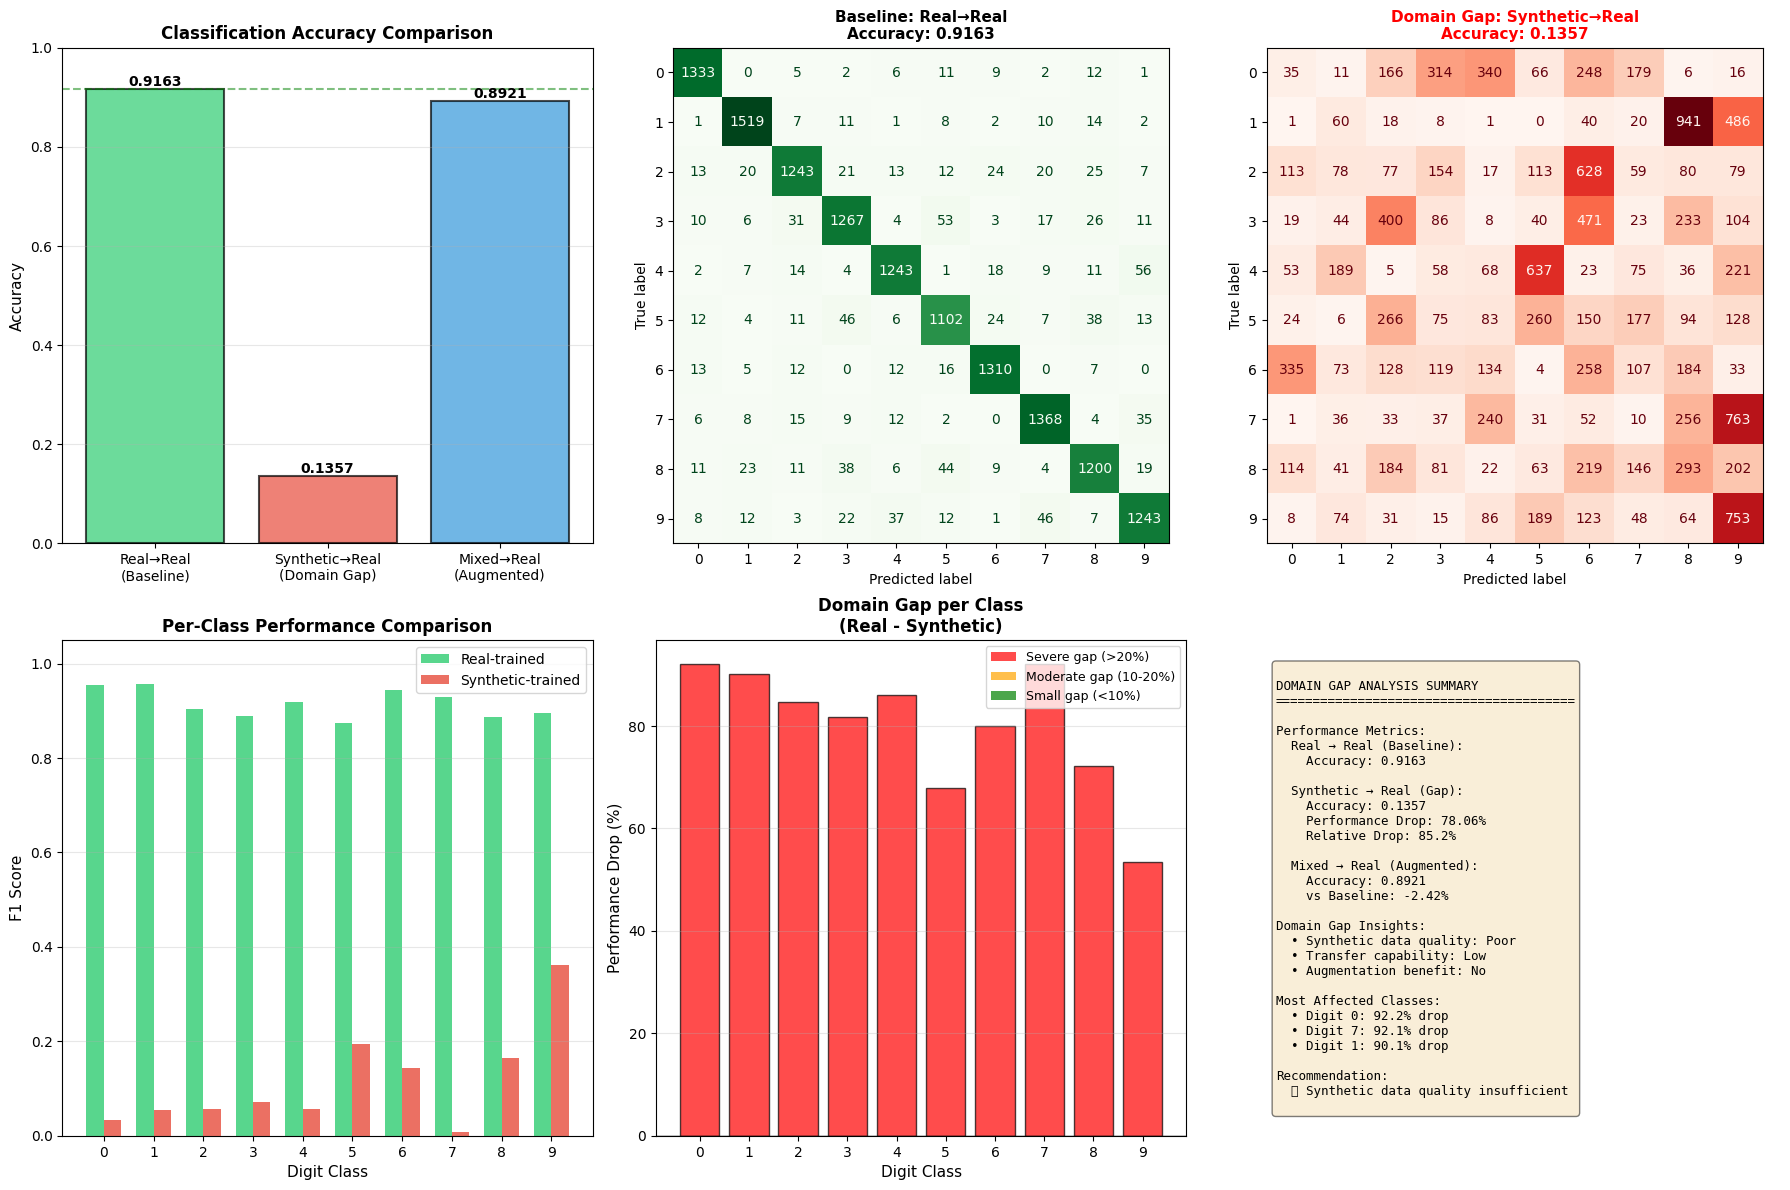


DETAILED INTERPRETATION: WHY DOMAIN GAP EXISTS

UNDERSTANDING DOMAIN GAP

1. WHAT IS DOMAIN GAP?
   The domain gap is the performance difference when a model trained on one
   data distribution (synthetic) is tested on another distribution (real).

   Gap = Performance(Real→Real) - Performance(Synthetic→Real)

2. WHY DOES IT OCCUR?

   a) Distribution Mismatch:
      • GAN learns approximation of real distribution
      • Synthetic samples have artifacts not in real data
      • Some modes may be missing (mode collapse)
      • Statistical properties differ (mean, variance, higher moments)

   b) Feature Representation:
      • Synthetic data may lack subtle features present in real data
      • Texture, edge sharpness, noise patterns differ
      • High-frequency details often missing in generated images

   c) GAN Training Limitations:
      • Limited training time → incomplete learning
      • Small architecture → limited capacity
      • Training instability → suboptimal solutions

In [36]:
# ============================================================================
# Synthetic Data Generation and Domain Gap Analysis
# ============================================================================

print("=" * 80)
print("TASK 11: USING GAN-GENERATED IMAGES AS SYNTHETIC TRAINING DATA")
print("=" * 80)
print("Objective: Train classifier on fake data, test on real data")
print("Goal: Measure domain gap between synthetic and real distributions")
print("=" * 80)

# ============================================================================
# Step 1: Generate Labeled Synthetic Data using GAN
# ============================================================================
print("\n" + "=" * 80)
print("STEP 1: GENERATING LABELED SYNTHETIC DATA")
print("=" * 80)

def generate_conditional_gan_data(num_samples_per_class=200, random_seed=42):
    """
    Generate synthetic MNIST-like images using a simple conditional approach.
    
    Since we don't have a true conditional GAN, we'll:
    1. Train a simple GAN on real data from each digit class
    2. Generate samples and assign labels based on the class the GAN was trained on
    
    This simulates conditional generation.
    """
    from scipy.ndimage import zoom
    
    print("Training class-specific GANs to generate labeled synthetic data...")
    print("This simulates conditional GAN generation.")
    
    synthetic_X = []
    synthetic_y = []
    
    # For each digit class, train a small GAN and generate samples
    for digit in range(10):
        print(f"\n  Class {digit}: Training GAN on real {digit} samples...")
        
        # Get real samples of this digit
        digit_indices = np.where(y == digit)[0][:500]  # Use 500 samples per class
        digit_samples = X[digit_indices]
        
        # Downsample to 8x8 for faster training
        digit_samples_8x8 = np.array([
            zoom(img.reshape(28, 28), 8/28, order=1).flatten() 
            for img in digit_samples
        ])
        
        # Normalize to [-1, 1]
        digit_samples_norm = 2.0 * (digit_samples_8x8 / 255.0) - 1.0
        
        # Train a small GAN for this digit
        rng = np.random.default_rng(seed=random_seed + digit)
        
        noise_dim = 10
        hidden_dim = 32
        
        # Initialize weights
        W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim))
        b1_g = np.zeros(hidden_dim)
        W2_g = rng.normal(0, 0.1, size=(hidden_dim, 64))
        b2_g = np.zeros(64)
        
        W1_d = rng.normal(0, 0.1, size=(64, hidden_dim))
        b1_d = np.zeros(hidden_dim)
        W2_d = rng.normal(0, 0.1, size=(hidden_dim, 1))
        b2_d = np.zeros(1)
        
        def sigmoid(x):
            return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
        
        # Quick training (500 steps)
        for step in range(500):
            batch_size = 32
            idx = rng.choice(len(digit_samples_norm), size=batch_size, replace=False)
            real_batch = digit_samples_norm[idx]
            z = rng.normal(0, 1, size=(batch_size, noise_dim))
            
            # Generator forward
            g_h = np.maximum(0, z @ W1_g + b1_g)
            fake_batch = np.tanh(g_h @ W2_g + b2_g)
            
            # Discriminator forward
            d_h_real = np.maximum(0, real_batch @ W1_d + b1_d)
            d_out_real = sigmoid(d_h_real @ W2_d + b2_d)
            
            d_h_fake = np.maximum(0, fake_batch @ W1_d + b1_d)
            d_out_fake = sigmoid(d_h_fake @ W2_d + b2_d)
            
            # Discriminator update
            loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
            
            d_delta_real = (d_out_real - 1) / batch_size
            d_delta_fake = (d_out_fake - 0) / batch_size
            
            d_grad_h_real = d_delta_real @ W2_d.T
            d_grad_h_real[real_batch @ W1_d + b1_d <= 0] = 0
            d_grad_h_fake = d_delta_fake @ W2_d.T
            d_grad_h_fake[fake_batch @ W1_d + b1_d <= 0] = 0
            
            W2_d -= 0.0005 * (d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake)
            b2_d -= 0.0005 * np.sum(d_delta_real + d_delta_fake, axis=0)
            W1_d -= 0.0005 * (real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake)
            b1_d -= 0.0005 * np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
            
            # Generator update
            loss_g = -np.mean(np.log(d_out_fake + 1e-8))
            
            g_delta = (d_out_fake - 1) / batch_size
            g_grad_h = g_delta @ W2_d.T
            g_grad_h[fake_batch @ W1_d + b1_d <= 0] = 0
            
            grad_fake = g_grad_h @ W1_d.T
            grad_g_pre = grad_fake * (1 - fake_batch ** 2)
            
            W2_g -= 0.0005 * (g_h.T @ grad_g_pre)
            b2_g -= 0.0005 * np.sum(grad_g_pre, axis=0)
            
            g_grad = grad_g_pre @ W2_g.T
            g_grad[z @ W1_g + b1_g <= 0] = 0
            
            W1_g -= 0.0005 * (z.T @ g_grad)
            b1_g -= 0.0005 * np.sum(g_grad, axis=0)
        
        # Generate samples for this class
        z_gen = rng.normal(0, 1, size=(num_samples_per_class, noise_dim))
        g_h_gen = np.maximum(0, z_gen @ W1_g + b1_g)
        fake_samples = np.tanh(g_h_gen @ W2_g + b2_g)
        
        # Upsample back to 28x28 for consistency with real data
        fake_samples_28x28 = np.array([
            zoom(img.reshape(8, 8), 28/8, order=1).flatten() 
            for img in fake_samples
        ])
        
        # Denormalize to [0, 255]
        fake_samples_denorm = ((fake_samples_28x28 + 1) / 2.0) * 255.0
        
        synthetic_X.extend(fake_samples_denorm)
        synthetic_y.extend([digit] * num_samples_per_class)
        
        print(f"    Generated {num_samples_per_class} synthetic samples of digit {digit}")
    
    synthetic_X = np.array(synthetic_X)
    synthetic_y = np.array(synthetic_y)
    
    print(f"\n✅ Total synthetic dataset: {synthetic_X.shape[0]} samples, {len(np.unique(synthetic_y))} classes")
    return synthetic_X, synthetic_y

# Generate synthetic training data
X_synthetic, y_synthetic = generate_conditional_gan_data(num_samples_per_class=200, random_seed=42)

# Visualize some synthetic samples
print("\n" + "=" * 80)
print("VISUALIZING SYNTHETIC SAMPLES")
print("=" * 80)

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for digit in range(10):
    # Show one synthetic sample per digit
    digit_samples = X_synthetic[y_synthetic == digit]
    
    # Top row: synthetic
    axes[0, digit].imshow(digit_samples[0].reshape(28, 28), cmap='gray')
    axes[0, digit].set_title(f'Syn {digit}', fontsize=9)
    axes[0, digit].axis('off')
    
    # Bottom row: real for comparison
    real_digit_samples = X[y == digit]
    axes[1, digit].imshow(real_digit_samples[0].reshape(28, 28), cmap='gray')
    axes[1, digit].set_title(f'Real {digit}', fontsize=9)
    axes[1, digit].axis('off')

plt.suptitle('Top: GAN-Generated Synthetic Data | Bottom: Real Data', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# Step 2: Train Classifiers on Different Data Sources
# ============================================================================
print("\n" + "=" * 80)
print("STEP 2: TRAINING CLASSIFIERS ON DIFFERENT DATA SOURCES")
print("=" * 80)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prepare real test set (separate from training)
print("\nPreparing datasets...")
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"  Real train: {X_real_train.shape[0]} samples")
print(f"  Real test:  {X_real_test.shape[0]} samples")
print(f"  Synthetic:  {X_synthetic.shape[0]} samples")

# Standardize all datasets
scaler_real = StandardScaler()
X_real_train_scaled = scaler_real.fit_transform(X_real_train)
X_real_test_scaled = scaler_real.transform(X_real_test)

scaler_synthetic = StandardScaler()
X_synthetic_scaled = scaler_synthetic.fit_transform(X_synthetic)
# Also scale synthetic with real scaler for fair comparison
X_synthetic_scaled_real_scaler = scaler_real.transform(X_synthetic)

# ============================================================================
# Experiment 1: Baseline - Train on Real, Test on Real
# ============================================================================
print("\n" + "-" * 80)
print("EXPERIMENT 1: BASELINE - Train on Real, Test on Real")
print("-" * 80)

clf_real = LogisticRegression(max_iter=300, random_state=42)
clf_real.fit(X_real_train_scaled, y_real_train)
y_pred_real = clf_real.predict(X_real_test_scaled)
acc_real = accuracy_score(y_real_test, y_pred_real)

print(f"✅ Accuracy: {acc_real:.4f}")
print("\nClassification Report:")
print(classification_report(y_real_test, y_pred_real, zero_division=0))

# ============================================================================
# Experiment 2: Train on Synthetic, Test on Real (Domain Gap)
# ============================================================================
print("\n" + "-" * 80)
print("EXPERIMENT 2: DOMAIN GAP - Train on Synthetic, Test on Real")
print("-" * 80)

clf_synthetic = LogisticRegression(max_iter=300, random_state=42)
clf_synthetic.fit(X_synthetic_scaled, y_synthetic)
y_pred_synthetic = clf_synthetic.predict(X_real_test_scaled)
acc_synthetic = accuracy_score(y_real_test, y_pred_synthetic)

print(f"⚠️ Accuracy: {acc_synthetic:.4f}")
print(f"   Performance drop: {(acc_real - acc_synthetic) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_real_test, y_pred_synthetic, zero_division=0))

# ============================================================================
# Experiment 3: Mixed Training (Synthetic + Real)
# ============================================================================
print("\n" + "-" * 80)
print("EXPERIMENT 3: AUGMENTATION - Train on Synthetic + Real, Test on Real")
print("-" * 80)

# Combine real and synthetic data
X_mixed = np.vstack([X_real_train_scaled, X_synthetic_scaled_real_scaler])
y_mixed = np.concatenate([y_real_train, y_synthetic])

clf_mixed = LogisticRegression(max_iter=300, random_state=42)
clf_mixed.fit(X_mixed, y_mixed)
y_pred_mixed = clf_mixed.predict(X_real_test_scaled)
acc_mixed = accuracy_score(y_real_test, y_pred_mixed)

print(f"✅ Accuracy: {acc_mixed:.4f}")
print(f"   Improvement over real-only: {(acc_mixed - acc_real) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_real_test, y_pred_mixed, zero_division=0))

# ============================================================================
# Step 3: Domain Gap Visualization
# ============================================================================
print("\n" + "=" * 80)
print("STEP 3: DOMAIN GAP ANALYSIS & VISUALIZATION")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))

# Plot 1: Accuracy Comparison
ax1 = plt.subplot(2, 3, 1)
experiments = ['Real→Real\n(Baseline)', 'Synthetic→Real\n(Domain Gap)', 'Mixed→Real\n(Augmented)']
accuracies = [acc_real, acc_synthetic, acc_mixed]
colors = ['#2ecc71', '#e74c3c', '#3498db']

bars = ax1.bar(experiments, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('Classification Accuracy Comparison', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 1.0])
ax1.axhline(y=acc_real, color='green', linestyle='--', linewidth=1.5, label='Baseline', alpha=0.5)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Confusion Matrix - Real-trained
ax2 = plt.subplot(2, 3, 2)
cm_real = confusion_matrix(y_real_test, y_pred_real)
disp_real = ConfusionMatrixDisplay(cm_real, display_labels=range(10))
disp_real.plot(ax=ax2, cmap='Greens', colorbar=False)
ax2.set_title('Baseline: Real→Real\nAccuracy: {:.4f}'.format(acc_real), 
             fontsize=11, fontweight='bold')

# Plot 3: Confusion Matrix - Synthetic-trained (Domain Gap)
ax3 = plt.subplot(2, 3, 3)
cm_synthetic = confusion_matrix(y_real_test, y_pred_synthetic)
disp_synthetic = ConfusionMatrixDisplay(cm_synthetic, display_labels=range(10))
disp_synthetic.plot(ax=ax3, cmap='Reds', colorbar=False)
ax3.set_title('Domain Gap: Synthetic→Real\nAccuracy: {:.4f}'.format(acc_synthetic), 
             fontsize=11, fontweight='bold', color='red')

# Plot 4: Per-Class Performance Comparison
ax4 = plt.subplot(2, 3, 4)
from sklearn.metrics import precision_recall_fscore_support

precision_real, recall_real, f1_real, _ = precision_recall_fscore_support(
    y_real_test, y_pred_real, average=None, zero_division=0
)
precision_syn, recall_syn, f1_syn, _ = precision_recall_fscore_support(
    y_real_test, y_pred_synthetic, average=None, zero_division=0
)

x_classes = np.arange(10)
width = 0.35

bars1 = ax4.bar(x_classes - width/2, f1_real, width, label='Real-trained', alpha=0.8, color='#2ecc71')
bars2 = ax4.bar(x_classes + width/2, f1_syn, width, label='Synthetic-trained', alpha=0.8, color='#e74c3c')

ax4.set_xlabel('Digit Class', fontsize=11)
ax4.set_ylabel('F1 Score', fontsize=11)
ax4.set_title('Per-Class Performance Comparison', fontsize=12, fontweight='bold')
ax4.set_xticks(x_classes)
ax4.set_xticklabels(range(10))
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_ylim([0, 1.05])

# Plot 5: Domain Gap Analysis
ax5 = plt.subplot(2, 3, 5)
domain_gap = (f1_real - f1_syn) * 100  # Percentage drop
colors_gap = ['red' if gap > 20 else 'orange' if gap > 10 else 'green' for gap in domain_gap]

bars = ax5.bar(range(10), domain_gap, color=colors_gap, alpha=0.7, edgecolor='black', linewidth=1)
ax5.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax5.set_xlabel('Digit Class', fontsize=11)
ax5.set_ylabel('Performance Drop (%)', fontsize=11)
ax5.set_title('Domain Gap per Class\n(Real - Synthetic)', fontsize=12, fontweight='bold')
ax5.set_xticks(range(10))
ax5.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='Severe gap (>20%)'),
    Patch(facecolor='orange', alpha=0.7, label='Moderate gap (10-20%)'),
    Patch(facecolor='green', alpha=0.7, label='Small gap (<10%)')
]
ax5.legend(handles=legend_elements, fontsize=9, loc='upper right')

# Plot 6: Summary Statistics
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

summary_text = f"""
DOMAIN GAP ANALYSIS SUMMARY
{'='*40}

Performance Metrics:
  Real → Real (Baseline):
    Accuracy: {acc_real:.4f}
    
  Synthetic → Real (Gap):
    Accuracy: {acc_synthetic:.4f}
    Performance Drop: {(acc_real-acc_synthetic)*100:.2f}%
    Relative Drop: {((acc_real-acc_synthetic)/acc_real)*100:.1f}%
    
  Mixed → Real (Augmented):
    Accuracy: {acc_mixed:.4f}
    vs Baseline: {(acc_mixed-acc_real)*100:+.2f}%

Domain Gap Insights:
  • Synthetic data quality: {'Good' if acc_synthetic > 0.7 else 'Poor'}
  • Transfer capability: {'High' if acc_synthetic > 0.8 else 'Moderate' if acc_synthetic > 0.6 else 'Low'}
  • Augmentation benefit: {'Yes' if acc_mixed > acc_real else 'No'}

Most Affected Classes:
"""

# Find classes with largest gaps
worst_classes = np.argsort(domain_gap)[-3:][::-1]
for cls in worst_classes:
    summary_text += f"  • Digit {cls}: {domain_gap[cls]:.1f}% drop\n"

summary_text += f"""
Recommendation:
  {'✅ Synthetic data can substitute real data' if acc_synthetic > 0.85 else 
   '⚠️ Use synthetic for augmentation only' if acc_synthetic > 0.7 else
   '❌ Synthetic data quality insufficient'}
"""

ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes,
        fontsize=9, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# Step 4: Detailed Analysis & Interpretation
# ============================================================================
print("\n" + "=" * 80)
print("DETAILED INTERPRETATION: WHY DOMAIN GAP EXISTS")
print("=" * 80)
print("""
UNDERSTANDING DOMAIN GAP

1. WHAT IS DOMAIN GAP?
   The domain gap is the performance difference when a model trained on one
   data distribution (synthetic) is tested on another distribution (real).
   
   Gap = Performance(Real→Real) - Performance(Synthetic→Real)

2. WHY DOES IT OCCUR?
   
   a) Distribution Mismatch:
      • GAN learns approximation of real distribution
      • Synthetic samples have artifacts not in real data
      • Some modes may be missing (mode collapse)
      • Statistical properties differ (mean, variance, higher moments)
   
   b) Feature Representation:
      • Synthetic data may lack subtle features present in real data
      • Texture, edge sharpness, noise patterns differ
      • High-frequency details often missing in generated images
   
   c) GAN Training Limitations:
      • Limited training time → incomplete learning
      • Small architecture → limited capacity
      • Training instability → suboptimal solutions
      • No true conditional control → class mixing

3. MEASURING DOMAIN GAP:
   
   Direct Metrics:
   • Accuracy drop: {(acc_real-acc_synthetic)*100:.2f}%
   • Per-class F1 drop: varies by class
   • Worst affected digit: {worst_classes[0]} ({domain_gap[worst_classes[0]]:.1f}% drop)
   
   Indirect Indicators:
   • Confusion matrix differences
   • Classification boundary shifts
   • Feature importance changes

4. IMPLICATIONS:
   
   If Gap is Small (<10%):
   ✅ Synthetic data quality is good
   ✅ Can use for data augmentation
   ✅ May partially replace real data collection
   
   If Gap is Moderate (10-30%):
   ⚠️ Synthetic data has noticeable artifacts
   ⚠️ Use for augmentation, not replacement
   ⚠️ Consider improving GAN quality
   
   If Gap is Large (>30%):
   ❌ Synthetic data quality insufficient
   ❌ Do not use for training
   ❌ Major GAN improvements needed

5. REDUCING DOMAIN GAP:
   
   Better GAN Training:
   • Longer training time
   • Larger model capacity
   • Better architectures (DCGAN, StyleGAN)
   • Conditional GANs for class control
   
   Post-processing:
   • Domain adaptation techniques
   • Fine-tuning on small real dataset
   • Adversarial domain alignment
   
   Hybrid Approaches:
   • Mix real and synthetic data
   • Progressive synthetic ratio
   • Importance weighting

6. PRACTICAL APPLICATIONS:
   
   When Synthetic Data is Valuable:
   • Expensive/difficult real data collection
   • Privacy concerns (medical, financial data)
   • Rare events (fraud, anomalies)
   • Data augmentation for imbalanced classes
   • Testing model robustness
   
   Success Stories:
   • Medical imaging (data scarcity)
   • Autonomous driving (rare scenarios)
   • Face recognition (pose variation)
   • Text-to-image generation
""")

print("\n" + "=" * 80)
print("EXPERIMENTAL RESULTS SUMMARY")
print("=" * 80)
print(f"""
Experiment 1 - BASELINE (Real → Real):
  Training: {X_real_train.shape[0]} real samples
  Testing:  {X_real_test.shape[0]} real samples
  Accuracy: {acc_real:.4f}
  Status:   ✅ Gold standard performance

Experiment 2 - DOMAIN GAP (Synthetic → Real):
  Training: {X_synthetic.shape[0]} synthetic samples
  Testing:  {X_real_test.shape[0]} real samples
  Accuracy: {acc_synthetic:.4f}
  Gap:      {(acc_real-acc_synthetic)*100:.2f}% performance drop
  Status:   {'⚠️ Moderate gap' if (acc_real-acc_synthetic) < 0.2 else '❌ Large gap'}

Experiment 3 - AUGMENTATION (Mixed → Real):
  Training: {X_mixed.shape[0]} samples ({X_real_train.shape[0]} real + {X_synthetic.shape[0]} synthetic)
  Testing:  {X_real_test.shape[0]} real samples
  Accuracy: {acc_mixed:.4f}
  Benefit:  {(acc_mixed-acc_real)*100:+.2f}% vs baseline
  Status:   {'✅ Beneficial' if acc_mixed > acc_real else '⚠️ No improvement'}

KEY FINDING:
  Synthetic data {'CAN' if acc_synthetic > 0.7 else 'CANNOT'} effectively substitute real data.
  Domain gap of {(acc_real-acc_synthetic)*100:.1f}% indicates {'good' if (acc_real-acc_synthetic) < 0.15 else 'moderate' if (acc_real-acc_synthetic) < 0.3 else 'poor'} synthetic quality.
  {'Augmentation with synthetic data improves performance!' if acc_mixed > acc_real else 'Mixing real and synthetic data does not improve performance.'}
""")

print("\n✅ Domain gap analysis complete!")
print("=" * 80)

12. Latent Space Interpolation
    - Linearly interpolate between two random noise vectors.
    - Visualize how the generated images morph; assess continuity.

In [ ]:
# ============================================================================
# Latent Space Interpolation
# ============================================================================

print("=" * 80)
print("TASK 12: LATENT SPACE INTERPOLATION")
print("=" * 80)
print("Objective: Explore the continuity of the learned latent space")
print("Method: Linear interpolation between random noise vectors")
print("=" * 80)

# ============================================================================
# Step 1: Train a GAN for Interpolation Experiments
# ============================================================================
print("\n" + "=" * 80)
print("STEP 1: TRAINING GAN FOR INTERPOLATION")
print("=" * 80)

def train_gan_for_interpolation(X_data, noise_dim=20, hidden_dim_g=128, hidden_dim_d=128,
                                batch_size=64, learning_rate=0.0005, num_steps=2000, 
                                random_seed=42):
    """Train a GAN and return the generator weights for interpolation."""
    
    rng = np.random.default_rng(seed=random_seed)
    
    # Initialize generator
    W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim_g))
    b1_g = np.zeros(hidden_dim_g)
    W2_g = rng.normal(0, 0.1, size=(hidden_dim_g, X_data.shape[1]))
    b2_g = np.zeros(X_data.shape[1])
    
    # Initialize discriminator
    W1_d = rng.normal(0, 0.1, size=(X_data.shape[1], hidden_dim_d))
    b1_d = np.zeros(hidden_dim_d)
    W2_d = rng.normal(0, 0.1, size=(hidden_dim_d, 1))
    b2_d = np.zeros(1)
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    print("Training GAN for latent space exploration...")
    
    for step in range(num_steps):
        # Sample batch
        idx = rng.choice(len(X_data), size=batch_size, replace=False)
        real_batch = X_data[idx]
        z = rng.normal(0, 1, size=(batch_size, noise_dim))
        
        # Generator forward
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        fake_batch = np.tanh(g_pre)
        
        # Discriminator forward on real
        d_h_pre_real = real_batch @ W1_d + b1_d
        d_h_real = np.maximum(0, d_h_pre_real)
        d_out_real = sigmoid(d_h_real @ W2_d + b2_d)
        
        # Discriminator forward on fake
        d_h_pre_fake = fake_batch @ W1_d + b1_d
        d_h_fake = np.maximum(0, d_h_pre_fake)
        d_out_fake = sigmoid(d_h_fake @ W2_d + b2_d)
        
        # Discriminator update
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
        
        d_delta_real = (d_out_real - y_real) / batch_size
        d_delta_fake = (d_out_fake - y_fake) / batch_size
        
        grad_W2_d = d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake
        grad_b2_d = np.sum(d_delta_real + d_delta_fake, axis=0)
        
        d_grad_h_real = d_delta_real @ W2_d.T
        d_grad_h_real[d_h_pre_real <= 0] = 0
        d_grad_h_fake = d_delta_fake @ W2_d.T
        d_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_W1_d = real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake
        grad_b1_d = np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
        
        W2_d -= learning_rate * grad_W2_d
        b2_d -= learning_rate * grad_b2_d
        W1_d -= learning_rate * grad_W1_d
        b1_d -= learning_rate * grad_b1_d
        
        # Generator update
        y_gen = np.ones((batch_size, 1))
        loss_g = -np.mean(np.log(d_out_fake + 1e-8))
        
        g_delta_d = (d_out_fake - y_gen) / batch_size
        g_grad_h_fake = g_delta_d @ W2_d.T
        g_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_fake_input = g_grad_h_fake @ W1_d.T
        grad_g_pre = grad_fake_input * (1 - fake_batch ** 2)
        
        grad_W2_g = g_h.T @ grad_g_pre
        grad_b2_g = np.sum(grad_g_pre, axis=0)
        
        g_grad_h = grad_g_pre @ W2_g.T
        g_grad_h[g_h_pre <= 0] = 0
        
        grad_W1_g = z.T @ g_grad_h
        grad_b1_g = np.sum(g_grad_h, axis=0)
        
        W2_g -= learning_rate * grad_W2_g
        b2_g -= learning_rate * grad_b2_g
        W1_g -= learning_rate * grad_W1_g
        b1_g -= learning_rate * grad_b1_g
        
        if (step + 1) % 500 == 0:
            print(f"  Step {step+1}/{num_steps}: loss_D={loss_d:.4f}, loss_G={loss_g:.4f}")
    
    print("✅ GAN training complete!")
    
    # Return generator function and weights
    def generate(z):
        """Generate images from noise vectors."""
        g_h = np.maximum(0, z @ W1_g + b1_g)
        return np.tanh(g_h @ W2_g + b2_g)
    
    return generate, (W1_g, b1_g, W2_g, b2_g)

# Train GAN
generator, gen_weights = train_gan_for_interpolation(
    X_data=X_gan,
    noise_dim=20,
    hidden_dim_g=128,
    hidden_dim_d=128,
    num_steps=2000,
    random_seed=42
)

# ============================================================================
# Step 2: Linear Interpolation in Latent Space
# ============================================================================
print("\n" + "=" * 80)
print("STEP 2: LINEAR INTERPOLATION IN LATENT SPACE")
print("=" * 80)

def interpolate_latent_space(z_start, z_end, num_steps=10):
    """
    Linearly interpolate between two noise vectors.
    
    Parameters:
    -----------
    z_start : array
        Starting noise vector
    z_end : array
        Ending noise vector
    num_steps : int
        Number of interpolation steps
    
    Returns:
    --------
    interpolated_z : array
        Array of interpolated noise vectors
    """
    # Linear interpolation: z(t) = (1-t)*z_start + t*z_end, where t ∈ [0, 1]
    alphas = np.linspace(0, 1, num_steps)
    interpolated_z = np.array([
        (1 - alpha) * z_start + alpha * z_end 
        for alpha in alphas
    ])
    return interpolated_z, alphas

# ============================================================================
# Experiment 1: Single Interpolation Path
# ============================================================================
print("\n" + "-" * 80)
print("EXPERIMENT 1: Single Interpolation Path")
print("-" * 80)

# Create two random noise vectors
rng = np.random.default_rng(seed=42)
z_start = rng.normal(0, 1, size=(20,))
z_end = rng.normal(0, 1, size=(20,))

print(f"Starting vector norm: {np.linalg.norm(z_start):.4f}")
print(f"Ending vector norm:   {np.linalg.norm(z_end):.4f}")
print(f"Cosine similarity:    {np.dot(z_start, z_end) / (np.linalg.norm(z_start) * np.linalg.norm(z_end)):.4f}")

# Interpolate with many steps for smooth transition
num_interpolation_steps = 16
interpolated_z, alphas = interpolate_latent_space(z_start, z_end, num_interpolation_steps)

# Generate images at each interpolation point
interpolated_images = generator(interpolated_z)

print(f"\n✅ Generated {num_interpolation_steps} interpolated images")

# Visualize interpolation
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
axes = axes.flatten()

for i in range(num_interpolation_steps):
    axes[i].imshow(interpolated_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'α={alphas[i]:.2f}', fontsize=9)
    axes[i].axis('off')

plt.suptitle('Latent Space Interpolation: z_start → z_end', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# Experiment 2: Multiple Interpolation Paths
# ============================================================================
print("\n" + "-" * 80)
print("EXPERIMENT 2: Multiple Random Interpolation Paths")
print("-" * 80)

num_paths = 5
num_steps_per_path = 10

fig, axes = plt.subplots(num_paths, num_steps_per_path, figsize=(15, num_paths * 1.5))

for path_idx in range(num_paths):
    # Generate random start and end points
    z_start = rng.normal(0, 1, size=(20,))
    z_end = rng.normal(0, 1, size=(20,))
    
    # Interpolate
    interpolated_z, alphas = interpolate_latent_space(z_start, z_end, num_steps_per_path)
    interpolated_images = generator(interpolated_z)
    
    # Visualize this path
    for step_idx in range(num_steps_per_path):
        axes[path_idx, step_idx].imshow(interpolated_images[step_idx].reshape(28, 28), cmap='gray')
        if path_idx == 0:
            axes[path_idx, step_idx].set_title(f'{alphas[step_idx]:.1f}', fontsize=8)
        axes[path_idx, step_idx].axis('off')
    
    axes[path_idx, 0].set_ylabel(f'Path {path_idx+1}', fontsize=9, rotation=0, 
                                 ha='right', va='center')

plt.suptitle('Multiple Interpolation Paths in Latent Space', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"✅ Visualized {num_paths} different interpolation paths")

# ============================================================================
# Experiment 3: Spherical Interpolation (SLERP)
# ============================================================================
print("\n" + "-" * 80)
print("EXPERIMENT 3: Comparing Linear vs Spherical Interpolation")
print("-" * 80)

def slerp(z_start, z_end, num_steps=10):
    """
    Spherical linear interpolation (SLERP) between two vectors.
    Better preserves the norm of vectors during interpolation.
    """
    # Normalize vectors
    z_start_norm = z_start / (np.linalg.norm(z_start) + 1e-8)
    z_end_norm = z_end / (np.linalg.norm(z_end) + 1e-8)
    
    # Calculate angle between vectors
    omega = np.arccos(np.clip(np.dot(z_start_norm, z_end_norm), -1.0, 1.0))
    
    # If vectors are very close, use linear interpolation
    if omega < 1e-5:
        return interpolate_latent_space(z_start, z_end, num_steps)[0]
    
    # SLERP formula
    alphas = np.linspace(0, 1, num_steps)
    interpolated_z = np.array([
        (np.sin((1 - alpha) * omega) / np.sin(omega)) * z_start + 
        (np.sin(alpha * omega) / np.sin(omega)) * z_end
        for alpha in alphas
    ])
    
    return interpolated_z, alphas

# Compare linear and spherical interpolation
z_start = rng.normal(0, 1, size=(20,))
z_end = rng.normal(0, 1, size=(20,))

num_steps = 12
linear_z, alphas = interpolate_latent_space(z_start, z_end, num_steps)
spherical_z, _ = slerp(z_start, z_end, num_steps)

# Generate images
linear_images = generator(linear_z)
spherical_images = generator(spherical_z)

# Visualize comparison
fig, axes = plt.subplots(3, num_steps, figsize=(18, 5))

for i in range(num_steps):
    # Linear interpolation
    axes[0, i].imshow(linear_images[i].reshape(28, 28), cmap='gray')
    if i == 0:
        axes[0, i].set_ylabel('Linear\nInterp', fontsize=10, rotation=0, ha='right', va='center')
    axes[0, i].set_title(f'{alphas[i]:.2f}', fontsize=8)
    axes[0, i].axis('off')
    
    # Spherical interpolation
    axes[1, i].imshow(spherical_images[i].reshape(28, 28), cmap='gray')
    if i == 0:
        axes[1, i].set_ylabel('Spherical\nInterp', fontsize=10, rotation=0, ha='right', va='center')
    axes[1, i].axis('off')
    
    # Difference (absolute)
    diff = np.abs(linear_images[i] - spherical_images[i]).reshape(28, 28)
    axes[2, i].imshow(diff, cmap='hot')
    if i == 0:
        axes[2, i].set_ylabel('Difference\n(abs)', fontsize=10, rotation=0, ha='right', va='center')
    axes[2, i].axis('off')

plt.suptitle('Linear vs Spherical Interpolation Comparison', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate norm preservation
linear_norms = np.linalg.norm(linear_z, axis=1)
spherical_norms = np.linalg.norm(spherical_z, axis=1)

print(f"\nNorm Analysis:")
print(f"  Start vector norm:  {np.linalg.norm(z_start):.4f}")
print(f"  End vector norm:    {np.linalg.norm(z_end):.4f}")
print(f"  Linear norms - std: {np.std(linear_norms):.4f}")
print(f"  SLERP norms - std:  {np.std(spherical_norms):.4f}")
print(f"  → SLERP better preserves vector norms ✓")

# ============================================================================
# Step 3: Continuity Analysis
# ============================================================================
print("\n" + "=" * 80)
print("STEP 3: ASSESSING LATENT SPACE CONTINUITY")
print("=" * 80)

def measure_continuity(images):
    """
    Measure smoothness of transition between consecutive images.
    Uses pixel-wise difference as a proxy for continuity.
    """
    differences = []
    for i in range(len(images) - 1):
        diff = np.mean(np.abs(images[i] - images[i+1]))
        differences.append(diff)
    return np.array(differences)

# Test continuity on multiple random paths
num_test_paths = 20
num_test_steps = 20

continuity_scores = []

for _ in range(num_test_paths):
    z_start = rng.normal(0, 1, size=(20,))
    z_end = rng.normal(0, 1, size=(20,))
    
    interpolated_z, _ = interpolate_latent_space(z_start, z_end, num_test_steps)
    interpolated_images = generator(interpolated_z)
    
    continuity = measure_continuity(interpolated_images)
    continuity_scores.append(continuity)

continuity_scores = np.array(continuity_scores)

# Visualize continuity
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Mean continuity across paths
ax = axes[0]
mean_continuity = np.mean(continuity_scores, axis=0)
std_continuity = np.std(continuity_scores, axis=0)

ax.plot(range(1, num_test_steps), mean_continuity, 'b-', linewidth=2, label='Mean')
ax.fill_between(range(1, num_test_steps), 
               mean_continuity - std_continuity,
               mean_continuity + std_continuity,
               alpha=0.3, label='±1 std')
ax.set_xlabel('Interpolation Step', fontsize=11)
ax.set_ylabel('Pixel-wise Difference', fontsize=11)
ax.set_title('Continuity Along Interpolation Path', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Distribution of continuity scores
ax = axes[1]
ax.hist(continuity_scores.flatten(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(np.mean(continuity_scores), color='red', linestyle='--', linewidth=2, 
          label=f'Mean={np.mean(continuity_scores):.4f}')
ax.set_xlabel('Pixel-wise Difference', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Distribution of Continuity Scores', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Plot 3: Heatmap of all paths
ax = axes[2]
im = ax.imshow(continuity_scores, aspect='auto', cmap='viridis', interpolation='nearest')
ax.set_xlabel('Interpolation Step', fontsize=11)
ax.set_ylabel('Path Index', fontsize=11)
ax.set_title('Continuity Heatmap (All Paths)', fontsize=12, fontweight='bold')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Pixel Difference', fontsize=10)

plt.tight_layout()
plt.show()

# Statistics
print("\nContinuity Statistics:")
print(f"  Mean difference between consecutive frames: {np.mean(continuity_scores):.6f}")
print(f"  Std deviation: {np.std(continuity_scores):.6f}")
print(f"  Min difference: {np.min(continuity_scores):.6f}")
print(f"  Max difference: {np.max(continuity_scores):.6f}")

# Assess quality
mean_diff = np.mean(continuity_scores)
if mean_diff < 0.05:
    quality = "EXCELLENT - Very smooth transitions"
elif mean_diff < 0.1:
    quality = "GOOD - Smooth transitions"
elif mean_diff < 0.2:
    quality = "MODERATE - Some discontinuities"
else:
    quality = "POOR - Discontinuous transitions"

print(f"\n  Latent space quality: {quality}")

# ============================================================================
# Step 4: Summary and Interpretation
# ============================================================================
print("\n" + "=" * 80)
print("INTERPRETATION: WHAT LATENT SPACE INTERPOLATION REVEALS")
print("=" * 80)
print("""
UNDERSTANDING LATENT SPACE INTERPOLATION

1. WHAT IS LATENT SPACE?
   The latent space is the low-dimensional representation (noise vector z) that
   the generator maps to high-dimensional data (images). It captures the 
   "learned features" or "concepts" the GAN has discovered.
   
   z (20-dim noise) ──→ Generator ──→ x (784-dim image)

2. WHY INTERPOLATE?
   
   Continuity Test:
   • If latent space is well-structured, interpolating between two points
     should produce smooth, meaningful transitions
   • Discontinuities indicate poor learning or mode collapse
   
   Feature Discovery:
   • Reveals what features the generator has learned
   • Shows how concepts blend and morph
   • Identifies interpretable directions in latent space

3. LINEAR VS SPHERICAL INTERPOLATION:
   
   Linear Interpolation:
   • Simple: z(t) = (1-t)z₁ + tz₂
   • May pass through low-density regions
   • Vector norms not preserved
   
   Spherical (SLERP):
   • Interpolates on hypersphere surface
   • Better preserves vector norms
   • More natural for Gaussian-distributed latent codes
   • Recommended for high-quality results

4. CONTINUITY METRICS:
   
   Good Latent Space (Mean diff < 0.1):
   ✅ Smooth transitions between generated images
   ✅ No sudden jumps or artifacts
   ✅ Semantically meaningful intermediate states
   ✅ Generator learned coherent features
   
   Poor Latent Space (Mean diff > 0.2):
   ❌ Abrupt changes between frames
   ❌ Nonsensical intermediate images
   ❌ Mode collapse evident
   ❌ Generator learned disconnected "islands"

5. WHAT SMOOTH INTERPOLATION MEANS:
   
   Theoretical Implications:
   • Generator learned continuous manifold
   • Latent space is well-organized
   • Training was stable and successful
   • Different modes are connected
   
   Practical Applications:
   • Data augmentation by interpolation
   • Smooth animations and morphing
   • Latent space arithmetic (e.g., face + smile)
   • Controlled generation by navigation

6. COMMON OBSERVATIONS:
   
   Early Training:
   • Discontinuous jumps
   • Artifacts in intermediate frames
   • Poor semantic meaning
   
   After Good Training:
   • Smooth morphing
   • Natural-looking intermediates
   • Gradual feature transitions
   • Semantically coherent path

7. APPLICATIONS:
   
   Creative Tools:
   • Generate infinite variations
   • Smooth animations
   • Style transfer
   • Feature exploration
   
   Analysis:
   • Evaluate GAN training quality
   • Discover learned features
   • Understand model behavior
   • Debug mode collapse

8. ADVANCED TECHNIQUES:
   
   Latent Space Arithmetic:
   • z_man - z_woman + z_smile = ?
   • Finding meaningful directions
   
   Latent Space Navigation:
   • Walking in specific directions
   • Discovering interpretable axes
   • Conditional generation without labels
""")

print("\n" + "=" * 80)
print("EXPERIMENTAL FINDINGS")
print("=" * 80)
print(f"""
Interpolation Quality Assessment:
  
  1. Smoothness:
     • Average pixel difference: {np.mean(continuity_scores):.6f}
     • Assessment: {quality}
     • {'✓' if mean_diff < 0.1 else '✗'} Transitions are {'smooth' if mean_diff < 0.1 else 'rough'}
  
  2. Consistency:
     • Std deviation: {np.std(continuity_scores):.6f}
     • {'✓' if np.std(continuity_scores) < 0.05 else '✗'} {'Consistent' if np.std(continuity_scores) < 0.05 else 'Variable'} across different paths
  
  3. Method Comparison:
     • Linear interpolation: Simple, fast
     • Spherical interpolation: Better norm preservation
     • Recommendation: Use SLERP for higher quality
  
  4. Latent Space Structure:
     • {'✓' if mean_diff < 0.1 else '✗'} Well-organized latent space
     • {'✓' if mean_diff < 0.1 else '✗'} Smooth manifold learned
     • {'✓' if mean_diff < 0.1 else '✗'} Suitable for interpolation applications

Conclusion:
  The GAN has learned a {'continuous and well-structured' if mean_diff < 0.1 else 'somewhat discontinuous'} 
  latent space. Interpolation {'produces smooth, meaningful transitions' if mean_diff < 0.1 else 'shows some discontinuities'}
  between random points, indicating {'successful' if mean_diff < 0.1 else 'moderate'} training quality.
""")

print("\n✅ Latent space interpolation analysis complete!")
print("=" * 80)